In [1]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
%matplotlib inline

In [2]:
data_dict=pd.read_excel('Election_Data.xlsx')

In [3]:
data_dict

**Data Dictionary**
0      1. vote: Party choice: Conservative or Labour
1                                   2. age: in years
2  3. economic.cond.national: Assessment of curre...
3  4. economic.cond.household: Assessment of curr...
4  5. Blair: Assessment of the Labour leader, 1 t...
5  6. Hague: Assessment of the Conservative leade...
6  7. Europe: an 11-point scale that measures res...
7  8. political.knowledge: Knowledge of parties' ...
8                         9. gender: female or male.

In [4]:
df=pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')

In [5]:
df.head()

Unnamed: 0    vote  age  economic.cond.national  economic.cond.household  \
0           1  Labour   43                       3                        3   
1           2  Labour   36                       4                        4   
2           3  Labour   35                       4                        4   
3           4  Labour   24                       4                        2   
4           5  Labour   41                       2                        2   

   Blair  Hague  Europe  political.knowledge  gender  
0      4      1       2                    2  female  
1      4      4       5                    2    male  
2      5      2       3                    2    male  
3      2      1       4                    0  female  
4      1      1       6                    2    male

In [6]:
df.tail()

Unnamed: 0          vote  age  economic.cond.national  \
1520        1521  Conservative   67                       5   
1521        1522  Conservative   73                       2   
1522        1523        Labour   37                       3   
1523        1524  Conservative   61                       3   
1524        1525  Conservative   74                       2   

      economic.cond.household  Blair  Hague  Europe  political.knowledge  \
1520                        3      2      4      11                    3   
1521                        2      4      4       8                    2   
1522                        3      5      4       2                    2   
1523                        3      1      4      11                    2   
1524                        3      2      4      11                    0   

      gender  
1520    male  
1521    male  
1522    male  
1523    male  
1524  female

In [7]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [9]:
df.shape

(1525, 9)

In [10]:
df1=df.describe().T
df1['range']=df1['max']-df1['min']
df1['IQR']=df1['75%']-df1['25%']
df1['CV']=df1['std']/df1['mean']
df1['mode']=df.mode().T[0]
#df1['mode2']=df.mode().T[1]
#df1['mode3']=df.mode().T[2]
#df1['mode4']=df.mode().T[3]
round(df1.drop('count',axis=1).rename(columns = {'50%':'median'}),2)

mean    std   min   25%  median   75%   max  range  \
age                      54.18  15.71  24.0  41.0    53.0  67.0  93.0   69.0   
economic.cond.national    3.25   0.88   1.0   3.0     3.0   4.0   5.0    4.0   
economic.cond.household   3.14   0.93   1.0   3.0     3.0   4.0   5.0    4.0   
Blair                     3.33   1.17   1.0   2.0     4.0   4.0   5.0    4.0   
Hague                     2.75   1.23   1.0   2.0     2.0   4.0   5.0    4.0   
Europe                    6.73   3.30   1.0   4.0     6.0  10.0  11.0   10.0   
political.knowledge       1.54   1.08   0.0   0.0     2.0   2.0   3.0    3.0   

                          IQR    CV mode  
age                      26.0  0.29   37  
economic.cond.national    1.0  0.27    3  
economic.cond.household   1.0  0.30    3  
Blair                     2.0  0.35    4  
Hague                     2.0  0.45    2  
Europe                    6.0  0.49   11  
political.knowledge       2.0  0.70    2

In [11]:
df.isnull().sum().sum()

0

In [12]:
df.describe(include='object').T

count unique     top  freq
vote    1525      2  Labour  1063
gender  1525      2  female   812

In [13]:
dups = df.duplicated()
print('Number of duplicate rows =',dups.sum())
df[dups]

Number of duplicate rows = 8


vote  age  economic.cond.national  economic.cond.household  \
67          Labour   35                       4                        4   
626         Labour   39                       3                        4   
870         Labour   38                       2                        4   
983   Conservative   74                       4                        3   
1154  Conservative   53                       3                        4   
1236        Labour   36                       3                        3   
1244        Labour   29                       4                        4   
1438        Labour   40                       4                        3   

      Blair  Hague  Europe  political.knowledge  gender  
67        5      2       3                    2    male  
626       4      2       5                    2    male  
870       2      2       4                    3    male  
983       2      4       8                    2  female  
1154      2      2       6                    0  female  
1236      2      2       6                    2  female  
1244      4      2       2                    2  female  
1438      4      2       2                    2    male

In [14]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True,drop=True)

In [15]:
df

vote  age  economic.cond.national  economic.cond.household  \
0           Labour   43                       3                        3   
1           Labour   36                       4                        4   
2           Labour   35                       4                        4   
3           Labour   24                       4                        2   
4           Labour   41                       2                        2   
...            ...  ...                     ...                      ...   
1512  Conservative   67                       5                        3   
1513  Conservative   73                       2                        2   
1514        Labour   37                       3                        3   
1515  Conservative   61                       3                        3   
1516  Conservative   74                       2                        3   

      Blair  Hague  Europe  political.knowledge  gender  
0         4      1       2                    2  female  
1         4      4       5                    2    male  
2         5      2       3                    2    male  
3         2      1       4                    0  female  
4         1      1       6                    2    male  
...     ...    ...     ...                  ...     ...  
1512      2      4      11                    3    male  
1513      4      4       8                    2    male  
1514      5      4       2                    2    male  
1515      1      4      11                    2    male  
1516      2      4      11                    0  female  

[1517 rows x 9 columns]

In [16]:
df.shape

(1517, 9)

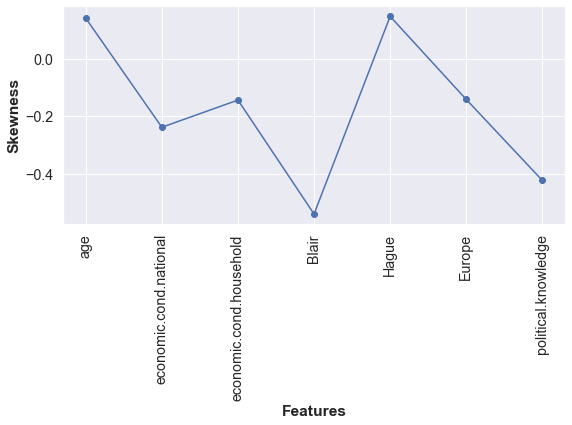

In [17]:
sk=pd.DataFrame(stats.skew(df.drop(['gender','vote'],axis=1)))
sk.index=df.drop(['gender','vote'],axis=1).columns
sns.set(font_scale=1.3)
sk.plot(kind='line',grid=1,figsize=(9,4),rot=90,marker='o',legend=0);
plt.xlabel('Features',weight='bold')
plt.ylabel('Skewness',weight='bold')
plt.show()
sns.set(font_scale=1.0)

In [18]:
sk1=sk.rename(columns = {0:'Skewness'})
round(sk1.T,2)

age  economic.cond.national  economic.cond.household  Blair  Hague  \
Skewness  0.14                   -0.24                    -0.14  -0.54   0.15   

          Europe  political.knowledge  
Skewness   -0.14                -0.42

In [19]:
df.isnull().sum().sum()

0

In [20]:
df.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [21]:
df.shape

(1517, 9)

C:\Users\Jitu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


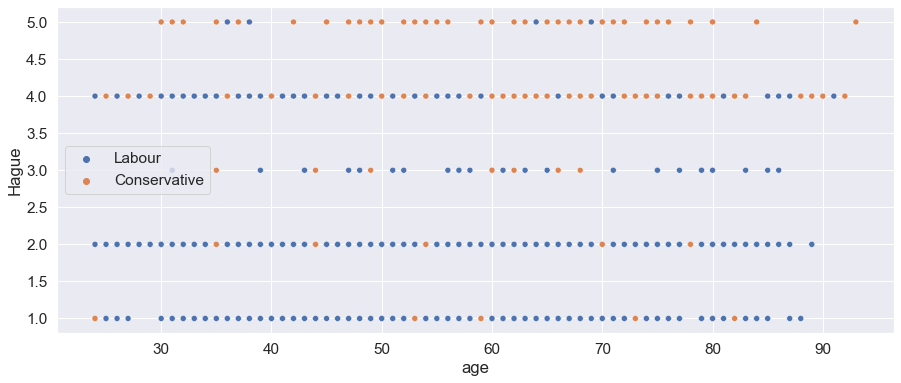

In [33]:
sns.set(font_scale=1.4)
# figure size
plt.figure(figsize = (15,6))

# distribution plot
#plt.subplot(2,3,1) # subplot
sns.scatterplot(df['age'], df['Hague'],hue = df['vote'])
plt.legend()
plt.show()
sns.set(font_scale=1)

C:\Users\Jitu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


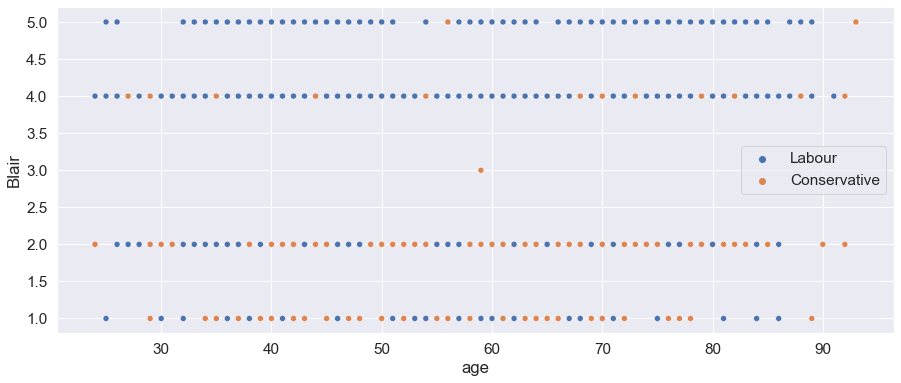

In [35]:
sns.set(font_scale=1.4)
# figure size
plt.figure(figsize = (15,6))

# distribution plot
#plt.subplot(2,3,1) # subplot
sns.scatterplot(df['age'], df['Blair'],hue = df['vote'])
plt.legend()
plt.show()
sns.set(font_scale=1)

C:\Users\Jitu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


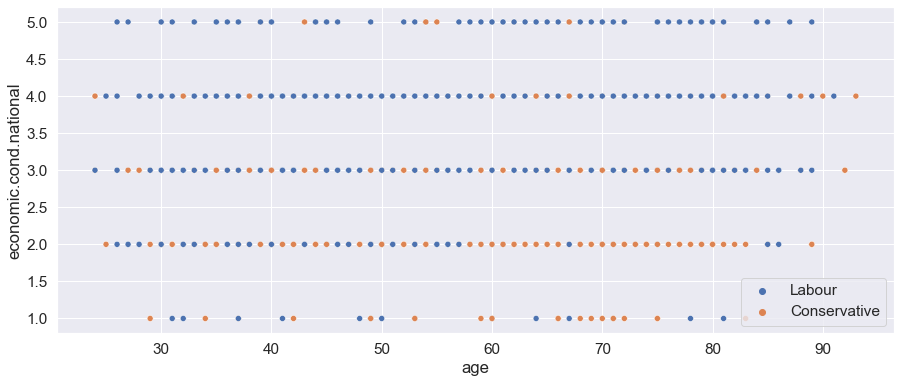

In [31]:
sns.set(font_scale=1.4)
# figure size
plt.figure(figsize = (15,6))

# distribution plot
#plt.subplot(2,3,1) # subplot
sns.scatterplot(df['age'], df['economic.cond.national'],hue = df['vote'])
plt.legend()
plt.show()
sns.set(font_scale=1)

C:\Users\Jitu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


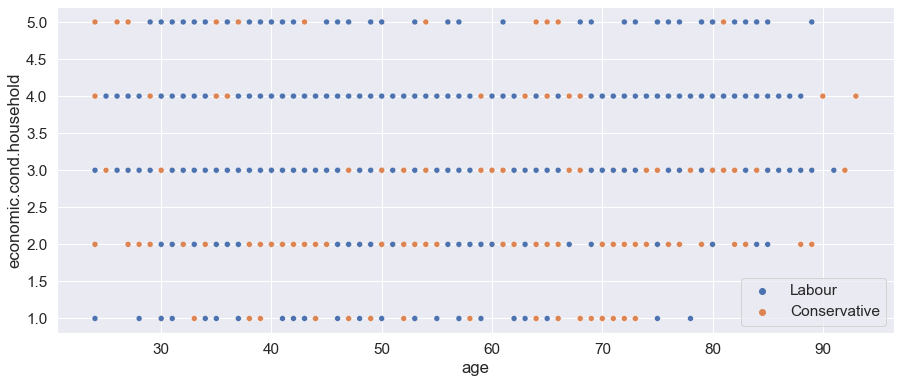

In [32]:
sns.set(font_scale=1.4)
# figure size
plt.figure(figsize = (15,6))

# distribution plot
#plt.subplot(2,3,1) # subplot
sns.scatterplot(df['age'], df['economic.cond.household'],hue = df['vote'])
plt.legend()
plt.show()
sns.set(font_scale=1)

In [63]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("--------------------------------")
    print(df[column].describe(),end=' ')
    
    
    print("\n\nDistribution of " + column)
    print("-------------------------------------")
    sns.displot(df[column], kde=1, color='m',bins=nbins);
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("------------------------------")
    ax = sns.boxplot(x=df[column],color='y');
    plt.show()

Description of age
--------------------------------
count    1517.000000
mean       54.241266
std        15.701741
min        24.000000
25%        41.000000
50%        53.000000
75%        67.000000
max        93.000000
Name: age, dtype: float64 

Distribution of age
-------------------------------------


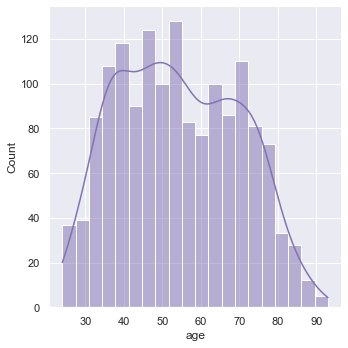

BoxPlot of age
------------------------------


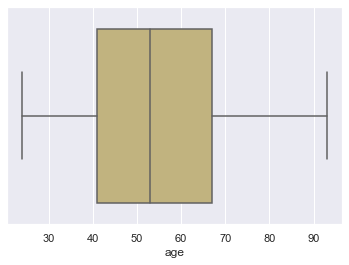

Description of economic.cond.national
--------------------------------
count    1517.000000
mean        3.245221
std         0.881792
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.national, dtype: float64 

Distribution of economic.cond.national
-------------------------------------


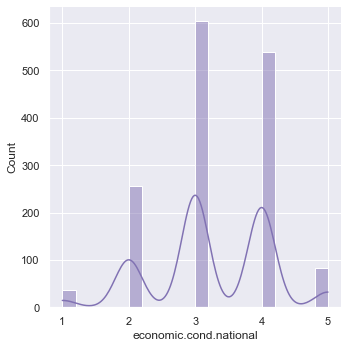

BoxPlot of economic.cond.national
------------------------------


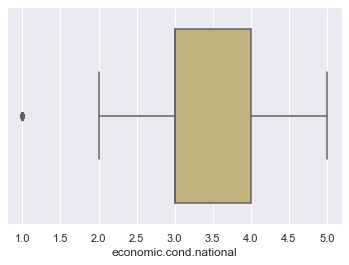

Description of economic.cond.household
--------------------------------
count    1517.000000
mean        3.137772
std         0.931069
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.household, dtype: float64 

Distribution of economic.cond.household
-------------------------------------


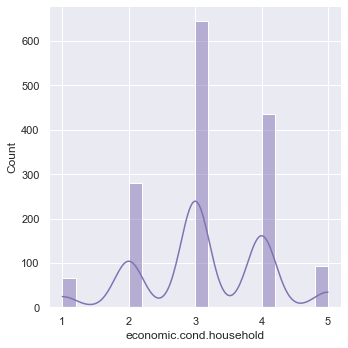

BoxPlot of economic.cond.household
------------------------------


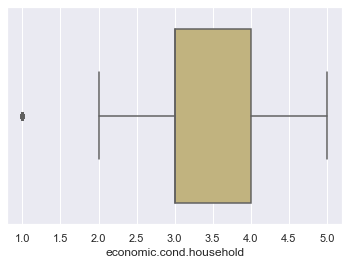

Description of Blair
--------------------------------
count    1517.000000
mean        3.335531
std         1.174772
min         1.000000
25%         2.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: Blair, dtype: float64 

Distribution of Blair
-------------------------------------


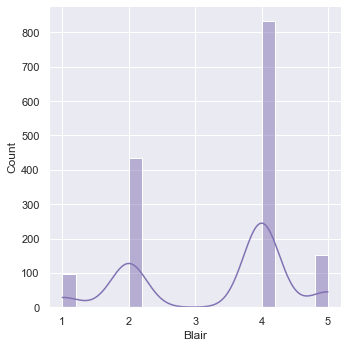

BoxPlot of Blair
------------------------------


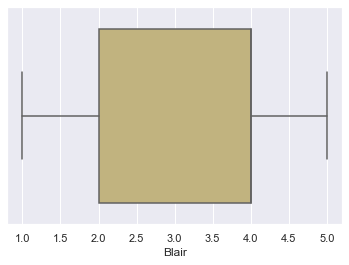

Description of Hague
--------------------------------
count    1517.000000
mean        2.749506
std         1.232479
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: Hague, dtype: float64 

Distribution of Hague
-------------------------------------


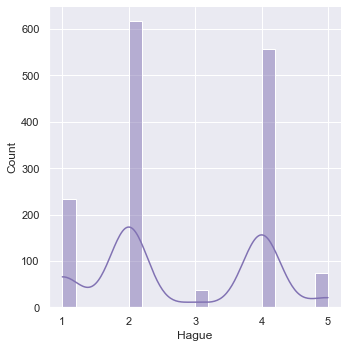

BoxPlot of Hague
------------------------------


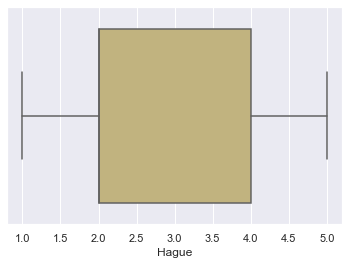

Description of Europe
--------------------------------
count    1517.000000
mean        6.740277
std         3.299043
min         1.000000
25%         4.000000
50%         6.000000
75%        10.000000
max        11.000000
Name: Europe, dtype: float64 

Distribution of Europe
-------------------------------------


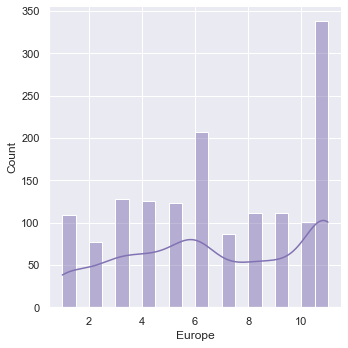

BoxPlot of Europe
------------------------------


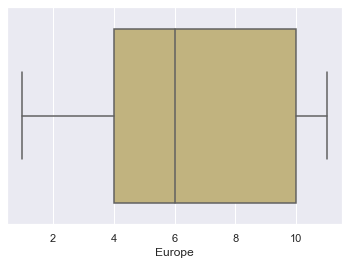

Description of political.knowledge
--------------------------------
count    1517.000000
mean        1.540541
std         1.084417
min         0.000000
25%         0.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: political.knowledge, dtype: float64 

Distribution of political.knowledge
-------------------------------------


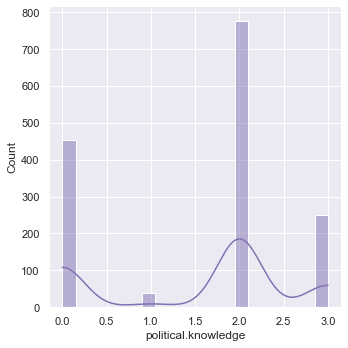

BoxPlot of political.knowledge
------------------------------


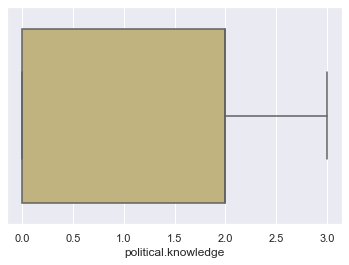

In [64]:
lstcolumns = list(df.select_dtypes(include='int64').columns.values)
for x in lstcolumns:
    univariateAnalysis_numeric(x,20)

In [65]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

<ipython-input-65-f90812c99787>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
<ipython-input-65-f90812c99787>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()


Blair                       0
Europe                      0
Hague                       0
age                         0
economic.cond.household    65
economic.cond.national     37
gender                      0
political.knowledge         0
vote                        0
dtype: int64

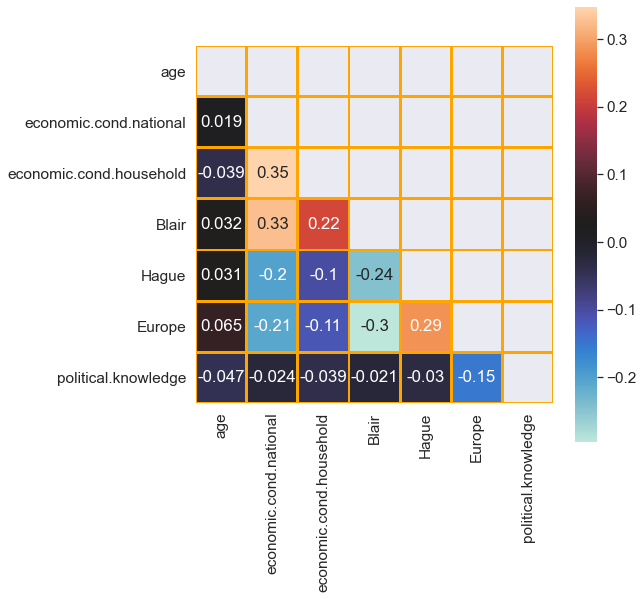

In [66]:
plt.figure(figsize=(8,8))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.set(font_scale=1.4)
sns.heatmap(df.corr(),cmap="icefire",annot=True,linewidths=2,
                linecolor='orange',square=True,mask=mask);
sns.set(font_scale=1)

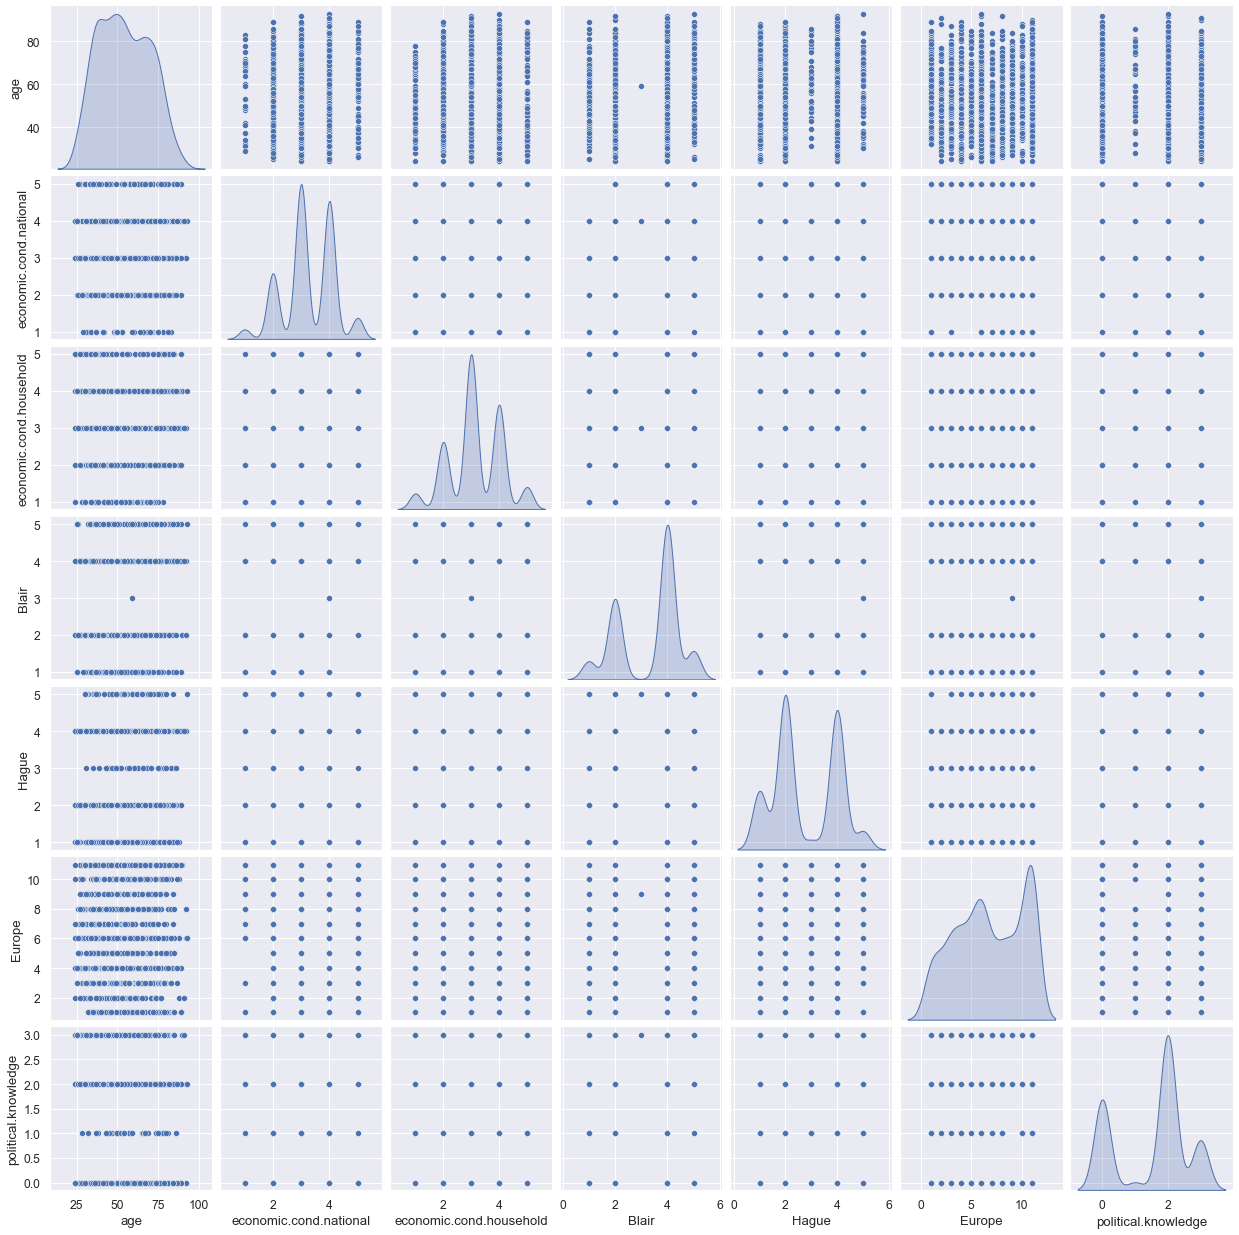

In [67]:
sns.set(font_scale=1.1)
sns.pairplot(df,diag_kind='kde').savefig('out.jpg')
sns.set(font_scale=1)

In [68]:
for column in df.columns: 
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique(),'unique values')
        print('--------------------')
        print(df[column].value_counts())
        print('\n',column.upper(),'(normalized)')
        print('--------------------')
        print(df[column].value_counts(normalize=1))
        print('\n*************************************************\n\n')

VOTE :  2 unique values
--------------------
Labour          1057
Conservative     460
Name: vote, dtype: int64

 VOTE (normalized)
--------------------
Labour          0.69677
Conservative    0.30323
Name: vote, dtype: float64

*************************************************


GENDER :  2 unique values
--------------------
female    808
male      709
Name: gender, dtype: int64

 GENDER (normalized)
--------------------
female    0.53263
male      0.46737
Name: gender, dtype: float64

*************************************************




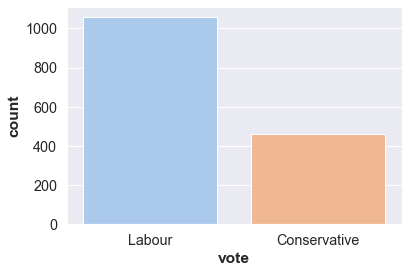

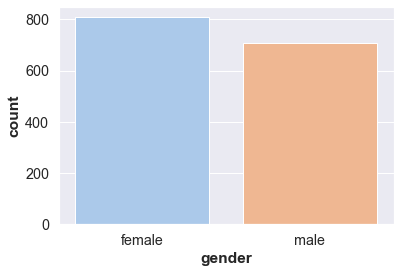

In [69]:
sns.set(font_scale=1.3)
for column in df.columns: 
    if df[column].dtype == 'object':
        sns.countplot(x=column, data=df, palette='pastel')
        plt.ylabel('count',weight="bold")
        plt.xlabel(column,weight="bold")
        plt.show()
sns.set(font_scale=1)

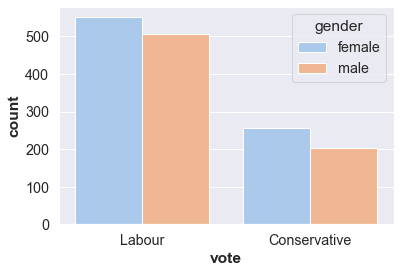

In [70]:
sns.set(font_scale=1.3)
sns.countplot(x='vote', data=df, hue='gender', palette='pastel')
plt.ylabel('count',weight="bold")
plt.xlabel('vote',weight="bold")
plt.show()
sns.set(font_scale=1)

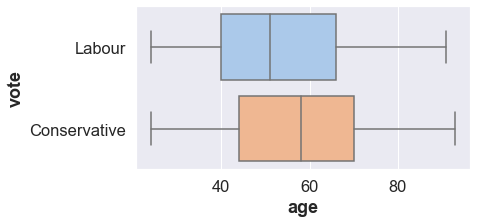

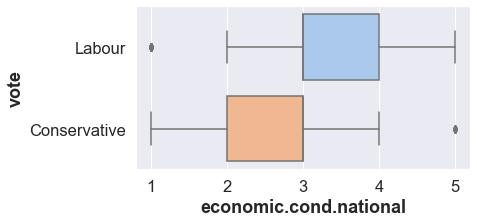

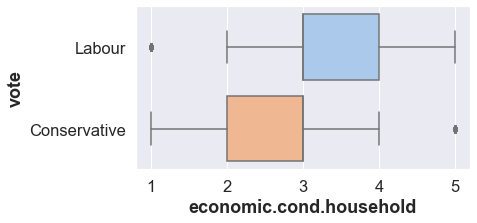

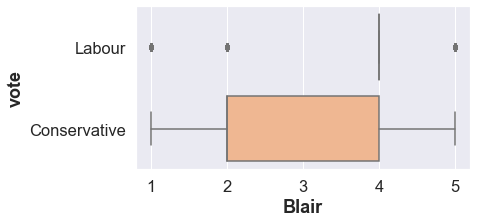

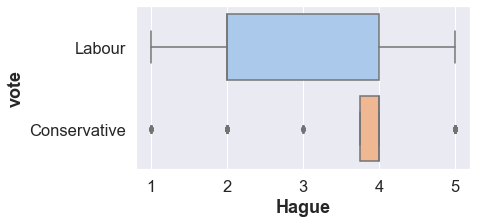

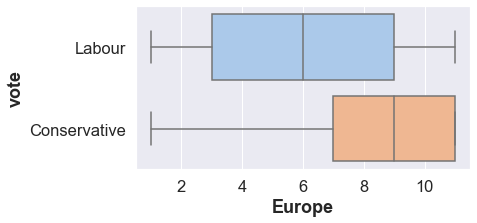

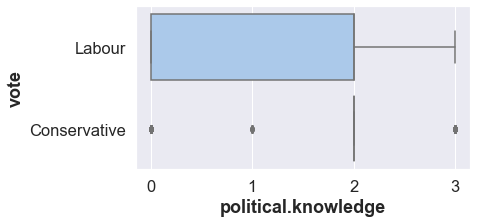

In [71]:
sns.set(font_scale=1.5)
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
lstcolumns = list(df.select_dtypes(include=numerics).columns.values)
for val in lstcolumns:
        plt.figure(figsize=(6,3))
        sns.boxplot(x=val, y='vote', data=df, palette='pastel',orient='h')
        plt.xlabel(val,weight="bold")
        plt.ylabel('vote',weight="bold")
        plt.show()
sns.set(font_scale=1)

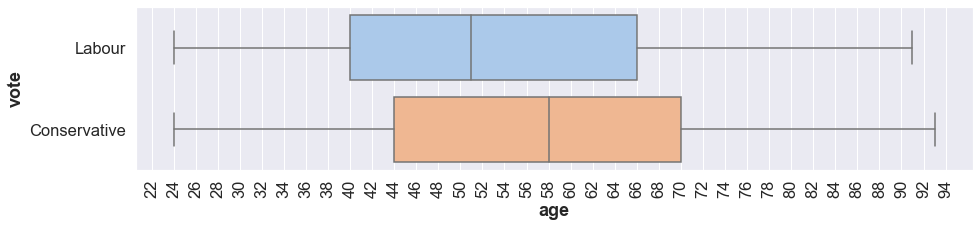

In [72]:
sns.set(font_scale=1.5)
plt.figure(figsize=(15,3))
sns.boxplot(x='age', y='vote', data=df, palette='pastel',orient='h')
plt.xlabel('age',weight="bold")
plt.ylabel('vote',weight="bold")
plt.xticks(range(22,96,2),rotation=90)
plt.show()
sns.set(font_scale=1.0)

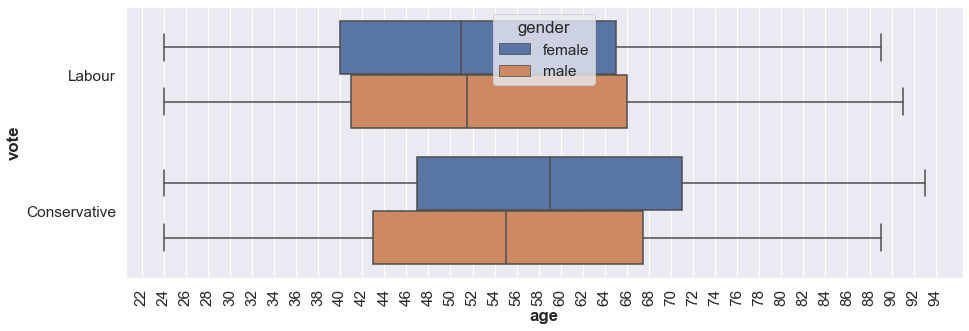

In [73]:
sns.set(font_scale=1.4)
plt.figure(figsize=(15,5))
sns.boxplot(y='vote', x='age', hue='gender',data=df,orient='h',);
plt.xlabel('age',weight="bold")
plt.ylabel('vote',weight="bold")
plt.xticks(range(22,96,2),rotation=90)
sns.set(font_scale=1)

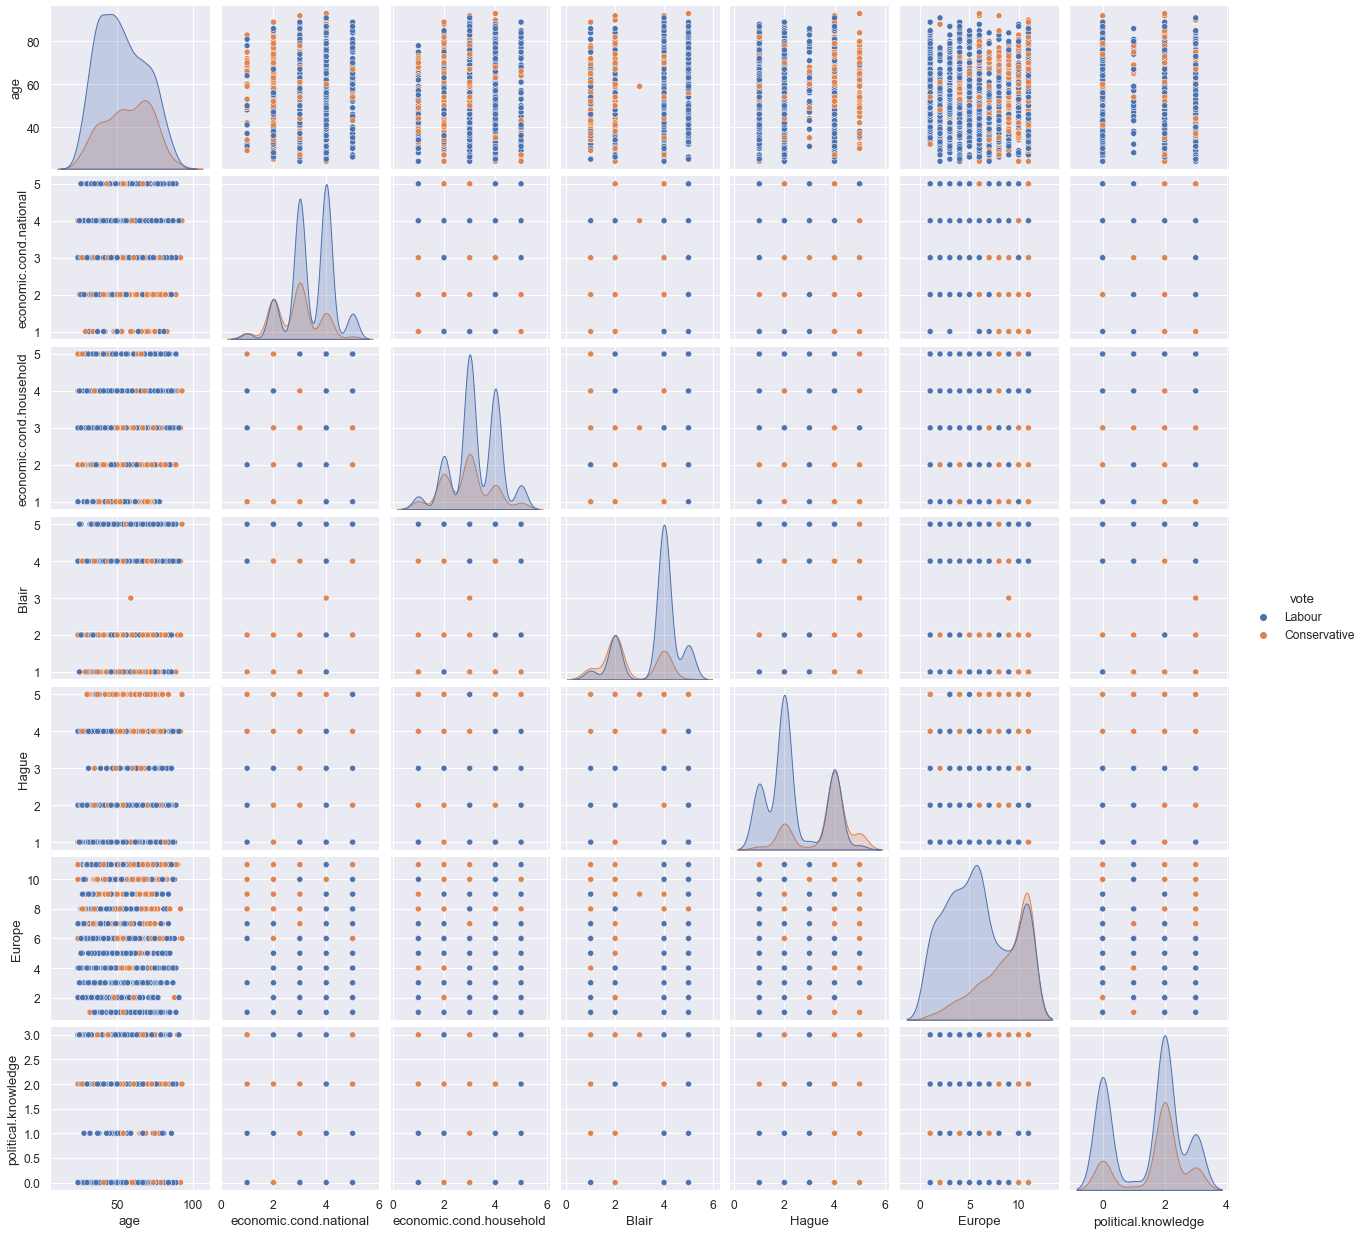

In [74]:
sns.set(font_scale=1.1)
sns.pairplot(df,diag_kind='kde',hue='vote').savefig('out1.jpg')
sns.set(font_scale=1)

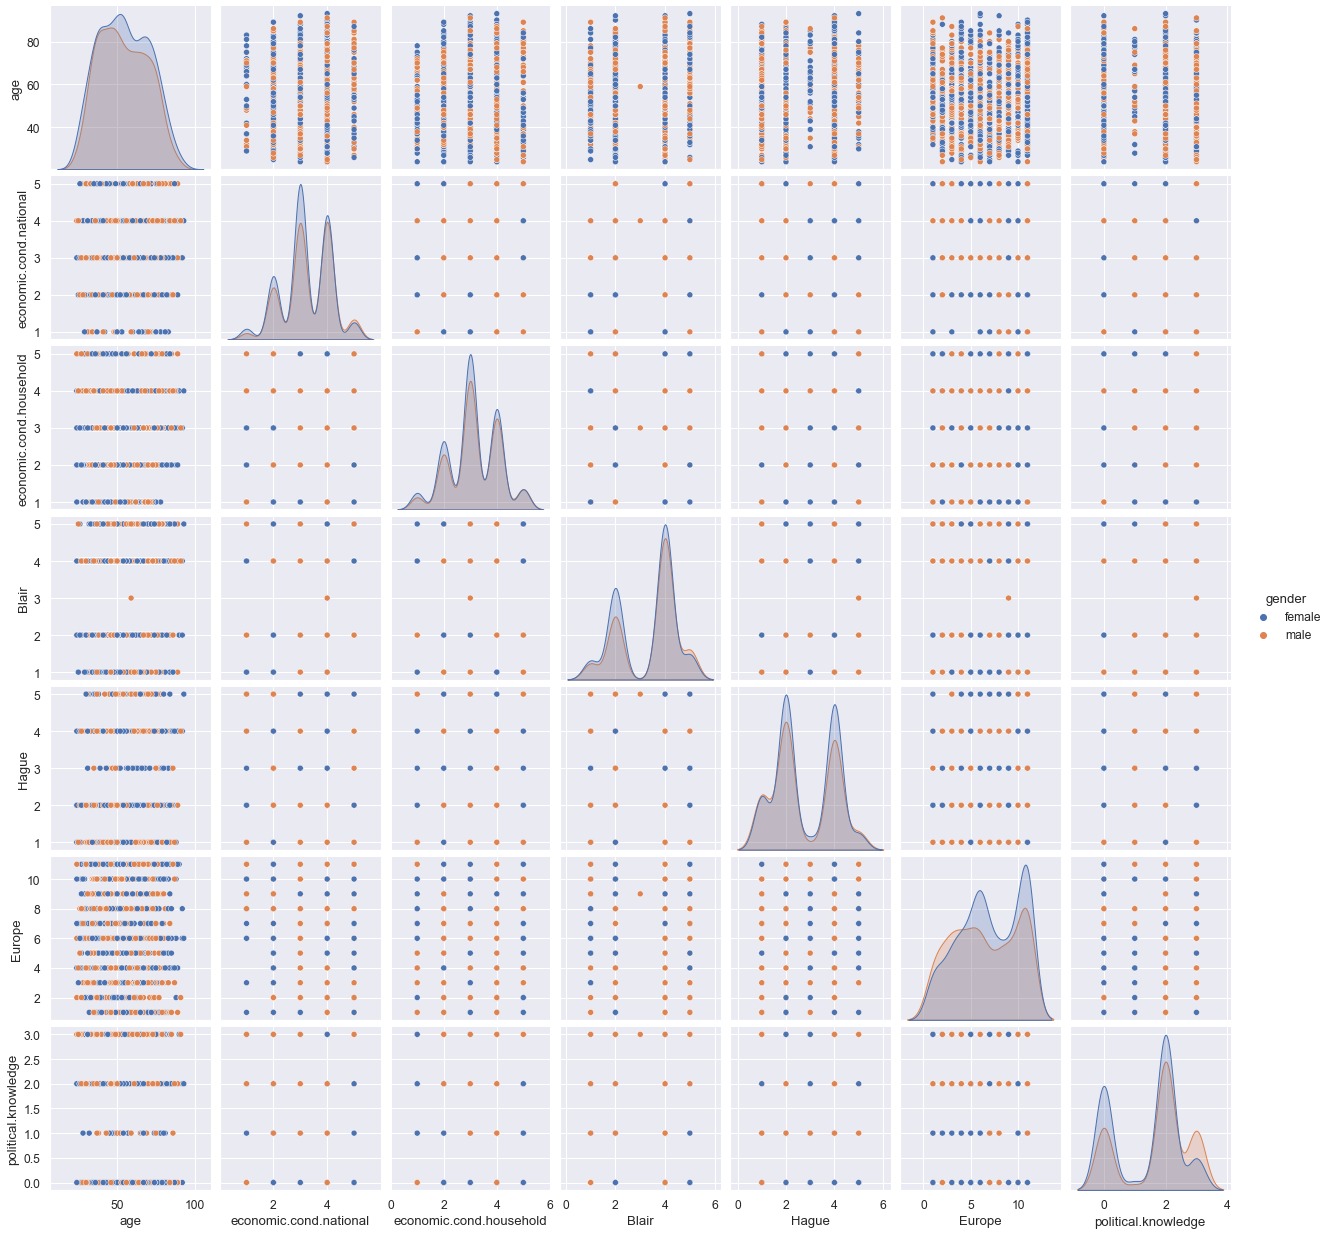

In [75]:
sns.set(font_scale=1.1)
sns.pairplot(df,diag_kind='kde',hue='gender').savefig('out2.jpg')
sns.set(font_scale=1)

In [76]:
df1=df.describe().T
df1['range']=df1['max']-df1['min']
df1['IQR']=df1['75%']-df1['25%']
df1['CV']=df1['std']/df1['mean']
df1['mode']=df.mode().T[0]
#df1['mode2']=df.mode().T[1]
#df1['mode3']=df.mode().T[2]
#df1['mode4']=df.mode().T[3]
round(df1.drop('count',axis=1).rename(columns = {'50%':'median'}),2)

mean    std   min   25%  median   75%   max  range  \
age                      54.24  15.70  24.0  41.0    53.0  67.0  93.0   69.0   
economic.cond.national    3.25   0.88   1.0   3.0     3.0   4.0   5.0    4.0   
economic.cond.household   3.14   0.93   1.0   3.0     3.0   4.0   5.0    4.0   
Blair                     3.34   1.17   1.0   2.0     4.0   4.0   5.0    4.0   
Hague                     2.75   1.23   1.0   2.0     2.0   4.0   5.0    4.0   
Europe                    6.74   3.30   1.0   4.0     6.0  10.0  11.0   10.0   
political.knowledge       1.54   1.08   0.0   0.0     2.0   2.0   3.0    3.0   

                          IQR    CV mode  
age                      26.0  0.29   37  
economic.cond.national    1.0  0.27    3  
economic.cond.household   1.0  0.30    3  
Blair                     2.0  0.35    4  
Hague                     2.0  0.45    2  
Europe                    6.0  0.49   11  
political.knowledge       2.0  0.70    2

In [90]:
df =pd.get_dummies(df, columns=['gender'],drop_first=True)

In [91]:
df

vote  age  economic.cond.national  economic.cond.household  \
0           Labour   43                       3                        3   
1           Labour   36                       4                        4   
2           Labour   35                       4                        4   
3           Labour   24                       4                        2   
4           Labour   41                       2                        2   
...            ...  ...                     ...                      ...   
1512  Conservative   67                       5                        3   
1513  Conservative   73                       2                        2   
1514        Labour   37                       3                        3   
1515  Conservative   61                       3                        3   
1516  Conservative   74                       2                        3   

      Blair  Hague  Europe  political.knowledge  gender_male  
0         4      1       2                    2            0  
1         4      4       5                    2            1  
2         5      2       3                    2            1  
3         2      1       4                    0            0  
4         1      1       6                    2            1  
...     ...    ...     ...                  ...          ...  
1512      2      4      11                    3            1  
1513      4      4       8                    2            1  
1514      5      4       2                    2            1  
1515      1      4      11                    2            1  
1516      2      4      11                    0            0  

[1517 rows x 9 columns]

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   int64 
 3   economic.cond.household  1517 non-null   int64 
 4   Blair                    1517 non-null   int64 
 5   Hague                    1517 non-null   int64 
 6   Europe                   1517 non-null   int64 
 7   political.knowledge      1517 non-null   int64 
 8   gender_male              1517 non-null   uint8 
dtypes: int64(7), object(1), uint8(1)
memory usage: 96.4+ KB


# logit

In [104]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
%matplotlib inline

df=pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True,drop=True)
df =pd.get_dummies(df, columns=['gender'],drop_first=True)
df

vote  age  economic.cond.national  economic.cond.household  \
0           Labour   43                       3                        3   
1           Labour   36                       4                        4   
2           Labour   35                       4                        4   
3           Labour   24                       4                        2   
4           Labour   41                       2                        2   
...            ...  ...                     ...                      ...   
1512  Conservative   67                       5                        3   
1513  Conservative   73                       2                        2   
1514        Labour   37                       3                        3   
1515  Conservative   61                       3                        3   
1516  Conservative   74                       2                        3   

      Blair  Hague  Europe  political.knowledge  gender_male  
0         4      1       2                    2            0  
1         4      4       5                    2            1  
2         5      2       3                    2            1  
3         2      1       4                    0            0  
4         1      1       6                    2            1  
...     ...    ...     ...                  ...          ...  
1512      2      4      11                    3            1  
1513      4      4       8                    2            1  
1514      5      4       2                    2            1  
1515      1      4      11                    2            1  
1516      2      4      11                    0            0  

[1517 rows x 9 columns]

In [105]:
from sklearn.preprocessing import StandardScaler

In [106]:
df_unscaled = df.copy()
df_unscaled

vote  age  economic.cond.national  economic.cond.household  \
0           Labour   43                       3                        3   
1           Labour   36                       4                        4   
2           Labour   35                       4                        4   
3           Labour   24                       4                        2   
4           Labour   41                       2                        2   
...            ...  ...                     ...                      ...   
1512  Conservative   67                       5                        3   
1513  Conservative   73                       2                        2   
1514        Labour   37                       3                        3   
1515  Conservative   61                       3                        3   
1516  Conservative   74                       2                        3   

      Blair  Hague  Europe  political.knowledge  gender_male  
0         4      1       2                    2            0  
1         4      4       5                    2            1  
2         5      2       3                    2            1  
3         2      1       4                    0            0  
4         1      1       6                    2            1  
...     ...    ...     ...                  ...          ...  
1512      2      4      11                    3            1  
1513      4      4       8                    2            1  
1514      5      4       2                    2            1  
1515      1      4      11                    2            1  
1516      2      4      11                    0            0  

[1517 rows x 9 columns]

In [107]:
X = df.drop("vote" , axis=1)
y = df['vote']

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1, stratify=y)

In [109]:
y_train.value_counts(1)

Labour          0.696513
Conservative    0.303487
Name: vote, dtype: float64

In [110]:
y_test.value_counts(1)

Labour          0.697368
Conservative    0.302632
Name: vote, dtype: float64

In [111]:
X_train

age  economic.cond.national  economic.cond.household  Blair  Hague  \
532    71                       3                        3      4      2   
706    57                       4                        5      4      1   
1140   24                       3                        4      2      4   
1077   43                       4                        4      2      3   
954    37                       3                        2      4      2   
...   ...                     ...                      ...    ...    ...   
512    80                       2                        2      2      4   
825    27                       3                        3      2      4   
348    56                       4                        2      5      2   
1241   75                       4                        3      4      5   
1137   43                       2                        3      2      3   

      Europe  political.knowledge  gender_male  
532       11                    0            0  
706        3                    2            0  
1140      11                    0            1  
1077       5                    0            1  
954        7                    2            1  
...      ...                  ...          ...  
512        7                    2            1  
825        5                    2            0  
348        1                    2            0  
1241       7                    3            0  
1137      11                    2            0  

[1061 rows x 8 columns]

In [112]:
X_train_scaled = X_train.copy()
col_names = [x for x in X_train.columns]
features = X_train_scaled[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X_train_scaled[col_names] = features
X_train_scaled

age  economic.cond.national  economic.cond.household     Blair  \
532   1.078284               -0.274403                -0.137087  0.557983   
706   0.181786                0.858443                 1.986262  0.557983   
1140 -1.931388               -0.274403                 0.924587 -1.180695   
1077 -0.714712                0.858443                 0.924587 -1.180695   
954  -1.098925               -0.274403                -1.198761  0.557983   
...        ...                     ...                      ...       ...   
512   1.654605               -1.407249                -1.198761 -1.180695   
825  -1.739281               -0.274403                -0.137087 -1.180695   
348   0.117751                0.858443                -1.198761  1.427322   
1241  1.334427                0.858443                -0.137087  0.557983   
1137 -0.714712               -1.407249                -0.137087 -1.180695   

         Hague    Europe  political.knowledge  gender_male  
532  -0.625062  1.316728            -1.417763    -0.917613  
706  -1.441798 -1.148833             0.422294    -0.917613  
1140  1.008412  1.316728            -1.417763     1.089784  
1077  0.191675 -0.532443            -1.417763     1.089784  
954  -0.625062  0.083948             0.422294     1.089784  
...        ...       ...                  ...          ...  
512   1.008412  0.083948             0.422294     1.089784  
825   1.008412 -0.532443             0.422294    -0.917613  
348  -0.625062 -1.765223             0.422294    -0.917613  
1241  1.825149  0.083948             1.342323    -0.917613  
1137  0.191675  1.316728             0.422294    -0.917613  

[1061 rows x 8 columns]

In [113]:
X_test_scaled = X_test.copy()
col_names = [x for x in X_test.columns]
features = X_test_scaled[col_names]
#scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X_test_scaled[col_names] = features
X_test_scaled

age  economic.cond.national  economic.cond.household     Blair  \
273   1.078284               -1.407249                -0.137087  0.557983   
765  -1.483139               -1.407249                -1.198761 -1.180695   
415  -1.226997                0.858443                -0.137087 -1.180695   
1029 -1.291032                0.858443                 0.924587  0.557983   
506  -0.906819               -0.274403                 0.924587  0.557983   
...        ...                     ...                      ...       ...   
653   0.181786                0.858443                 0.924587  0.557983   
504   0.950213               -0.274403                 0.924587 -1.180695   
1423  1.526533               -0.274403                -0.137087  1.427322   
886  -1.226997               -0.274403                 0.924587 -1.180695   
350   1.846711               -1.407249                 0.924587 -1.180695   

         Hague    Europe  political.knowledge  gender_male  
273  -0.625062  1.316728            -1.417763    -0.917613  
765   1.008412 -0.532443             0.422294     1.089784  
415  -1.441798  0.083948             0.422294     1.089784  
1029 -0.625062  0.083948            -1.417763    -0.917613  
506  -0.625062  0.083948             1.342323     1.089784  
...        ...       ...                  ...          ...  
653  -0.625062  1.316728            -1.417763    -0.917613  
504   1.008412  0.700338             0.422294     1.089784  
1423 -0.625062 -1.148833            -1.417763    -0.917613  
886   1.008412  1.316728            -1.417763     1.089784  
350   1.008412  1.008533             0.422294    -0.917613  

[456 rows x 8 columns]

In [114]:
X_train_age_scaled=X_train.copy()
X_train_age_scaled['age'] = X_train_scaled['age']
X_train_age_scaled

age  economic.cond.national  economic.cond.household  Blair  Hague  \
532   1.078284                       3                        3      4      2   
706   0.181786                       4                        5      4      1   
1140 -1.931388                       3                        4      2      4   
1077 -0.714712                       4                        4      2      3   
954  -1.098925                       3                        2      4      2   
...        ...                     ...                      ...    ...    ...   
512   1.654605                       2                        2      2      4   
825  -1.739281                       3                        3      2      4   
348   0.117751                       4                        2      5      2   
1241  1.334427                       4                        3      4      5   
1137 -0.714712                       2                        3      2      3   

      Europe  political.knowledge  gender_male  
532       11                    0            0  
706        3                    2            0  
1140      11                    0            1  
1077       5                    0            1  
954        7                    2            1  
...      ...                  ...          ...  
512        7                    2            1  
825        5                    2            0  
348        1                    2            0  
1241       7                    3            0  
1137      11                    2            0  

[1061 rows x 8 columns]

In [115]:
X_test_age_scaled=X_test.copy()
X_test_age_scaled['age'] = X_test_scaled['age']
X_test_age_scaled

age  economic.cond.national  economic.cond.household  Blair  Hague  \
273   1.078284                       2                        3      4      2   
765  -1.483139                       2                        2      2      4   
415  -1.226997                       4                        3      2      1   
1029 -1.291032                       4                        4      4      2   
506  -0.906819                       3                        4      4      2   
...        ...                     ...                      ...    ...    ...   
653   0.181786                       4                        4      4      2   
504   0.950213                       3                        4      2      4   
1423  1.526533                       3                        3      5      2   
886  -1.226997                       3                        4      2      4   
350   1.846711                       2                        4      2      4   

      Europe  political.knowledge  gender_male  
273       11                    0            0  
765        5                    2            1  
415        7                    2            1  
1029       7                    0            0  
506        7                    3            1  
...      ...                  ...          ...  
653       11                    0            0  
504        9                    2            1  
1423       3                    0            0  
886       11                    0            1  
350       10                    2            0  

[456 rows x 8 columns]

In [116]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs',max_iter=10000,penalty='l2',verbose=True,n_jobs=-1)
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.7s finished


LogisticRegression(max_iter=10000, n_jobs=-1, verbose=True)

In [117]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [118]:
model.score(X_train, y_train)

0.8284637134778511

In [119]:
model.score(X_test, y_test)

0.8552631578947368

In [120]:
model.coef_

array([[-0.01328781,  0.34685048,  0.03464569,  0.54905453, -0.85539958,
        -0.20791842, -0.40322178,  0.04963362]])

In [121]:
model.intercept_,

(array([3.32692859]),)

In [122]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("Coefficient for '{}' is {}.".format(col_name, round(model.coef_[0][idx],4)))

Coefficient for 'age' is -0.0133.
Coefficient for 'economic.cond.national' is 0.3469.
Coefficient for 'economic.cond.household' is 0.0346.
Coefficient for 'Blair' is 0.5491.
Coefficient for 'Hague' is -0.8554.
Coefficient for 'Europe' is -0.2079.
Coefficient for 'political.knowledge' is -0.4032.
Coefficient for 'gender_male' is 0.0496.


In [123]:
model.fit(X_train_scaled, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


LogisticRegression(max_iter=10000, n_jobs=-1, verbose=True)

In [124]:
model.score(X_train_scaled, y_train)

0.827521206409048

In [125]:
model.score(X_test_scaled, y_test)

0.8552631578947368

In [126]:
model.fit(X_train_age_scaled, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.6s finished


LogisticRegression(max_iter=10000, n_jobs=-1, verbose=True)

In [127]:
model.score(X_train_age_scaled, y_train)

0.8284637134778511

In [128]:
model.score(X_test_age_scaled, y_test)

0.8552631578947368

In [129]:
from sklearn.model_selection import GridSearchCV
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs','newton-cg'],
      'tol':[0.0001,0.00001]}
model = LogisticRegression(max_iter=10000,n_jobs=-1)

In [130]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [131]:
grid_search.fit(X_train, y_train)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=-1),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['sag', 'lbfgs', 'newton-cg'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [132]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=-1, solver='sag')


In [133]:
model = LogisticRegression(solver='sag',max_iter=10000,penalty='l2',verbose=True,n_jobs=-1,tol=0.0001)
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 886 epochs took 1 seconds


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished


LogisticRegression(max_iter=10000, n_jobs=-1, solver='sag', verbose=True)

In [134]:
model.score(X_train, y_train)

0.825636192271442

In [135]:
model.score(X_test, y_test)

0.8574561403508771

In [136]:
model.intercept_

array([2.19183012])

In [137]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[0][idx]))

The coefficient for age is -0.008807649334801531
The coefficient for economic.cond.national is 0.4130697215364553
The coefficient for economic.cond.household is 0.0883291223915531
The coefficient for Blair is 0.5789513936190357
The coefficient for Hague is -0.7985573923444429
The coefficient for Europe is -0.1877986337772339
The coefficient for political.knowledge is -0.36135850631578503
The coefficient for gender_male is 0.06951620002126456


In [138]:
from sklearn import preprocessing
x = X_train.values    # returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_train_norm = pd.DataFrame(x_scaled,columns=X_train.columns)
X_train_norm

age  economic.cond.national  economic.cond.household  Blair  Hague  \
0     0.681159                    0.50                     0.50   0.75   0.25   
1     0.478261                    0.75                     1.00   0.75   0.00   
2     0.000000                    0.50                     0.75   0.25   0.75   
3     0.275362                    0.75                     0.75   0.25   0.50   
4     0.188406                    0.50                     0.25   0.75   0.25   
...        ...                     ...                      ...    ...    ...   
1056  0.811594                    0.25                     0.25   0.25   0.75   
1057  0.043478                    0.50                     0.50   0.25   0.75   
1058  0.463768                    0.75                     0.25   1.00   0.25   
1059  0.739130                    0.75                     0.50   0.75   1.00   
1060  0.275362                    0.25                     0.50   0.25   0.50   

      Europe  political.knowledge  gender_male  
0        1.0             0.000000          0.0  
1        0.2             0.666667          0.0  
2        1.0             0.000000          1.0  
3        0.4             0.000000          1.0  
4        0.6             0.666667          1.0  
...      ...                  ...          ...  
1056     0.6             0.666667          1.0  
1057     0.4             0.666667          0.0  
1058     0.0             0.666667          0.0  
1059     0.6             1.000000          0.0  
1060     1.0             0.666667          0.0  

[1061 rows x 8 columns]

In [139]:
x = X_test.values
x_scaled = min_max_scaler.transform(x)
X_test_norm = pd.DataFrame(x_scaled,columns=X_test.columns)
X_test_norm

age  economic.cond.national  economic.cond.household  Blair  Hague  \
0    0.681159                    0.25                     0.50   0.75   0.25   
1    0.101449                    0.25                     0.25   0.25   0.75   
2    0.159420                    0.75                     0.50   0.25   0.00   
3    0.144928                    0.75                     0.75   0.75   0.25   
4    0.231884                    0.50                     0.75   0.75   0.25   
..        ...                     ...                      ...    ...    ...   
451  0.478261                    0.75                     0.75   0.75   0.25   
452  0.652174                    0.50                     0.75   0.25   0.75   
453  0.782609                    0.50                     0.50   1.00   0.25   
454  0.159420                    0.50                     0.75   0.25   0.75   
455  0.855072                    0.25                     0.75   0.25   0.75   

     Europe  political.knowledge  gender_male  
0       1.0             0.000000          0.0  
1       0.4             0.666667          1.0  
2       0.6             0.666667          1.0  
3       0.6             0.000000          0.0  
4       0.6             1.000000          1.0  
..      ...                  ...          ...  
451     1.0             0.000000          0.0  
452     0.8             0.666667          1.0  
453     0.2             0.000000          0.0  
454     1.0             0.000000          1.0  
455     0.9             0.666667          0.0  

[456 rows x 8 columns]

In [140]:
X_train_age_norm = X_train.copy()
X_train_age_norm['age'] = (X_train['age']-X_train['age'].min())/(X_train['age'].max()-X_train['age'].min())
X_train_age_norm

age  economic.cond.national  economic.cond.household  Blair  Hague  \
532   0.681159                       3                        3      4      2   
706   0.478261                       4                        5      4      1   
1140  0.000000                       3                        4      2      4   
1077  0.275362                       4                        4      2      3   
954   0.188406                       3                        2      4      2   
...        ...                     ...                      ...    ...    ...   
512   0.811594                       2                        2      2      4   
825   0.043478                       3                        3      2      4   
348   0.463768                       4                        2      5      2   
1241  0.739130                       4                        3      4      5   
1137  0.275362                       2                        3      2      3   

      Europe  political.knowledge  gender_male  
532       11                    0            0  
706        3                    2            0  
1140      11                    0            1  
1077       5                    0            1  
954        7                    2            1  
...      ...                  ...          ...  
512        7                    2            1  
825        5                    2            0  
348        1                    2            0  
1241       7                    3            0  
1137      11                    2            0  

[1061 rows x 8 columns]

In [141]:
X_test_age_norm = X_test.copy()
X_test_age_norm['age'] = (X_test['age']-X_train['age'].min())/(X_train['age'].max()-X_train['age'].min())
X_test_age_norm

age  economic.cond.national  economic.cond.household  Blair  Hague  \
273   0.681159                       2                        3      4      2   
765   0.101449                       2                        2      2      4   
415   0.159420                       4                        3      2      1   
1029  0.144928                       4                        4      4      2   
506   0.231884                       3                        4      4      2   
...        ...                     ...                      ...    ...    ...   
653   0.478261                       4                        4      4      2   
504   0.652174                       3                        4      2      4   
1423  0.782609                       3                        3      5      2   
886   0.159420                       3                        4      2      4   
350   0.855072                       2                        4      2      4   

      Europe  political.knowledge  gender_male  
273       11                    0            0  
765        5                    2            1  
415        7                    2            1  
1029       7                    0            0  
506        7                    3            1  
...      ...                  ...          ...  
653       11                    0            0  
504        9                    2            1  
1423       3                    0            0  
886       11                    0            1  
350       10                    2            0  

[456 rows x 8 columns]

In [142]:
model.fit(X_train_norm, y_train)

convergence after 25 epochs took 0 seconds


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(max_iter=10000, n_jobs=-1, solver='sag', verbose=True)

In [143]:
model.score(X_train_norm, y_train)

0.8265786993402451

In [144]:
model.score(X_test_norm, y_test)

0.8508771929824561

In [145]:
model.fit(X_train_age_norm, y_train)

convergence after 104 epochs took 0 seconds


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(max_iter=10000, n_jobs=-1, solver='sag', verbose=True)

In [146]:
model.score(X_train_age_norm, y_train)

0.8294062205466541

In [147]:
model.score(X_test_age_norm, y_test)

0.8530701754385965

In [148]:
model = LogisticRegression(solver='sag',max_iter=10000,penalty='l2',verbose=True,n_jobs=-1,tol=0.0001)
model.fit(X_train_age_norm, y_train)

convergence after 106 epochs took 0 seconds


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(max_iter=10000, n_jobs=-1, solver='sag', verbose=True)

In [149]:
model.score(X_train_age_norm, y_train)

0.8294062205466541

In [150]:
model.score(X_test_age_norm, y_test)

0.8530701754385965

In [151]:
from imblearn.over_sampling import SMOTE
print(X_train.shape)
print(X_test.shape)

(1061, 8)
(456, 8)


In [152]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
X_train_res.shape

(1478, 8)

In [153]:
model = LogisticRegression(solver='sag',max_iter=10000,penalty='l2',verbose=True,n_jobs=-1,tol=0.0001)
model.fit(X_train_res, y_train_res)
model.score(X_train_res, y_train_res)

convergence after 216 epochs took 0 seconds


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


0.8186738836265224

In [154]:
model.score(X_test, y_test)

0.831140350877193

In [155]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3, interaction_only=True)

#poly = PolynomialFeatures()

X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(1061, 93)

In [156]:
model.fit(X_train,y_train)
model.score(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 3342 epochs took 4 seconds


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.5s finished
C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.8501413760603205

In [157]:
model.score(X_test, y_test)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.8355263157894737

In [158]:
model.coef_

array([[ 7.77554161e-04,  5.36901798e-03,  1.73614423e-03,
         8.55115026e-04,  2.73214227e-03,  1.92856357e-03,
         1.66553039e-03,  6.87591560e-04,  1.43777612e-05,
        -6.44341592e-03, -1.46346486e-02,  2.53577090e-02,
         5.39634163e-03, -3.35302242e-03,  9.50865038e-03,
         2.76707665e-04,  2.22402844e-03,  6.57364651e-03,
         4.09758320e-03,  2.74877576e-03,  1.57270993e-03,
        -7.93072900e-05,  4.08068491e-03,  1.84767441e-03,
        -3.27569253e-03,  1.81143582e-04, -3.39829888e-04,
         5.90831761e-03,  7.77908274e-03,  1.88110177e-03,
         2.39088558e-04,  3.06835110e-03,  1.60934656e-03,
        -5.92581846e-04, -3.38558024e-03, -1.62595430e-03,
        -2.23631718e-04,  4.93021508e-03, -1.83596161e-03,
        -1.93817087e-03,  6.90819617e-04, -1.20868620e-03,
         1.35901162e-03,  4.56139255e-04, -1.38337526e-03,
         1.11519156e-03,  2.58925272e-04,  2.61567785e-03,
        -5.03242600e-03, -1.42944938e-03,  2.85940430e-0

In [159]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


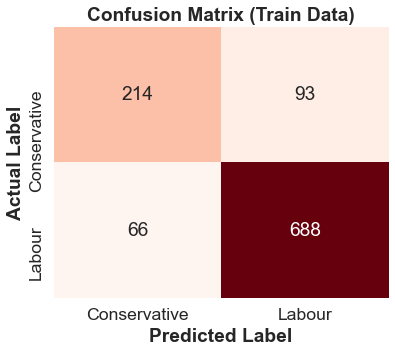

In [160]:
sns.set(font_scale=1.6)
plt.figure(figsize=(6,5))
confusion_matrix(y_train,ytrain_predict,labels=['Conservative','Labour'])
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='Reds',xticklabels=['Conservative','Labour'],yticklabels=['Conservative','Labour'])
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Train Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

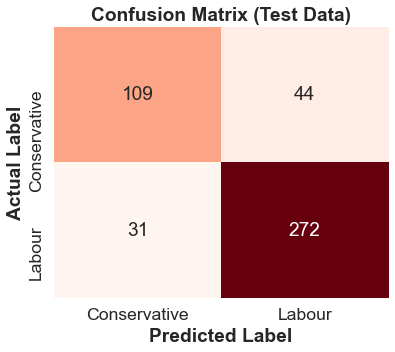

In [161]:
## Confusion matrix on the test data
sns.set(font_scale=1.6)
plt.figure(figsize=(6,5))
confusion_matrix(y_test,ytest_predict)
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True, fmt='d',cbar=False, cmap='Reds',xticklabels=['Conservative','Labour'],yticklabels=['Conservative','Labour'])
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Test Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

In [162]:
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

Conservative       0.76      0.70      0.73       307
      Labour       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061
 



In [163]:
print(classification_report(y_test, ytest_predict),'\n');

              precision    recall  f1-score   support

Conservative       0.78      0.71      0.74       153
      Labour       0.86      0.90      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.83       456
 



AUC: 0.910


C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


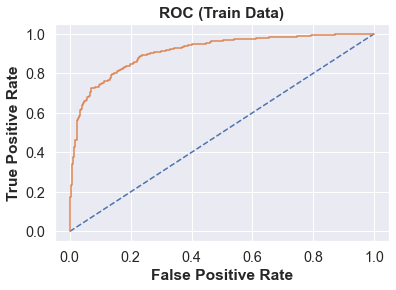

In [164]:
sns.set(font_scale=1.3)
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs,pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC (Train Data)',weight='bold')
sns.set(font_scale=1)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


AUC: 0.884


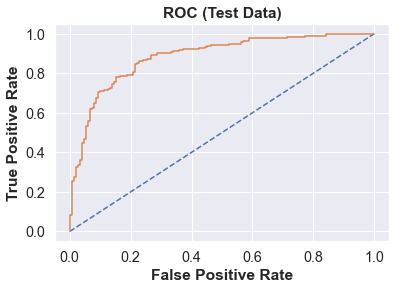

In [165]:
sns.set(font_scale=1.3)
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs,pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC (Test Data)',weight='bold')
sns.set(font_scale=1)

In [166]:
df=pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True,drop=True)
df =pd.get_dummies(df, columns=['gender'],drop_first=True)
df=df.rename(columns={'age':'AGE'})
df

vote  AGE  economic.cond.national  economic.cond.household  \
0           Labour   43                       3                        3   
1           Labour   36                       4                        4   
2           Labour   35                       4                        4   
3           Labour   24                       4                        2   
4           Labour   41                       2                        2   
...            ...  ...                     ...                      ...   
1512  Conservative   67                       5                        3   
1513  Conservative   73                       2                        2   
1514        Labour   37                       3                        3   
1515  Conservative   61                       3                        3   
1516  Conservative   74                       2                        3   

      Blair  Hague  Europe  political.knowledge  gender_male  
0         4      1       2                    2            0  
1         4      4       5                    2            1  
2         5      2       3                    2            1  
3         2      1       4                    0            0  
4         1      1       6                    2            1  
...     ...    ...     ...                  ...          ...  
1512      2      4      11                    3            1  
1513      4      4       8                    2            1  
1514      5      4       2                    2            1  
1515      1      4      11                    2            1  
1516      2      4      11                    0            0  

[1517 rows x 9 columns]

C:\Users\Jitu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Jitu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


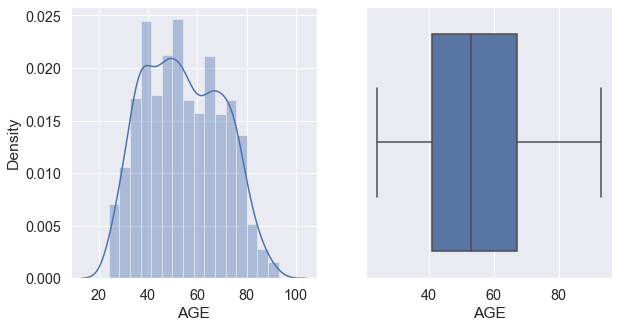

In [167]:
# Univariate analysis
# This is a continuous variable
# figure size
sns.set(font_scale=1.3)
plt.figure(figsize = (15,5))

# distribution plot
plt.subplot(1,3,1) # subplot
sns.distplot(df['AGE'])
# Boxplot
plt.subplot(1,3,2)
sns.boxplot(df['AGE'])
plt.show()
sns.set(font_scale=1.0)

In [168]:
df['AGE'].skew(), df['AGE'].kurt()

(0.13979987012068112, -0.943707667905203)

-0.09574897359579736 -0.9267602571694074


C:\Users\Jitu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


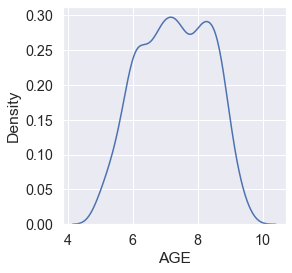

In [169]:
# Using sqrt
sns.set(font_scale=1.3)
print(np.sqrt(df['AGE']).skew(),np.sqrt(df['AGE']).kurt())
plt.figure(figsize = (4,4))
sns.distplot(np.sqrt(df['AGE']),hist=False)
sns.set(font_scale=1.0)
plt.show()

-0.29579648374836975 -0.7890172316601252


C:\Users\Jitu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


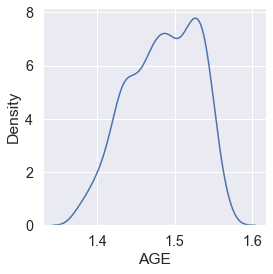

In [170]:
# Using root of 10
sns.set(font_scale=1.3)
print((df['AGE']**0.1).skew(),(df['AGE']**0.1).kurt())
plt.figure(figsize = (4,4))
sns.distplot(df['AGE']**0.1, hist=False)
plt.show()
sns.set(font_scale=1.0)

-0.34771205219748524 -0.7349404394365804


C:\Users\Jitu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


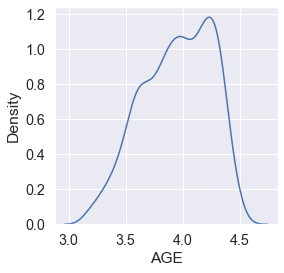

In [171]:
# Using log transformation
sns.set(font_scale=1.3)
print(np.log(df['AGE']).skew(),np.log(df['AGE']).kurt())
plt.figure(figsize = (4,4))
sns.distplot(np.log(df['AGE']), hist=False)
plt.show()
sns.set(font_scale=1.0)

In [172]:
df=pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True,drop=True)
df =pd.get_dummies(df, columns=['gender'],drop_first=True)
df['age']=np.sqrt(df['age'])
df

vote       age  economic.cond.national  economic.cond.household  \
0           Labour  6.557439                       3                        3   
1           Labour  6.000000                       4                        4   
2           Labour  5.916080                       4                        4   
3           Labour  4.898979                       4                        2   
4           Labour  6.403124                       2                        2   
...            ...       ...                     ...                      ...   
1512  Conservative  8.185353                       5                        3   
1513  Conservative  8.544004                       2                        2   
1514        Labour  6.082763                       3                        3   
1515  Conservative  7.810250                       3                        3   
1516  Conservative  8.602325                       2                        3   

      Blair  Hague  Europe  political.knowledge  gender_male  
0         4      1       2                    2            0  
1         4      4       5                    2            1  
2         5      2       3                    2            1  
3         2      1       4                    0            0  
4         1      1       6                    2            1  
...     ...    ...     ...                  ...          ...  
1512      2      4      11                    3            1  
1513      4      4       8                    2            1  
1514      5      4       2                    2            1  
1515      1      4      11                    2            1  
1516      2      4      11                    0            0  

[1517 rows x 9 columns]

In [173]:
X = df.drop("vote" , axis=1)
y = df['vote']

In [174]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1, stratify=y)

In [175]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3, interaction_only=True)

#poly = PolynomialFeatures()

X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(1061, 93)

In [176]:
model.fit(X_train,y_train)
model.score(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 5810 epochs took 5 seconds


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.5s finished
C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.8473138548539114

In [177]:
model.score(X_test, y_test)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.8114035087719298

In [178]:
model.coef_

array([[ 0.0209863 ,  0.05090154,  0.02475174, -0.00046843,  0.04524289,
         0.04753032,  0.0365651 ,  0.01736925, -0.00809543,  0.00109595,
        -0.09050773,  0.10990887,  0.03244794, -0.03609412,  0.06690611,
        -0.04636001, -0.04551952,  0.03306253,  0.03380933, -0.0146695 ,
         0.01324734, -0.01202545, -0.00442537,  0.00725335, -0.1312183 ,
        -0.01231167, -0.01567224,  0.09497599,  0.11262857,  0.01370137,
        -0.00434515,  0.07897743,  0.0334583 , -0.02150944, -0.09423512,
        -0.03986927, -0.00299806,  0.02782832, -0.04360683, -0.04996006,
         0.0253182 , -0.02359459,  0.02614861,  0.01547691,  0.01700574,
         0.00613105,  0.02188655,  0.00415111, -0.01965241, -0.01449358,
         0.04768037, -0.017073  , -0.01164873, -0.04840904,  0.0346514 ,
         0.00897931,  0.00874325,  0.08915226,  0.10929955, -0.00304325,
        -0.00942554, -0.03965673,  0.01210791,  0.07124918, -0.01318484,
        -0.01022924, -0.06855711, -0.00558862,  0.0

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
%matplotlib inline

df=pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True,drop=True)
df =pd.get_dummies(df, columns=['gender','vote'],drop_first=True)
df

age  economic.cond.national  economic.cond.household  Blair  Hague  \
0      43                       3                        3      4      1   
1      36                       4                        4      4      4   
2      35                       4                        4      5      2   
3      24                       4                        2      2      1   
4      41                       2                        2      1      1   
...   ...                     ...                      ...    ...    ...   
1512   67                       5                        3      2      4   
1513   73                       2                        2      4      4   
1514   37                       3                        3      5      4   
1515   61                       3                        3      1      4   
1516   74                       2                        3      2      4   

      Europe  political.knowledge  gender_male  vote_Labour  
0          2                    2            0            1  
1          5                    2            1            1  
2          3                    2            1            1  
3          4                    0            0            1  
4          6                    2            1            1  
...      ...                  ...          ...          ...  
1512      11                    3            1            0  
1513       8                    2            1            0  
1514       2                    2            1            1  
1515      11                    2            1            0  
1516      11                    0            0            0  

[1517 rows x 9 columns]

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
df_unscaled = df.copy()
df_unscaled

age  economic.cond.national  economic.cond.household  Blair  Hague  \
0      43                       3                        3      4      1   
1      36                       4                        4      4      4   
2      35                       4                        4      5      2   
3      24                       4                        2      2      1   
4      41                       2                        2      1      1   
...   ...                     ...                      ...    ...    ...   
1512   67                       5                        3      2      4   
1513   73                       2                        2      4      4   
1514   37                       3                        3      5      4   
1515   61                       3                        3      1      4   
1516   74                       2                        3      2      4   

      Europe  political.knowledge  gender_male  vote_Labour  
0          2                    2            0            1  
1          5                    2            1            1  
2          3                    2            1            1  
3          4                    0            0            1  
4          6                    2            1            1  
...      ...                  ...          ...          ...  
1512      11                    3            1            0  
1513       8                    2            1            0  
1514       2                    2            1            1  
1515      11                    2            1            0  
1516      11                    0            0            0  

[1517 rows x 9 columns]

In [4]:
X = df.drop("vote_Labour" , axis=1)
y = df['vote_Labour']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1, stratify=y)

In [6]:
X_train

age  economic.cond.national  economic.cond.household  Blair  Hague  \
532    71                       3                        3      4      2   
706    57                       4                        5      4      1   
1140   24                       3                        4      2      4   
1077   43                       4                        4      2      3   
954    37                       3                        2      4      2   
...   ...                     ...                      ...    ...    ...   
512    80                       2                        2      2      4   
825    27                       3                        3      2      4   
348    56                       4                        2      5      2   
1241   75                       4                        3      4      5   
1137   43                       2                        3      2      3   

      Europe  political.knowledge  gender_male  
532       11                    0            0  
706        3                    2            0  
1140      11                    0            1  
1077       5                    0            1  
954        7                    2            1  
...      ...                  ...          ...  
512        7                    2            1  
825        5                    2            0  
348        1                    2            0  
1241       7                    3            0  
1137      11                    2            0  

[1061 rows x 8 columns]

In [7]:
X_train_scaled = X_train.copy()
col_names = ['age']
features = X_train_scaled[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X_train_scaled[col_names] = features
X_train_scaled

age  economic.cond.national  economic.cond.household  Blair  Hague  \
532   1.078284                       3                        3      4      2   
706   0.181786                       4                        5      4      1   
1140 -1.931388                       3                        4      2      4   
1077 -0.714712                       4                        4      2      3   
954  -1.098925                       3                        2      4      2   
...        ...                     ...                      ...    ...    ...   
512   1.654605                       2                        2      2      4   
825  -1.739281                       3                        3      2      4   
348   0.117751                       4                        2      5      2   
1241  1.334427                       4                        3      4      5   
1137 -0.714712                       2                        3      2      3   

      Europe  political.knowledge  gender_male  
532       11                    0            0  
706        3                    2            0  
1140      11                    0            1  
1077       5                    0            1  
954        7                    2            1  
...      ...                  ...          ...  
512        7                    2            1  
825        5                    2            0  
348        1                    2            0  
1241       7                    3            0  
1137      11                    2            0  

[1061 rows x 8 columns]

In [8]:
X_test_scaled = X_test.copy()
col_names = ['age']
features = X_test_scaled[col_names]
#scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X_test_scaled[col_names] = features
X_test_scaled

age  economic.cond.national  economic.cond.household  Blair  Hague  \
273   1.078284                       2                        3      4      2   
765  -1.483139                       2                        2      2      4   
415  -1.226997                       4                        3      2      1   
1029 -1.291032                       4                        4      4      2   
506  -0.906819                       3                        4      4      2   
...        ...                     ...                      ...    ...    ...   
653   0.181786                       4                        4      4      2   
504   0.950213                       3                        4      2      4   
1423  1.526533                       3                        3      5      2   
886  -1.226997                       3                        4      2      4   
350   1.846711                       2                        4      2      4   

      Europe  political.knowledge  gender_male  
273       11                    0            0  
765        5                    2            1  
415        7                    2            1  
1029       7                    0            0  
506        7                    3            1  
...      ...                  ...          ...  
653       11                    0            0  
504        9                    2            1  
1423       3                    0            0  
886       11                    0            1  
350       10                    2            0  

[456 rows x 8 columns]

In [9]:
y_train.value_counts(1)

1    0.696513
0    0.303487
Name: vote_Labour, dtype: float64

In [10]:
y_test.value_counts(1)

1    0.697368
0    0.302632
Name: vote_Labour, dtype: float64

In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=-1)
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.4s finished


LogisticRegression(max_iter=10000, n_jobs=-1, penalty='none',
                   solver='newton-cg', verbose=True)

In [12]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [13]:
model.score(X_train, y_train)

0.827521206409048

In [14]:
model.score(X_test, y_test)

0.8552631578947368

In [15]:
model.fit(X_train_scaled, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.6s finished


LogisticRegression(max_iter=10000, n_jobs=-1, penalty='none',
                   solver='newton-cg', verbose=True)

In [16]:
model.score(X_train_scaled, y_train)

0.827521206409048

In [17]:
model.score(X_test_scaled, y_test)

0.8552631578947368

In [18]:
from sklearn.model_selection import GridSearchCV
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs','newton-cg'],
      'tol':[0.0001,0.00001]}
model = LogisticRegression(max_iter=10000,n_jobs=-1)

In [19]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [20]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=-1),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['sag', 'lbfgs', 'newton-cg'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [21]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=-1)


In [22]:
model = LogisticRegression(solver='sag',max_iter=10000,penalty='l2',verbose=True,n_jobs=-1,tol=0.0001)
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 890 epochs took 0 seconds


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


LogisticRegression(max_iter=10000, n_jobs=-1, solver='sag', verbose=True)

In [23]:
model.score(X_train, y_train)

0.825636192271442

In [24]:
model.score(X_test, y_test)

0.8574561403508771

In [25]:
model.intercept_

array([2.19600708])

In [26]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[0][idx]))

The coefficient for age is -0.008817650280403981
The coefficient for economic.cond.national is 0.4128203949174082
The coefficient for economic.cond.household is 0.08813135576374573
The coefficient for Blair is 0.5788313308078841
The coefficient for Hague is -0.798759518946947
The coefficient for Europe is -0.18786870804112862
The coefficient for political.knowledge is -0.3615021239238426
The coefficient for gender_male is 0.0694407977646703


In [27]:
pred_train_prob = model.predict_proba(X_train)
pred_test_prob = model.predict_proba(X_test)
pred_train_prob

array([[0.15134899, 0.84865101],
       [0.01771804, 0.98228196],
       [0.61280547, 0.38719453],
       ...,
       [0.01954059, 0.98045941],
       [0.65196791, 0.34803209],
       [0.75422847, 0.24577153]])

In [28]:
pred_train_prob = pred_train_prob[:,1]

In [29]:
from sklearn.metrics import accuracy_score,f1_score,recall_score, precision_score


def GetCustomData(custom_prob):
    custom_cutoff_data=[]

    for i in range(0,len(pred_train_prob)):  #2333
        if pred_train_prob[i] >custom_prob:
            a= 1
        else:
            a=0
        custom_cutoff_data.append(a)
    return custom_cutoff_data

In [30]:
thresh=[]
acc=[]
f1=[]
rec=[]
pre=[]

In [31]:
for j in np.arange(0.1,1,0.1):
    result = GetCustomData(j)
    thresh.append(j)
    acc.append(accuracy_score(y_train,result))
    f1.append(f1_score(y_train,result))
    rec.append(recall_score(y_train,result))
    pre.append(precision_score(y_train,result))


In [32]:
dat = pd.DataFrame({'Threshold': thresh,
             'Accuracy': acc,
             'f1': f1,
             'Recall': rec,
             'Precision':pre})
dat

Threshold  Accuracy        f1    Recall  Precision
0        0.1  0.718190  0.831169  0.995940   0.713178
1        0.2  0.760603  0.850588  0.978349   0.752341
2        0.3  0.785108  0.860976  0.955345   0.783574
3        0.4  0.806786  0.870006  0.928281   0.818616
4        0.5  0.825636  0.877726  0.898512   0.857881
5        0.6  0.821866  0.870103  0.856563   0.884078
6        0.7  0.809614  0.854257  0.801083   0.914992
7        0.8  0.745523  0.790373  0.688769   0.927140
8        0.9  0.643732  0.667254  0.512855   0.954660

In [33]:
dat[dat['f1']==dat['f1'].max()]

Threshold  Accuracy        f1    Recall  Precision
4        0.5  0.825636  0.877726  0.898512   0.857881

In [34]:
dat[dat['Accuracy']==dat['Accuracy'].max()]

Threshold  Accuracy        f1    Recall  Precision
4        0.5  0.825636  0.877726  0.898512   0.857881

# lda

In [224]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
%matplotlib inline

df=pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True,drop=True)
df =pd.get_dummies(df, columns=['gender'],drop_first=True)
df

vote  age  economic.cond.national  economic.cond.household  \
0           Labour   43                       3                        3   
1           Labour   36                       4                        4   
2           Labour   35                       4                        4   
3           Labour   24                       4                        2   
4           Labour   41                       2                        2   
...            ...  ...                     ...                      ...   
1512  Conservative   67                       5                        3   
1513  Conservative   73                       2                        2   
1514        Labour   37                       3                        3   
1515  Conservative   61                       3                        3   
1516  Conservative   74                       2                        3   

      Blair  Hague  Europe  political.knowledge  gender_male  
0         4      1       2                    2            0  
1         4      4       5                    2            1  
2         5      2       3                    2            1  
3         2      1       4                    0            0  
4         1      1       6                    2            1  
...     ...    ...     ...                  ...          ...  
1512      2      4      11                    3            1  
1513      4      4       8                    2            1  
1514      5      4       2                    2            1  
1515      1      4      11                    2            1  
1516      2      4      11                    0            0  

[1517 rows x 9 columns]

In [225]:
from sklearn.preprocessing import StandardScaler

In [226]:
df_unscaled = df.copy()
df_unscaled

vote  age  economic.cond.national  economic.cond.household  \
0           Labour   43                       3                        3   
1           Labour   36                       4                        4   
2           Labour   35                       4                        4   
3           Labour   24                       4                        2   
4           Labour   41                       2                        2   
...            ...  ...                     ...                      ...   
1512  Conservative   67                       5                        3   
1513  Conservative   73                       2                        2   
1514        Labour   37                       3                        3   
1515  Conservative   61                       3                        3   
1516  Conservative   74                       2                        3   

      Blair  Hague  Europe  political.knowledge  gender_male  
0         4      1       2                    2            0  
1         4      4       5                    2            1  
2         5      2       3                    2            1  
3         2      1       4                    0            0  
4         1      1       6                    2            1  
...     ...    ...     ...                  ...          ...  
1512      2      4      11                    3            1  
1513      4      4       8                    2            1  
1514      5      4       2                    2            1  
1515      1      4      11                    2            1  
1516      2      4      11                    0            0  

[1517 rows x 9 columns]

In [227]:
X = df.drop("vote" , axis=1)
y = df['vote']

In [228]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1, stratify=y)

In [229]:
X_train_scaled = X_train.copy()
col_names = [x for x in X_train.columns]
features = X_train_scaled[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X_train_scaled[col_names] = features
X_train_scaled

age  economic.cond.national  economic.cond.household     Blair  \
532   1.078284               -0.274403                -0.137087  0.557983   
706   0.181786                0.858443                 1.986262  0.557983   
1140 -1.931388               -0.274403                 0.924587 -1.180695   
1077 -0.714712                0.858443                 0.924587 -1.180695   
954  -1.098925               -0.274403                -1.198761  0.557983   
...        ...                     ...                      ...       ...   
512   1.654605               -1.407249                -1.198761 -1.180695   
825  -1.739281               -0.274403                -0.137087 -1.180695   
348   0.117751                0.858443                -1.198761  1.427322   
1241  1.334427                0.858443                -0.137087  0.557983   
1137 -0.714712               -1.407249                -0.137087 -1.180695   

         Hague    Europe  political.knowledge  gender_male  
532  -0.625062  1.316728            -1.417763    -0.917613  
706  -1.441798 -1.148833             0.422294    -0.917613  
1140  1.008412  1.316728            -1.417763     1.089784  
1077  0.191675 -0.532443            -1.417763     1.089784  
954  -0.625062  0.083948             0.422294     1.089784  
...        ...       ...                  ...          ...  
512   1.008412  0.083948             0.422294     1.089784  
825   1.008412 -0.532443             0.422294    -0.917613  
348  -0.625062 -1.765223             0.422294    -0.917613  
1241  1.825149  0.083948             1.342323    -0.917613  
1137  0.191675  1.316728             0.422294    -0.917613  

[1061 rows x 8 columns]

In [230]:
X_test_scaled = X_test.copy()
col_names = [x for x in X_test.columns]
features = X_test_scaled[col_names]
#scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X_test_scaled[col_names] = features
X_test_scaled

age  economic.cond.national  economic.cond.household     Blair  \
273   1.078284               -1.407249                -0.137087  0.557983   
765  -1.483139               -1.407249                -1.198761 -1.180695   
415  -1.226997                0.858443                -0.137087 -1.180695   
1029 -1.291032                0.858443                 0.924587  0.557983   
506  -0.906819               -0.274403                 0.924587  0.557983   
...        ...                     ...                      ...       ...   
653   0.181786                0.858443                 0.924587  0.557983   
504   0.950213               -0.274403                 0.924587 -1.180695   
1423  1.526533               -0.274403                -0.137087  1.427322   
886  -1.226997               -0.274403                 0.924587 -1.180695   
350   1.846711               -1.407249                 0.924587 -1.180695   

         Hague    Europe  political.knowledge  gender_male  
273  -0.625062  1.316728            -1.417763    -0.917613  
765   1.008412 -0.532443             0.422294     1.089784  
415  -1.441798  0.083948             0.422294     1.089784  
1029 -0.625062  0.083948            -1.417763    -0.917613  
506  -0.625062  0.083948             1.342323     1.089784  
...        ...       ...                  ...          ...  
653  -0.625062  1.316728            -1.417763    -0.917613  
504   1.008412  0.700338             0.422294     1.089784  
1423 -0.625062 -1.148833            -1.417763    -0.917613  
886   1.008412  1.316728            -1.417763     1.089784  
350   1.008412  1.008533             0.422294    -0.917613  

[456 rows x 8 columns]

In [231]:
X_train_age_scaled=X_train.copy()
X_train_age_scaled['age'] = X_train_scaled['age']
X_train_age_scaled

age  economic.cond.national  economic.cond.household  Blair  Hague  \
532   1.078284                       3                        3      4      2   
706   0.181786                       4                        5      4      1   
1140 -1.931388                       3                        4      2      4   
1077 -0.714712                       4                        4      2      3   
954  -1.098925                       3                        2      4      2   
...        ...                     ...                      ...    ...    ...   
512   1.654605                       2                        2      2      4   
825  -1.739281                       3                        3      2      4   
348   0.117751                       4                        2      5      2   
1241  1.334427                       4                        3      4      5   
1137 -0.714712                       2                        3      2      3   

      Europe  political.knowledge  gender_male  
532       11                    0            0  
706        3                    2            0  
1140      11                    0            1  
1077       5                    0            1  
954        7                    2            1  
...      ...                  ...          ...  
512        7                    2            1  
825        5                    2            0  
348        1                    2            0  
1241       7                    3            0  
1137      11                    2            0  

[1061 rows x 8 columns]

In [232]:
X_test_age_scaled=X_test.copy()
X_test_age_scaled['age'] = X_test_scaled['age']
X_test_age_scaled

age  economic.cond.national  economic.cond.household  Blair  Hague  \
273   1.078284                       2                        3      4      2   
765  -1.483139                       2                        2      2      4   
415  -1.226997                       4                        3      2      1   
1029 -1.291032                       4                        4      4      2   
506  -0.906819                       3                        4      4      2   
...        ...                     ...                      ...    ...    ...   
653   0.181786                       4                        4      4      2   
504   0.950213                       3                        4      2      4   
1423  1.526533                       3                        3      5      2   
886  -1.226997                       3                        4      2      4   
350   1.846711                       2                        4      2      4   

      Europe  political.knowledge  gender_male  
273       11                    0            0  
765        5                    2            1  
415        7                    2            1  
1029       7                    0            0  
506        7                    3            1  
...      ...                  ...          ...  
653       11                    0            0  
504        9                    2            1  
1423       3                    0            0  
886       11                    0            1  
350       10                    2            0  

[456 rows x 8 columns]

In [233]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

In [234]:
model.score(X_train, y_train)

0.822808671065033

In [235]:
model.score(X_test, y_test)

0.8530701754385965

In [236]:
model=clf.fit(X_train_scaled,y_train)
model.score(X_train_scaled, y_train)

0.822808671065033

In [237]:
model.score(X_test_scaled, y_test)

0.8530701754385965

In [238]:
model=clf.fit(X_train_age_scaled,y_train)
model.score(X_train_age_scaled, y_train)

0.822808671065033

In [239]:
model.score(X_test_age_scaled, y_test)

0.8530701754385965

In [240]:
from sklearn import preprocessing
x = X_train.values    # returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_train_norm = pd.DataFrame(x_scaled,columns=X_train.columns)
X_train_norm

age  economic.cond.national  economic.cond.household  Blair  Hague  \
0     0.681159                    0.50                     0.50   0.75   0.25   
1     0.478261                    0.75                     1.00   0.75   0.00   
2     0.000000                    0.50                     0.75   0.25   0.75   
3     0.275362                    0.75                     0.75   0.25   0.50   
4     0.188406                    0.50                     0.25   0.75   0.25   
...        ...                     ...                      ...    ...    ...   
1056  0.811594                    0.25                     0.25   0.25   0.75   
1057  0.043478                    0.50                     0.50   0.25   0.75   
1058  0.463768                    0.75                     0.25   1.00   0.25   
1059  0.739130                    0.75                     0.50   0.75   1.00   
1060  0.275362                    0.25                     0.50   0.25   0.50   

      Europe  political.knowledge  gender_male  
0        1.0             0.000000          0.0  
1        0.2             0.666667          0.0  
2        1.0             0.000000          1.0  
3        0.4             0.000000          1.0  
4        0.6             0.666667          1.0  
...      ...                  ...          ...  
1056     0.6             0.666667          1.0  
1057     0.4             0.666667          0.0  
1058     0.0             0.666667          0.0  
1059     0.6             1.000000          0.0  
1060     1.0             0.666667          0.0  

[1061 rows x 8 columns]

In [241]:
x = X_test.values
x_scaled = min_max_scaler.transform(x)
X_test_norm = pd.DataFrame(x_scaled,columns=X_test.columns)
X_test_norm

age  economic.cond.national  economic.cond.household  Blair  Hague  \
0    0.681159                    0.25                     0.50   0.75   0.25   
1    0.101449                    0.25                     0.25   0.25   0.75   
2    0.159420                    0.75                     0.50   0.25   0.00   
3    0.144928                    0.75                     0.75   0.75   0.25   
4    0.231884                    0.50                     0.75   0.75   0.25   
..        ...                     ...                      ...    ...    ...   
451  0.478261                    0.75                     0.75   0.75   0.25   
452  0.652174                    0.50                     0.75   0.25   0.75   
453  0.782609                    0.50                     0.50   1.00   0.25   
454  0.159420                    0.50                     0.75   0.25   0.75   
455  0.855072                    0.25                     0.75   0.25   0.75   

     Europe  political.knowledge  gender_male  
0       1.0             0.000000          0.0  
1       0.4             0.666667          1.0  
2       0.6             0.666667          1.0  
3       0.6             0.000000          0.0  
4       0.6             1.000000          1.0  
..      ...                  ...          ...  
451     1.0             0.000000          0.0  
452     0.8             0.666667          1.0  
453     0.2             0.000000          0.0  
454     1.0             0.000000          1.0  
455     0.9             0.666667          0.0  

[456 rows x 8 columns]

In [242]:
X_train_age_norm = X_train.copy()
X_train_age_norm['age'] = (X_train['age']-X_train['age'].min())/(X_train['age'].max()-X_train['age'].min())
X_train_age_norm

age  economic.cond.national  economic.cond.household  Blair  Hague  \
532   0.681159                       3                        3      4      2   
706   0.478261                       4                        5      4      1   
1140  0.000000                       3                        4      2      4   
1077  0.275362                       4                        4      2      3   
954   0.188406                       3                        2      4      2   
...        ...                     ...                      ...    ...    ...   
512   0.811594                       2                        2      2      4   
825   0.043478                       3                        3      2      4   
348   0.463768                       4                        2      5      2   
1241  0.739130                       4                        3      4      5   
1137  0.275362                       2                        3      2      3   

      Europe  political.knowledge  gender_male  
532       11                    0            0  
706        3                    2            0  
1140      11                    0            1  
1077       5                    0            1  
954        7                    2            1  
...      ...                  ...          ...  
512        7                    2            1  
825        5                    2            0  
348        1                    2            0  
1241       7                    3            0  
1137      11                    2            0  

[1061 rows x 8 columns]

In [243]:
X_test_age_norm = X_test.copy()
X_test_age_norm['age'] = (X_test['age']-X_train['age'].min())/(X_train['age'].max()-X_train['age'].min())
X_test_age_norm

age  economic.cond.national  economic.cond.household  Blair  Hague  \
273   0.681159                       2                        3      4      2   
765   0.101449                       2                        2      2      4   
415   0.159420                       4                        3      2      1   
1029  0.144928                       4                        4      4      2   
506   0.231884                       3                        4      4      2   
...        ...                     ...                      ...    ...    ...   
653   0.478261                       4                        4      4      2   
504   0.652174                       3                        4      2      4   
1423  0.782609                       3                        3      5      2   
886   0.159420                       3                        4      2      4   
350   0.855072                       2                        4      2      4   

      Europe  political.knowledge  gender_male  
273       11                    0            0  
765        5                    2            1  
415        7                    2            1  
1029       7                    0            0  
506        7                    3            1  
...      ...                  ...          ...  
653       11                    0            0  
504        9                    2            1  
1423       3                    0            0  
886       11                    0            1  
350       10                    2            0  

[456 rows x 8 columns]

In [244]:
model.fit(X_train_norm, y_train)

LinearDiscriminantAnalysis()

In [245]:
model.score(X_train_norm, y_train)

0.822808671065033

In [246]:
model.score(X_test_norm, y_test)

0.8530701754385965

In [247]:
model.fit(X_train_age_norm, y_train)

LinearDiscriminantAnalysis()

In [248]:
model.score(X_train_age_norm, y_train)

0.822808671065033

In [249]:
model.score(X_test_age_norm, y_test)

0.8530701754385965

In [250]:
from sklearn.model_selection import GridSearchCV
grid={'solver':['svd','eigen','lsqr']}
model = LinearDiscriminantAnalysis()

In [251]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [252]:
grid_search.fit(X_train, y_train)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'solver': ['svd', 'eigen', 'lsqr']}, scoring='f1')

In [253]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'solver': 'svd'} 

LinearDiscriminantAnalysis()


In [254]:
from imblearn.over_sampling import SMOTE
print(X_train.shape)
print(X_test.shape)

(1061, 8)
(456, 8)


In [255]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
X_train_res.shape

(1478, 8)

In [256]:
model.fit(X_train_res, y_train_res)
model.score(X_train_res, y_train_res)

0.8159675236806495

In [257]:
model.score(X_test, y_test)

0.8333333333333334

In [258]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3, interaction_only=True)

#poly = PolynomialFeatures()

X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(1061, 93)

In [259]:
model.fit(X_train,y_train)
model.score(X_train, y_train)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


0.8501413760603205

In [260]:
model.score(X_test, y_test)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


0.8486842105263158

In [261]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


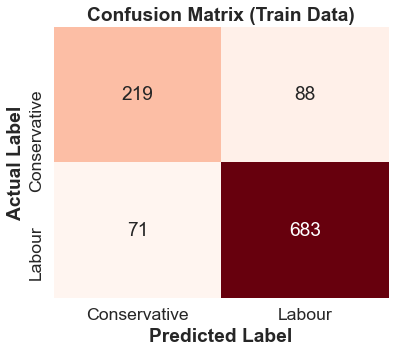

In [262]:
sns.set(font_scale=1.6)
plt.figure(figsize=(6,5))
confusion_matrix(y_train,ytrain_predict,labels=['Conservative','Labour'])
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='Reds',xticklabels=['Conservative','Labour'],yticklabels=['Conservative','Labour'])
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Train Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

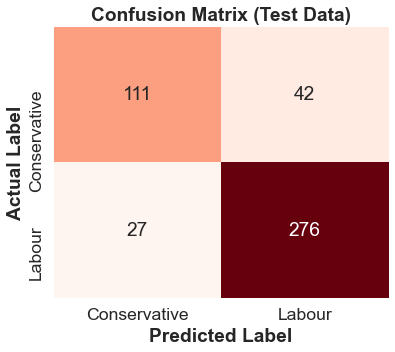

In [263]:
## Confusion matrix on the test data
sns.set(font_scale=1.6)
plt.figure(figsize=(6,5))
confusion_matrix(y_test,ytest_predict)
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True, fmt='d',cbar=False, cmap='Reds',xticklabels=['Conservative','Labour'],yticklabels=['Conservative','Labour'])
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Test Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

In [264]:
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

Conservative       0.76      0.71      0.73       307
      Labour       0.89      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.81      0.81      1061
weighted avg       0.85      0.85      0.85      1061
 



In [265]:
print(classification_report(y_test, ytest_predict),'\n');

              precision    recall  f1-score   support

Conservative       0.80      0.73      0.76       153
      Labour       0.87      0.91      0.89       303

    accuracy                           0.85       456
   macro avg       0.84      0.82      0.83       456
weighted avg       0.85      0.85      0.85       456
 



C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


AUC: 0.917


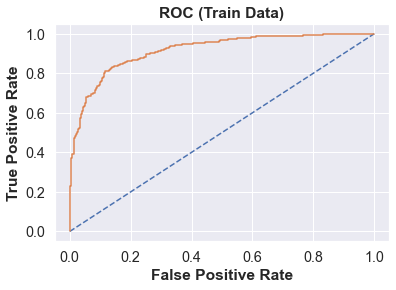

In [266]:
sns.set(font_scale=1.3)
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs,pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC (Train Data)',weight='bold')
sns.set(font_scale=1)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


AUC: 0.898


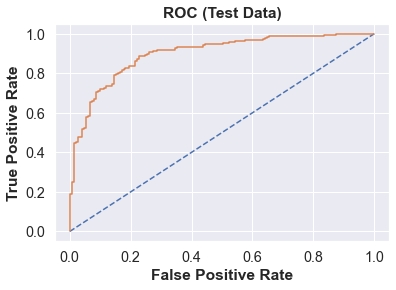

In [267]:
sns.set(font_scale=1.3)
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs,pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC (Test Data)',weight='bold')
sns.set(font_scale=1)

In [29]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
%matplotlib inline

df=pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True,drop=True)
df =pd.get_dummies(df, columns=['gender','vote'],drop_first=True)
df

age  economic.cond.national  economic.cond.household  Blair  Hague  \
0      43                       3                        3      4      1   
1      36                       4                        4      4      4   
2      35                       4                        4      5      2   
3      24                       4                        2      2      1   
4      41                       2                        2      1      1   
...   ...                     ...                      ...    ...    ...   
1512   67                       5                        3      2      4   
1513   73                       2                        2      4      4   
1514   37                       3                        3      5      4   
1515   61                       3                        3      1      4   
1516   74                       2                        3      2      4   

      Europe  political.knowledge  gender_male  vote_Labour  
0          2                    2            0            1  
1          5                    2            1            1  
2          3                    2            1            1  
3          4                    0            0            1  
4          6                    2            1            1  
...      ...                  ...          ...          ...  
1512      11                    3            1            0  
1513       8                    2            1            0  
1514       2                    2            1            1  
1515      11                    2            1            0  
1516      11                    0            0            0  

[1517 rows x 9 columns]

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
df_unscaled = df.copy()
df_unscaled

age  economic.cond.national  economic.cond.household  Blair  Hague  \
0      43                       3                        3      4      1   
1      36                       4                        4      4      4   
2      35                       4                        4      5      2   
3      24                       4                        2      2      1   
4      41                       2                        2      1      1   
...   ...                     ...                      ...    ...    ...   
1512   67                       5                        3      2      4   
1513   73                       2                        2      4      4   
1514   37                       3                        3      5      4   
1515   61                       3                        3      1      4   
1516   74                       2                        3      2      4   

      Europe  political.knowledge  gender_male  vote_Labour  
0          2                    2            0            1  
1          5                    2            1            1  
2          3                    2            1            1  
3          4                    0            0            1  
4          6                    2            1            1  
...      ...                  ...          ...          ...  
1512      11                    3            1            0  
1513       8                    2            1            0  
1514       2                    2            1            1  
1515      11                    2            1            0  
1516      11                    0            0            0  

[1517 rows x 9 columns]

In [32]:
X = df.drop("vote_Labour" , axis=1)
y = df['vote_Labour']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1, stratify=y)

In [34]:
X_train

age  economic.cond.national  economic.cond.household  Blair  Hague  \
532    71                       3                        3      4      2   
706    57                       4                        5      4      1   
1140   24                       3                        4      2      4   
1077   43                       4                        4      2      3   
954    37                       3                        2      4      2   
...   ...                     ...                      ...    ...    ...   
512    80                       2                        2      2      4   
825    27                       3                        3      2      4   
348    56                       4                        2      5      2   
1241   75                       4                        3      4      5   
1137   43                       2                        3      2      3   

      Europe  political.knowledge  gender_male  
532       11                    0            0  
706        3                    2            0  
1140      11                    0            1  
1077       5                    0            1  
954        7                    2            1  
...      ...                  ...          ...  
512        7                    2            1  
825        5                    2            0  
348        1                    2            0  
1241       7                    3            0  
1137      11                    2            0  

[1061 rows x 8 columns]

In [35]:
X_train_scaled = X_train.copy()
col_names = [x for x in X_train.columns]
features = X_train_scaled[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X_train_scaled[col_names] = features
X_train_scaled

age  economic.cond.national  economic.cond.household     Blair  \
532   1.078284               -0.274403                -0.137087  0.557983   
706   0.181786                0.858443                 1.986262  0.557983   
1140 -1.931388               -0.274403                 0.924587 -1.180695   
1077 -0.714712                0.858443                 0.924587 -1.180695   
954  -1.098925               -0.274403                -1.198761  0.557983   
...        ...                     ...                      ...       ...   
512   1.654605               -1.407249                -1.198761 -1.180695   
825  -1.739281               -0.274403                -0.137087 -1.180695   
348   0.117751                0.858443                -1.198761  1.427322   
1241  1.334427                0.858443                -0.137087  0.557983   
1137 -0.714712               -1.407249                -0.137087 -1.180695   

         Hague    Europe  political.knowledge  gender_male  
532  -0.625062  1.316728            -1.417763    -0.917613  
706  -1.441798 -1.148833             0.422294    -0.917613  
1140  1.008412  1.316728            -1.417763     1.089784  
1077  0.191675 -0.532443            -1.417763     1.089784  
954  -0.625062  0.083948             0.422294     1.089784  
...        ...       ...                  ...          ...  
512   1.008412  0.083948             0.422294     1.089784  
825   1.008412 -0.532443             0.422294    -0.917613  
348  -0.625062 -1.765223             0.422294    -0.917613  
1241  1.825149  0.083948             1.342323    -0.917613  
1137  0.191675  1.316728             0.422294    -0.917613  

[1061 rows x 8 columns]

In [36]:
X_test_scaled = X_test.copy()
col_names = [x for x in X_test.columns]
features = X_test_scaled[col_names]
#scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X_test_scaled[col_names] = features
X_test_scaled

age  economic.cond.national  economic.cond.household     Blair  \
273   1.078284               -1.407249                -0.137087  0.557983   
765  -1.483139               -1.407249                -1.198761 -1.180695   
415  -1.226997                0.858443                -0.137087 -1.180695   
1029 -1.291032                0.858443                 0.924587  0.557983   
506  -0.906819               -0.274403                 0.924587  0.557983   
...        ...                     ...                      ...       ...   
653   0.181786                0.858443                 0.924587  0.557983   
504   0.950213               -0.274403                 0.924587 -1.180695   
1423  1.526533               -0.274403                -0.137087  1.427322   
886  -1.226997               -0.274403                 0.924587 -1.180695   
350   1.846711               -1.407249                 0.924587 -1.180695   

         Hague    Europe  political.knowledge  gender_male  
273  -0.625062  1.316728            -1.417763    -0.917613  
765   1.008412 -0.532443             0.422294     1.089784  
415  -1.441798  0.083948             0.422294     1.089784  
1029 -0.625062  0.083948            -1.417763    -0.917613  
506  -0.625062  0.083948             1.342323     1.089784  
...        ...       ...                  ...          ...  
653  -0.625062  1.316728            -1.417763    -0.917613  
504   1.008412  0.700338             0.422294     1.089784  
1423 -0.625062 -1.148833            -1.417763    -0.917613  
886   1.008412  1.316728            -1.417763     1.089784  
350   1.008412  1.008533             0.422294    -0.917613  

[456 rows x 8 columns]

In [37]:
X_train_age_scaled=X_train.copy()
X_train_age_scaled['age'] = X_train_scaled['age']
X_train_age_scaled

age  economic.cond.national  economic.cond.household  Blair  Hague  \
532   1.078284                       3                        3      4      2   
706   0.181786                       4                        5      4      1   
1140 -1.931388                       3                        4      2      4   
1077 -0.714712                       4                        4      2      3   
954  -1.098925                       3                        2      4      2   
...        ...                     ...                      ...    ...    ...   
512   1.654605                       2                        2      2      4   
825  -1.739281                       3                        3      2      4   
348   0.117751                       4                        2      5      2   
1241  1.334427                       4                        3      4      5   
1137 -0.714712                       2                        3      2      3   

      Europe  political.knowledge  gender_male  
532       11                    0            0  
706        3                    2            0  
1140      11                    0            1  
1077       5                    0            1  
954        7                    2            1  
...      ...                  ...          ...  
512        7                    2            1  
825        5                    2            0  
348        1                    2            0  
1241       7                    3            0  
1137      11                    2            0  

[1061 rows x 8 columns]

In [38]:
X_test_age_scaled=X_test.copy()
X_test_age_scaled['age'] = X_test_scaled['age']
X_test_age_scaled

age  economic.cond.national  economic.cond.household  Blair  Hague  \
273   1.078284                       2                        3      4      2   
765  -1.483139                       2                        2      2      4   
415  -1.226997                       4                        3      2      1   
1029 -1.291032                       4                        4      4      2   
506  -0.906819                       3                        4      4      2   
...        ...                     ...                      ...    ...    ...   
653   0.181786                       4                        4      4      2   
504   0.950213                       3                        4      2      4   
1423  1.526533                       3                        3      5      2   
886  -1.226997                       3                        4      2      4   
350   1.846711                       2                        4      2      4   

      Europe  political.knowledge  gender_male  
273       11                    0            0  
765        5                    2            1  
415        7                    2            1  
1029       7                    0            0  
506        7                    3            1  
...      ...                  ...          ...  
653       11                    0            0  
504        9                    2            1  
1423       3                    0            0  
886       11                    0            1  
350       10                    2            0  

[456 rows x 8 columns]

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

In [40]:
model.score(X_train, y_train)

0.822808671065033

In [41]:
model.score(X_test, y_test)

0.8530701754385965

In [42]:
pred_train_prob = model.predict_proba(X_train)
pred_test_prob = model.predict_proba(X_test)
pred_train_prob

array([[0.1209749 , 0.8790251 ],
       [0.01171531, 0.98828469],
       [0.61640895, 0.38359105],
       ...,
       [0.01079479, 0.98920521],
       [0.77030877, 0.22969123],
       [0.77010558, 0.22989442]])

In [43]:
pred_train_prob = pred_train_prob[:,1]

In [44]:
from sklearn.metrics import accuracy_score,f1_score,recall_score, precision_score


def GetCustomData(custom_prob):
    custom_cutoff_data=[]

    for i in range(0,len(pred_train_prob)):  #2333
        if pred_train_prob[i] >custom_prob:
            a= 1
        else:
            a=0
        custom_cutoff_data.append(a)
    return custom_cutoff_data

In [45]:
thresh=[]
acc=[]
f1=[]
rec=[]
pre=[]

In [46]:
for j in np.arange(0.1,1,0.1):
    result = GetCustomData(j)
    thresh.append(j)
    acc.append(accuracy_score(y_train,result))
    f1.append(f1_score(y_train,result))
    rec.append(recall_score(y_train,result))
    pre.append(precision_score(y_train,result))

In [47]:
dat = pd.DataFrame({'Threshold': thresh,
             'Accuracy': acc,
             'f1': f1,
             'Recall': rec,
             'Precision':pre})
dat

Threshold  Accuracy        f1    Recall  Precision
0        0.1  0.742696  0.842651  0.989175   0.733936
1        0.2  0.781338  0.860577  0.968877   0.774054
2        0.3  0.801131  0.868699  0.944520   0.804147
3        0.4  0.819039  0.876289  0.920162   0.836408
4        0.5  0.822809  0.874667  0.887686   0.862024
5        0.6  0.819981  0.868729  0.855210   0.882682
6        0.7  0.811499  0.856528  0.807848   0.911450
7        0.8  0.756833  0.802752  0.710419   0.922671
8        0.9  0.675778  0.709949  0.569689   0.941834

In [48]:
dat[dat['f1']==dat['f1'].max()]

Threshold  Accuracy        f1    Recall  Precision
3        0.4  0.819039  0.876289  0.920162   0.836408

In [49]:
dat[dat['Accuracy']==dat['Accuracy'].max()]

Threshold  Accuracy        f1    Recall  Precision
4        0.5  0.822809  0.874667  0.887686   0.862024

In [50]:
custom_prob = 0.4
custom_cutoff_data=[]

for i in range(0,len(pred_train_prob)):  #2333
    if pred_train_prob[i] >custom_prob:
        a= 1
    else:
        a=0
    custom_cutoff_data.append(a)

In [51]:
ytrain_predict = custom_cutoff_data

In [52]:
data_pred_custom_cutoff=[]
for i in range(0,len(pred_test_prob[:,1])):
    if np.array(pred_test_prob[:,1])[i]>custom_prob:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

In [53]:
ytest_predict = data_pred_custom_cutoff

In [54]:
accuracy_score(y_train,ytrain_predict)

0.819038642789821

In [55]:
accuracy_score(y_test,ytest_predict)

0.8486842105263158

# knn

In [60]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
%matplotlib inline

df=pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True,drop=True)
df =pd.get_dummies(df, columns=['gender'],drop_first=True)
df

vote  age  economic.cond.national  economic.cond.household  \
0           Labour   43                       3                        3   
1           Labour   36                       4                        4   
2           Labour   35                       4                        4   
3           Labour   24                       4                        2   
4           Labour   41                       2                        2   
...            ...  ...                     ...                      ...   
1512  Conservative   67                       5                        3   
1513  Conservative   73                       2                        2   
1514        Labour   37                       3                        3   
1515  Conservative   61                       3                        3   
1516  Conservative   74                       2                        3   

      Blair  Hague  Europe  political.knowledge  gender_male  
0         4      1       2                    2            0  
1         4      4       5                    2            1  
2         5      2       3                    2            1  
3         2      1       4                    0            0  
4         1      1       6                    2            1  
...     ...    ...     ...                  ...          ...  
1512      2      4      11                    3            1  
1513      4      4       8                    2            1  
1514      5      4       2                    2            1  
1515      1      4      11                    2            1  
1516      2      4      11                    0            0  

[1517 rows x 9 columns]

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
df_unscaled = df.copy()
df_unscaled

vote  age  economic.cond.national  economic.cond.household  \
0           Labour   43                       3                        3   
1           Labour   36                       4                        4   
2           Labour   35                       4                        4   
3           Labour   24                       4                        2   
4           Labour   41                       2                        2   
...            ...  ...                     ...                      ...   
1512  Conservative   67                       5                        3   
1513  Conservative   73                       2                        2   
1514        Labour   37                       3                        3   
1515  Conservative   61                       3                        3   
1516  Conservative   74                       2                        3   

      Blair  Hague  Europe  political.knowledge  gender_male  
0         4      1       2                    2            0  
1         4      4       5                    2            1  
2         5      2       3                    2            1  
3         2      1       4                    0            0  
4         1      1       6                    2            1  
...     ...    ...     ...                  ...          ...  
1512      2      4      11                    3            1  
1513      4      4       8                    2            1  
1514      5      4       2                    2            1  
1515      1      4      11                    2            1  
1516      2      4      11                    0            0  

[1517 rows x 9 columns]

In [63]:
X = df.drop("vote" , axis=1)
y = df['vote']

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1, stratify=y)

In [65]:
X_train_scaled = X_train.copy()
col_names = [x for x in X_train.columns]
features = X_train_scaled[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X_train_scaled[col_names] = features
X_train_scaled

age  economic.cond.national  economic.cond.household     Blair  \
532   1.078284               -0.274403                -0.137087  0.557983   
706   0.181786                0.858443                 1.986262  0.557983   
1140 -1.931388               -0.274403                 0.924587 -1.180695   
1077 -0.714712                0.858443                 0.924587 -1.180695   
954  -1.098925               -0.274403                -1.198761  0.557983   
...        ...                     ...                      ...       ...   
512   1.654605               -1.407249                -1.198761 -1.180695   
825  -1.739281               -0.274403                -0.137087 -1.180695   
348   0.117751                0.858443                -1.198761  1.427322   
1241  1.334427                0.858443                -0.137087  0.557983   
1137 -0.714712               -1.407249                -0.137087 -1.180695   

         Hague    Europe  political.knowledge  gender_male  
532  -0.625062  1.316728            -1.417763    -0.917613  
706  -1.441798 -1.148833             0.422294    -0.917613  
1140  1.008412  1.316728            -1.417763     1.089784  
1077  0.191675 -0.532443            -1.417763     1.089784  
954  -0.625062  0.083948             0.422294     1.089784  
...        ...       ...                  ...          ...  
512   1.008412  0.083948             0.422294     1.089784  
825   1.008412 -0.532443             0.422294    -0.917613  
348  -0.625062 -1.765223             0.422294    -0.917613  
1241  1.825149  0.083948             1.342323    -0.917613  
1137  0.191675  1.316728             0.422294    -0.917613  

[1061 rows x 8 columns]

In [66]:
X_test_scaled = X_test.copy()
col_names = [x for x in X_test.columns]
features = X_test_scaled[col_names]
#scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X_test_scaled[col_names] = features
X_test_scaled

age  economic.cond.national  economic.cond.household     Blair  \
273   1.078284               -1.407249                -0.137087  0.557983   
765  -1.483139               -1.407249                -1.198761 -1.180695   
415  -1.226997                0.858443                -0.137087 -1.180695   
1029 -1.291032                0.858443                 0.924587  0.557983   
506  -0.906819               -0.274403                 0.924587  0.557983   
...        ...                     ...                      ...       ...   
653   0.181786                0.858443                 0.924587  0.557983   
504   0.950213               -0.274403                 0.924587 -1.180695   
1423  1.526533               -0.274403                -0.137087  1.427322   
886  -1.226997               -0.274403                 0.924587 -1.180695   
350   1.846711               -1.407249                 0.924587 -1.180695   

         Hague    Europe  political.knowledge  gender_male  
273  -0.625062  1.316728            -1.417763    -0.917613  
765   1.008412 -0.532443             0.422294     1.089784  
415  -1.441798  0.083948             0.422294     1.089784  
1029 -0.625062  0.083948            -1.417763    -0.917613  
506  -0.625062  0.083948             1.342323     1.089784  
...        ...       ...                  ...          ...  
653  -0.625062  1.316728            -1.417763    -0.917613  
504   1.008412  0.700338             0.422294     1.089784  
1423 -0.625062 -1.148833            -1.417763    -0.917613  
886   1.008412  1.316728            -1.417763     1.089784  
350   1.008412  1.008533             0.422294    -0.917613  

[456 rows x 8 columns]

In [67]:
X_train_age_scaled=X_train.copy()
X_train_age_scaled['age'] = X_train_scaled['age']
X_train_age_scaled

age  economic.cond.national  economic.cond.household  Blair  Hague  \
532   1.078284                       3                        3      4      2   
706   0.181786                       4                        5      4      1   
1140 -1.931388                       3                        4      2      4   
1077 -0.714712                       4                        4      2      3   
954  -1.098925                       3                        2      4      2   
...        ...                     ...                      ...    ...    ...   
512   1.654605                       2                        2      2      4   
825  -1.739281                       3                        3      2      4   
348   0.117751                       4                        2      5      2   
1241  1.334427                       4                        3      4      5   
1137 -0.714712                       2                        3      2      3   

      Europe  political.knowledge  gender_male  
532       11                    0            0  
706        3                    2            0  
1140      11                    0            1  
1077       5                    0            1  
954        7                    2            1  
...      ...                  ...          ...  
512        7                    2            1  
825        5                    2            0  
348        1                    2            0  
1241       7                    3            0  
1137      11                    2            0  

[1061 rows x 8 columns]

In [68]:
X_test_age_scaled=X_test.copy()
X_test_age_scaled['age'] = X_test_scaled['age']
X_test_age_scaled

age  economic.cond.national  economic.cond.household  Blair  Hague  \
273   1.078284                       2                        3      4      2   
765  -1.483139                       2                        2      2      4   
415  -1.226997                       4                        3      2      1   
1029 -1.291032                       4                        4      4      2   
506  -0.906819                       3                        4      4      2   
...        ...                     ...                      ...    ...    ...   
653   0.181786                       4                        4      4      2   
504   0.950213                       3                        4      2      4   
1423  1.526533                       3                        3      5      2   
886  -1.226997                       3                        4      2      4   
350   1.846711                       2                        4      2      4   

      Europe  political.knowledge  gender_male  
273       11                    0            0  
765        5                    2            1  
415        7                    2            1  
1029       7                    0            0  
506        7                    3            1  
...      ...                  ...          ...  
653       11                    0            0  
504        9                    2            1  
1423       3                    0            0  
886       11                    0            1  
350       10                    2            0  

[456 rows x 8 columns]

In [69]:
from sklearn.neighbors import KNeighborsClassifier
#Build knn Model
clf = KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='auto')
model=clf.fit(X_train,y_train)

In [70]:
model.score(X_train, y_train)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8491988689915174

In [71]:
model.score(X_test, y_test)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8070175438596491

In [72]:
model=clf.fit(X_train_scaled,y_train)
model.score(X_train_scaled, y_train)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8614514608859567

In [73]:
model.score(X_test_scaled, y_test)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8377192982456141

In [74]:
model=clf.fit(X_train_age_scaled,y_train)
model.score(X_train_age_scaled, y_train)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8614514608859567

In [75]:
model.score(X_test_age_scaled, y_test)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8508771929824561

In [76]:
from sklearn import preprocessing
x = X_train.values    # returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_train_norm = pd.DataFrame(x_scaled,columns=X_train.columns)
X_train_norm

age  economic.cond.national  economic.cond.household  Blair  Hague  \
0     0.681159                    0.50                     0.50   0.75   0.25   
1     0.478261                    0.75                     1.00   0.75   0.00   
2     0.000000                    0.50                     0.75   0.25   0.75   
3     0.275362                    0.75                     0.75   0.25   0.50   
4     0.188406                    0.50                     0.25   0.75   0.25   
...        ...                     ...                      ...    ...    ...   
1056  0.811594                    0.25                     0.25   0.25   0.75   
1057  0.043478                    0.50                     0.50   0.25   0.75   
1058  0.463768                    0.75                     0.25   1.00   0.25   
1059  0.739130                    0.75                     0.50   0.75   1.00   
1060  0.275362                    0.25                     0.50   0.25   0.50   

      Europe  political.knowledge  gender_male  
0        1.0             0.000000          0.0  
1        0.2             0.666667          0.0  
2        1.0             0.000000          1.0  
3        0.4             0.000000          1.0  
4        0.6             0.666667          1.0  
...      ...                  ...          ...  
1056     0.6             0.666667          1.0  
1057     0.4             0.666667          0.0  
1058     0.0             0.666667          0.0  
1059     0.6             1.000000          0.0  
1060     1.0             0.666667          0.0  

[1061 rows x 8 columns]

In [77]:
x = X_test.values
x_scaled = min_max_scaler.transform(x)
X_test_norm = pd.DataFrame(x_scaled,columns=X_test.columns)
X_test_norm

age  economic.cond.national  economic.cond.household  Blair  Hague  \
0    0.681159                    0.25                     0.50   0.75   0.25   
1    0.101449                    0.25                     0.25   0.25   0.75   
2    0.159420                    0.75                     0.50   0.25   0.00   
3    0.144928                    0.75                     0.75   0.75   0.25   
4    0.231884                    0.50                     0.75   0.75   0.25   
..        ...                     ...                      ...    ...    ...   
451  0.478261                    0.75                     0.75   0.75   0.25   
452  0.652174                    0.50                     0.75   0.25   0.75   
453  0.782609                    0.50                     0.50   1.00   0.25   
454  0.159420                    0.50                     0.75   0.25   0.75   
455  0.855072                    0.25                     0.75   0.25   0.75   

     Europe  political.knowledge  gender_male  
0       1.0             0.000000          0.0  
1       0.4             0.666667          1.0  
2       0.6             0.666667          1.0  
3       0.6             0.000000          0.0  
4       0.6             1.000000          1.0  
..      ...                  ...          ...  
451     1.0             0.000000          0.0  
452     0.8             0.666667          1.0  
453     0.2             0.000000          0.0  
454     1.0             0.000000          1.0  
455     0.9             0.666667          0.0  

[456 rows x 8 columns]

In [78]:
X_train_age_norm = X_train.copy()
X_train_age_norm['age'] = (X_train['age']-X_train['age'].min())/(X_train['age'].max()-X_train['age'].min())
X_train_age_norm

age  economic.cond.national  economic.cond.household  Blair  Hague  \
532   0.681159                       3                        3      4      2   
706   0.478261                       4                        5      4      1   
1140  0.000000                       3                        4      2      4   
1077  0.275362                       4                        4      2      3   
954   0.188406                       3                        2      4      2   
...        ...                     ...                      ...    ...    ...   
512   0.811594                       2                        2      2      4   
825   0.043478                       3                        3      2      4   
348   0.463768                       4                        2      5      2   
1241  0.739130                       4                        3      4      5   
1137  0.275362                       2                        3      2      3   

      Europe  political.knowledge  gender_male  
532       11                    0            0  
706        3                    2            0  
1140      11                    0            1  
1077       5                    0            1  
954        7                    2            1  
...      ...                  ...          ...  
512        7                    2            1  
825        5                    2            0  
348        1                    2            0  
1241       7                    3            0  
1137      11                    2            0  

[1061 rows x 8 columns]

In [79]:
X_test_age_norm = X_test.copy()
X_test_age_norm['age'] = (X_test['age']-X_train['age'].min())/(X_train['age'].max()-X_train['age'].min())
X_test_age_norm

age  economic.cond.national  economic.cond.household  Blair  Hague  \
273   0.681159                       2                        3      4      2   
765   0.101449                       2                        2      2      4   
415   0.159420                       4                        3      2      1   
1029  0.144928                       4                        4      4      2   
506   0.231884                       3                        4      4      2   
...        ...                     ...                      ...    ...    ...   
653   0.478261                       4                        4      4      2   
504   0.652174                       3                        4      2      4   
1423  0.782609                       3                        3      5      2   
886   0.159420                       3                        4      2      4   
350   0.855072                       2                        4      2      4   

      Europe  political.knowledge  gender_male  
273       11                    0            0  
765        5                    2            1  
415        7                    2            1  
1029       7                    0            0  
506        7                    3            1  
...      ...                  ...          ...  
653       11                    0            0  
504        9                    2            1  
1423       3                    0            0  
886       11                    0            1  
350       10                    2            0  

[456 rows x 8 columns]

In [80]:
model.fit(X_train_norm, y_train)

KNeighborsClassifier()

In [81]:
model.score(X_train_norm, y_train)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8680490103675778

In [82]:
model.score(X_test_norm, y_test)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8442982456140351

In [83]:
model.fit(X_train_age_norm, y_train)

KNeighborsClassifier()

In [84]:
model.score(X_train_age_norm, y_train)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8633364750235627

In [85]:
model.score(X_test_age_norm, y_test)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8464912280701754

In [86]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,31,1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

ac_scores

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning:

[0.7741228070175439,
 0.7543859649122807,
 0.8070175438596491,
 0.8114035087719298,
 0.8070175438596491,
 0.8048245614035088,
 0.8289473684210527,
 0.8289473684210527,
 0.831140350877193,
 0.8289473684210527,
 0.831140350877193,
 0.8289473684210527,
 0.8377192982456141,
 0.8333333333333334,
 0.8442982456140351,
 0.8399122807017544,
 0.8421052631578947,
 0.8421052631578947,
 0.8377192982456141,
 0.831140350877193,
 0.8245614035087719,
 0.8355263157894737,
 0.8333333333333334,
 0.8399122807017544,
 0.8377192982456141,
 0.8442982456140351,
 0.8486842105263158,
 0.8464912280701754,
 0.8442982456140351,
 0.8442982456140351]

In [87]:
# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.22587719298245612,
 0.24561403508771928,
 0.19298245614035092,
 0.1885964912280702,
 0.19298245614035092,
 0.19517543859649122,
 0.17105263157894735,
 0.17105263157894735,
 0.16885964912280704,
 0.17105263157894735,
 0.16885964912280704,
 0.17105263157894735,
 0.16228070175438591,
 0.16666666666666663,
 0.1557017543859649,
 0.1600877192982456,
 0.1578947368421053,
 0.1578947368421053,
 0.16228070175438591,
 0.16885964912280704,
 0.17543859649122806,
 0.16447368421052633,
 0.16666666666666663,
 0.1600877192982456,
 0.16228070175438591,
 0.1557017543859649,
 0.15131578947368418,
 0.1535087719298246,
 0.1557017543859649,
 0.1557017543859649]

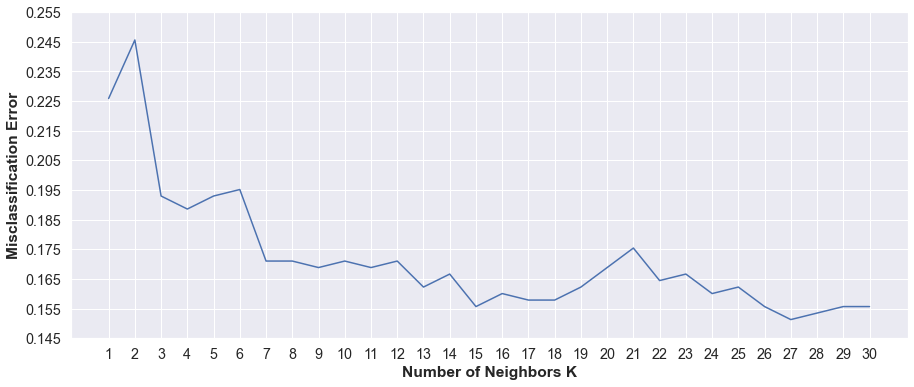

In [88]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
sns.set(font_scale=1.3)
plt.figure(figsize=(15,6))
plt.plot(range(1,31,1), MCE)
plt.xlabel('Number of Neighbors K',weight='bold')
plt.ylabel('Misclassification Error',weight='bold')
plt.xticks(range(1,31))
plt.yticks(np.arange(0.145,0.255,0.01))
plt.show()
sns.set(font_scale=1.0)

In [89]:
from sklearn.neighbors import KNeighborsClassifier
#Build knn Model
clf = KNeighborsClassifier(n_neighbors=27,leaf_size=10)
model=clf.fit(X_train,y_train)

In [90]:
model.score(X_train, y_train)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8058435438265787

In [91]:
model.score(X_test, y_test)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8464912280701754

In [92]:
model=clf.fit(X_train_scaled,y_train)
model.score(X_train_scaled, y_train)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8322337417530632

In [93]:
model.score(X_test_scaled, y_test)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8442982456140351

In [94]:
model=clf.fit(X_train_age_scaled,y_train)
model.score(X_train_age_scaled, y_train)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8350612629594723

In [95]:
model.score(X_test_age_scaled, y_test)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8508771929824561

In [96]:
from sklearn.model_selection import GridSearchCV
grid={'weights':['uniform','distance'], 'leaf_size':[10,15,20,30,50,100,200,400,500]}
model = KNeighborsClassifier(n_neighbors=27)

In [97]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [98]:
grid_search.fit(X_train, y_train)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_neighbors=27), n_jobs=-1,
             param_grid={'leaf_size': [10, 15, 20, 30, 50, 100, 200, 400, 500],
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [99]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'leaf_size': 10, 'weights': 'uniform'} 

KNeighborsClassifier(leaf_size=10, n_neighbors=27)


In [100]:
model = KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='auto')

In [101]:
model.fit(X_train_age_scaled,y_train)
model.score(X_train_age_scaled, y_train)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8614514608859567

In [102]:
model.score(X_test_age_scaled, y_test)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8508771929824561

In [103]:
from imblearn.over_sampling import SMOTE
print(X_train_age_scaled.shape)
print(X_test_age_scaled.shape)

(1061, 8)
(456, 8)


In [104]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train_age_scaled, y_train.ravel())
X_train_res.shape

(1478, 8)

In [105]:
model.fit(X_train_res, y_train_res)
model.score(X_train_res, y_train_res)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8897158322056834

In [106]:
model.score(X_test_age_scaled, y_test)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8333333333333334

In [107]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3, interaction_only=True)

#poly = PolynomialFeatures()

X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(1061, 93)

In [108]:
model.fit(X_train,y_train)
model.score(X_train, y_train)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8623939679547596

In [109]:
model.score(X_test, y_test)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8245614035087719

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1, stratify=y)

In [119]:
#Build knn Model
clf = KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='auto')
model=clf.fit(X_train_age_scaled,y_train)

In [120]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

ytrain_predict = model.predict(X_train_age_scaled)
ytest_predict = model.predict(X_test_age_scaled)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


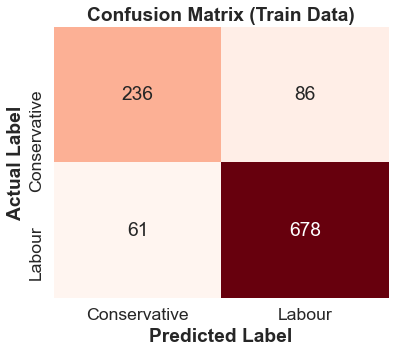

In [121]:
sns.set(font_scale=1.6)
plt.figure(figsize=(6,5))
confusion_matrix(y_train,ytrain_predict,labels=['Conservative','Labour'])
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='Reds',xticklabels=['Conservative','Labour'],yticklabels=['Conservative','Labour'])
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Train Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

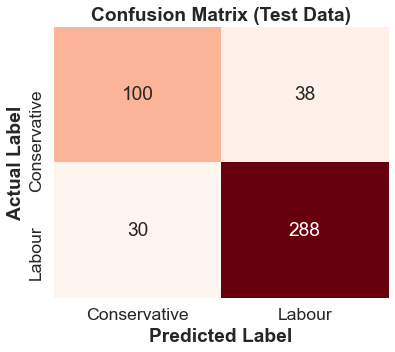

In [122]:
## Confusion matrix on the test data
sns.set(font_scale=1.6)
plt.figure(figsize=(6,5))
confusion_matrix(y_test,ytest_predict)
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True, fmt='d',cbar=False, cmap='Reds',xticklabels=['Conservative','Labour'],yticklabels=['Conservative','Labour'])
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Test Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

In [123]:
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

Conservative       0.79      0.73      0.76       322
      Labour       0.89      0.92      0.90       739

    accuracy                           0.86      1061
   macro avg       0.84      0.83      0.83      1061
weighted avg       0.86      0.86      0.86      1061
 



In [124]:
print(classification_report(y_test, ytest_predict),'\n');

              precision    recall  f1-score   support

Conservative       0.77      0.72      0.75       138
      Labour       0.88      0.91      0.89       318

    accuracy                           0.85       456
   macro avg       0.83      0.82      0.82       456
weighted avg       0.85      0.85      0.85       456
 



C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


AUC: 0.931


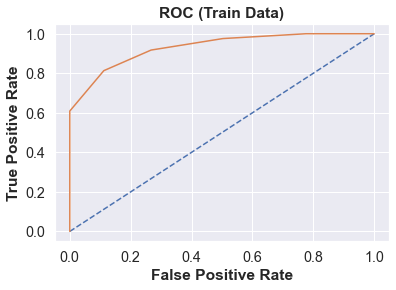

In [127]:
sns.set(font_scale=1.3)
probs = model.predict_proba(X_train_age_scaled)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs,pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC (Train Data)',weight='bold')
sns.set(font_scale=1)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


AUC: 0.878


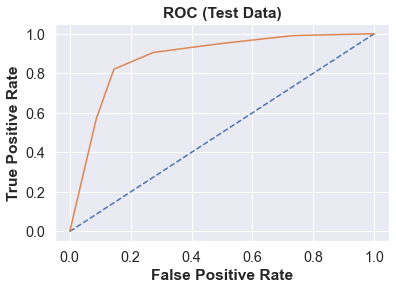

In [128]:
sns.set(font_scale=1.3)
probs = model.predict_proba(X_test_age_scaled)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs,pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC (Test Data)',weight='bold')
sns.set(font_scale=1)

In [129]:
df=pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True,drop=True)
df =pd.get_dummies(df, columns=['gender'],drop_first=True)
df['age']=np.sqrt(df['age'])
df

vote       age  economic.cond.national  economic.cond.household  \
0           Labour  6.557439                       3                        3   
1           Labour  6.000000                       4                        4   
2           Labour  5.916080                       4                        4   
3           Labour  4.898979                       4                        2   
4           Labour  6.403124                       2                        2   
...            ...       ...                     ...                      ...   
1512  Conservative  8.185353                       5                        3   
1513  Conservative  8.544004                       2                        2   
1514        Labour  6.082763                       3                        3   
1515  Conservative  7.810250                       3                        3   
1516  Conservative  8.602325                       2                        3   

      Blair  Hague  Europe  political.knowledge  gender_male  
0         4      1       2                    2            0  
1         4      4       5                    2            1  
2         5      2       3                    2            1  
3         2      1       4                    0            0  
4         1      1       6                    2            1  
...     ...    ...     ...                  ...          ...  
1512      2      4      11                    3            1  
1513      4      4       8                    2            1  
1514      5      4       2                    2            1  
1515      1      4      11                    2            1  
1516      2      4      11                    0            0  

[1517 rows x 9 columns]

In [130]:
X = df.drop("vote" , axis=1)
y = df['vote']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1, stratify=y)

X_train_scaled = X_train.copy()
col_names = [x for x in X_train.columns]
features = X_train_scaled[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X_train_scaled[col_names] = features

X_test_scaled = X_test.copy()
col_names = [x for x in X_test.columns]
features = X_test_scaled[col_names]
#scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X_test_scaled[col_names] = features

X_train_age_scaled=X_train.copy()
X_train_age_scaled['age'] = X_train_scaled['age']

X_test_age_scaled=X_test.copy()
X_test_age_scaled['age'] = X_test_scaled['age']


from sklearn.neighbors import KNeighborsClassifier
#Build knn Model
clf = KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='auto')
model=clf.fit(X_train_age_scaled,y_train)
model.score(X_train_age_scaled, y_train)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8557964184731386

In [131]:
model.score(X_test_age_scaled, y_test)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8486842105263158

In [33]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
%matplotlib inline

df=pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True,drop=True)
df =pd.get_dummies(df, columns=['gender','vote'],drop_first=True)
df

age  economic.cond.national  economic.cond.household  Blair  Hague  \
0      43                       3                        3      4      1   
1      36                       4                        4      4      4   
2      35                       4                        4      5      2   
3      24                       4                        2      2      1   
4      41                       2                        2      1      1   
...   ...                     ...                      ...    ...    ...   
1512   67                       5                        3      2      4   
1513   73                       2                        2      4      4   
1514   37                       3                        3      5      4   
1515   61                       3                        3      1      4   
1516   74                       2                        3      2      4   

      Europe  political.knowledge  gender_male  vote_Labour  
0          2                    2            0            1  
1          5                    2            1            1  
2          3                    2            1            1  
3          4                    0            0            1  
4          6                    2            1            1  
...      ...                  ...          ...          ...  
1512      11                    3            1            0  
1513       8                    2            1            0  
1514       2                    2            1            1  
1515      11                    2            1            0  
1516      11                    0            0            0  

[1517 rows x 9 columns]

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
df_unscaled = df.copy()
df_unscaled

age  economic.cond.national  economic.cond.household  Blair  Hague  \
0      43                       3                        3      4      1   
1      36                       4                        4      4      4   
2      35                       4                        4      5      2   
3      24                       4                        2      2      1   
4      41                       2                        2      1      1   
...   ...                     ...                      ...    ...    ...   
1512   67                       5                        3      2      4   
1513   73                       2                        2      4      4   
1514   37                       3                        3      5      4   
1515   61                       3                        3      1      4   
1516   74                       2                        3      2      4   

      Europe  political.knowledge  gender_male  vote_Labour  
0          2                    2            0            1  
1          5                    2            1            1  
2          3                    2            1            1  
3          4                    0            0            1  
4          6                    2            1            1  
...      ...                  ...          ...          ...  
1512      11                    3            1            0  
1513       8                    2            1            0  
1514       2                    2            1            1  
1515      11                    2            1            0  
1516      11                    0            0            0  

[1517 rows x 9 columns]

In [36]:
X = df.drop("vote_Labour" , axis=1)
y = df['vote_Labour']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1, stratify=y)

In [38]:
X_train

age  economic.cond.national  economic.cond.household  Blair  Hague  \
532    71                       3                        3      4      2   
706    57                       4                        5      4      1   
1140   24                       3                        4      2      4   
1077   43                       4                        4      2      3   
954    37                       3                        2      4      2   
...   ...                     ...                      ...    ...    ...   
512    80                       2                        2      2      4   
825    27                       3                        3      2      4   
348    56                       4                        2      5      2   
1241   75                       4                        3      4      5   
1137   43                       2                        3      2      3   

      Europe  political.knowledge  gender_male  
532       11                    0            0  
706        3                    2            0  
1140      11                    0            1  
1077       5                    0            1  
954        7                    2            1  
...      ...                  ...          ...  
512        7                    2            1  
825        5                    2            0  
348        1                    2            0  
1241       7                    3            0  
1137      11                    2            0  

[1061 rows x 8 columns]

In [39]:
X_train_scaled = X_train.copy()
col_names = [x for x in X_train.columns]
features = X_train_scaled[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X_train_scaled[col_names] = features
X_train_scaled

age  economic.cond.national  economic.cond.household     Blair  \
532   1.078284               -0.274403                -0.137087  0.557983   
706   0.181786                0.858443                 1.986262  0.557983   
1140 -1.931388               -0.274403                 0.924587 -1.180695   
1077 -0.714712                0.858443                 0.924587 -1.180695   
954  -1.098925               -0.274403                -1.198761  0.557983   
...        ...                     ...                      ...       ...   
512   1.654605               -1.407249                -1.198761 -1.180695   
825  -1.739281               -0.274403                -0.137087 -1.180695   
348   0.117751                0.858443                -1.198761  1.427322   
1241  1.334427                0.858443                -0.137087  0.557983   
1137 -0.714712               -1.407249                -0.137087 -1.180695   

         Hague    Europe  political.knowledge  gender_male  
532  -0.625062  1.316728            -1.417763    -0.917613  
706  -1.441798 -1.148833             0.422294    -0.917613  
1140  1.008412  1.316728            -1.417763     1.089784  
1077  0.191675 -0.532443            -1.417763     1.089784  
954  -0.625062  0.083948             0.422294     1.089784  
...        ...       ...                  ...          ...  
512   1.008412  0.083948             0.422294     1.089784  
825   1.008412 -0.532443             0.422294    -0.917613  
348  -0.625062 -1.765223             0.422294    -0.917613  
1241  1.825149  0.083948             1.342323    -0.917613  
1137  0.191675  1.316728             0.422294    -0.917613  

[1061 rows x 8 columns]

In [40]:
X_test_scaled = X_test.copy()
col_names = [x for x in X_test.columns]
features = X_test_scaled[col_names]
#scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X_test_scaled[col_names] = features
X_test_scaled

age  economic.cond.national  economic.cond.household     Blair  \
273   1.078284               -1.407249                -0.137087  0.557983   
765  -1.483139               -1.407249                -1.198761 -1.180695   
415  -1.226997                0.858443                -0.137087 -1.180695   
1029 -1.291032                0.858443                 0.924587  0.557983   
506  -0.906819               -0.274403                 0.924587  0.557983   
...        ...                     ...                      ...       ...   
653   0.181786                0.858443                 0.924587  0.557983   
504   0.950213               -0.274403                 0.924587 -1.180695   
1423  1.526533               -0.274403                -0.137087  1.427322   
886  -1.226997               -0.274403                 0.924587 -1.180695   
350   1.846711               -1.407249                 0.924587 -1.180695   

         Hague    Europe  political.knowledge  gender_male  
273  -0.625062  1.316728            -1.417763    -0.917613  
765   1.008412 -0.532443             0.422294     1.089784  
415  -1.441798  0.083948             0.422294     1.089784  
1029 -0.625062  0.083948            -1.417763    -0.917613  
506  -0.625062  0.083948             1.342323     1.089784  
...        ...       ...                  ...          ...  
653  -0.625062  1.316728            -1.417763    -0.917613  
504   1.008412  0.700338             0.422294     1.089784  
1423 -0.625062 -1.148833            -1.417763    -0.917613  
886   1.008412  1.316728            -1.417763     1.089784  
350   1.008412  1.008533             0.422294    -0.917613  

[456 rows x 8 columns]

In [41]:
X_train_age_scaled=X_train.copy()
X_train_age_scaled['age'] = X_train_scaled['age']
X_train_age_scaled

age  economic.cond.national  economic.cond.household  Blair  Hague  \
532   1.078284                       3                        3      4      2   
706   0.181786                       4                        5      4      1   
1140 -1.931388                       3                        4      2      4   
1077 -0.714712                       4                        4      2      3   
954  -1.098925                       3                        2      4      2   
...        ...                     ...                      ...    ...    ...   
512   1.654605                       2                        2      2      4   
825  -1.739281                       3                        3      2      4   
348   0.117751                       4                        2      5      2   
1241  1.334427                       4                        3      4      5   
1137 -0.714712                       2                        3      2      3   

      Europe  political.knowledge  gender_male  
532       11                    0            0  
706        3                    2            0  
1140      11                    0            1  
1077       5                    0            1  
954        7                    2            1  
...      ...                  ...          ...  
512        7                    2            1  
825        5                    2            0  
348        1                    2            0  
1241       7                    3            0  
1137      11                    2            0  

[1061 rows x 8 columns]

In [42]:
X_test_age_scaled=X_test.copy()
X_test_age_scaled['age'] = X_test_scaled['age']
X_test_age_scaled

age  economic.cond.national  economic.cond.household  Blair  Hague  \
273   1.078284                       2                        3      4      2   
765  -1.483139                       2                        2      2      4   
415  -1.226997                       4                        3      2      1   
1029 -1.291032                       4                        4      4      2   
506  -0.906819                       3                        4      4      2   
...        ...                     ...                      ...    ...    ...   
653   0.181786                       4                        4      4      2   
504   0.950213                       3                        4      2      4   
1423  1.526533                       3                        3      5      2   
886  -1.226997                       3                        4      2      4   
350   1.846711                       2                        4      2      4   

      Europe  political.knowledge  gender_male  
273       11                    0            0  
765        5                    2            1  
415        7                    2            1  
1029       7                    0            0  
506        7                    3            1  
...      ...                  ...          ...  
653       11                    0            0  
504        9                    2            1  
1423       3                    0            0  
886       11                    0            1  
350       10                    2            0  

[456 rows x 8 columns]

In [43]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=27,leaf_size=30)
model=clf.fit(X_train_age_scaled,y_train)

In [44]:
model.score(X_train_age_scaled, y_train)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8350612629594723

In [45]:
model.score(X_test_age_scaled, y_test)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8508771929824561

In [46]:
model = KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='auto')

In [47]:
model.fit(X_train_age_scaled,y_train)
model.score(X_train_age_scaled, y_train)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8614514608859567

In [48]:
model.score(X_test_age_scaled, y_test)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8508771929824561

In [49]:
pred_train_prob = model.predict_proba(X_train_age_scaled)
pred_test_prob = model.predict_proba(X_test_age_scaled)
pred_train_prob

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[0.2, 0.8],
       [0. , 1. ],
       [0.6, 0.4],
       ...,
       [0. , 1. ],
       [0.8, 0.2],
       [0.6, 0.4]])

In [50]:
pred_train_prob = pred_train_prob[:,1]

In [51]:
from sklearn.metrics import accuracy_score,f1_score,recall_score, precision_score


def GetCustomData(custom_prob):
    custom_cutoff_data=[]

    for i in range(0,len(pred_train_prob)):  #2333
        if pred_train_prob[i] >custom_prob:
            a= 1
        else:
            a=0
        custom_cutoff_data.append(a)
    return custom_cutoff_data

In [52]:
thresh=[]
acc=[]
f1=[]
rec=[]
pre=[]

In [53]:
for j in np.arange(0.1,1,0.1):
    result = GetCustomData(j)
    thresh.append(j)
    acc.append(accuracy_score(y_train,result))
    f1.append(f1_score(y_train,result))
    rec.append(recall_score(y_train,result))
    pre.append(precision_score(y_train,result))


In [54]:
dat = pd.DataFrame({'Threshold': thresh,
             'Accuracy': acc,
             'f1': f1,
             'Recall': rec,
             'Precision':pre})
dat

Threshold  Accuracy        f1    Recall  Precision
0        0.1  0.764373  0.855324  1.000000   0.747219
1        0.2  0.830349  0.889026  0.975643   0.816535
2        0.3  0.830349  0.889026  0.975643   0.816535
3        0.4  0.861451  0.902196  0.917456   0.887435
4        0.5  0.861451  0.902196  0.917456   0.887435
5        0.6  0.836004  0.873547  0.813261   0.943485
6        0.7  0.836004  0.873547  0.813261   0.943485
7        0.8  0.727615  0.756939  0.608931   1.000000
8        0.9  0.727615  0.756939  0.608931   1.000000

In [55]:
dat[dat['f1']==dat['f1'].max()]

Threshold  Accuracy        f1    Recall  Precision
3        0.4  0.861451  0.902196  0.917456   0.887435
4        0.5  0.861451  0.902196  0.917456   0.887435

In [56]:
dat[dat['Accuracy']==dat['Accuracy'].max()]

Threshold  Accuracy        f1    Recall  Precision
3        0.4  0.861451  0.902196  0.917456   0.887435
4        0.5  0.861451  0.902196  0.917456   0.887435

# gaussian naive bayes

In [28]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
%matplotlib inline

df=pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True,drop=True)
df =pd.get_dummies(df, columns=['gender'],drop_first=True)
df

vote  age  economic.cond.national  economic.cond.household  \
0           Labour   43                       3                        3   
1           Labour   36                       4                        4   
2           Labour   35                       4                        4   
3           Labour   24                       4                        2   
4           Labour   41                       2                        2   
...            ...  ...                     ...                      ...   
1512  Conservative   67                       5                        3   
1513  Conservative   73                       2                        2   
1514        Labour   37                       3                        3   
1515  Conservative   61                       3                        3   
1516  Conservative   74                       2                        3   

      Blair  Hague  Europe  political.knowledge  gender_male  
0         4      1       2                    2            0  
1         4      4       5                    2            1  
2         5      2       3                    2            1  
3         2      1       4                    0            0  
4         1      1       6                    2            1  
...     ...    ...     ...                  ...          ...  
1512      2      4      11                    3            1  
1513      4      4       8                    2            1  
1514      5      4       2                    2            1  
1515      1      4      11                    2            1  
1516      2      4      11                    0            0  

[1517 rows x 9 columns]

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
df_unscaled = df.copy()
df_unscaled

vote  age  economic.cond.national  economic.cond.household  \
0           Labour   43                       3                        3   
1           Labour   36                       4                        4   
2           Labour   35                       4                        4   
3           Labour   24                       4                        2   
4           Labour   41                       2                        2   
...            ...  ...                     ...                      ...   
1512  Conservative   67                       5                        3   
1513  Conservative   73                       2                        2   
1514        Labour   37                       3                        3   
1515  Conservative   61                       3                        3   
1516  Conservative   74                       2                        3   

      Blair  Hague  Europe  political.knowledge  gender_male  
0         4      1       2                    2            0  
1         4      4       5                    2            1  
2         5      2       3                    2            1  
3         2      1       4                    0            0  
4         1      1       6                    2            1  
...     ...    ...     ...                  ...          ...  
1512      2      4      11                    3            1  
1513      4      4       8                    2            1  
1514      5      4       2                    2            1  
1515      1      4      11                    2            1  
1516      2      4      11                    0            0  

[1517 rows x 9 columns]

In [31]:
X = df.drop("vote" , axis=1)
y = df['vote']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1, stratify=y)

In [33]:
X_train_scaled = X_train.copy()
col_names = [x for x in X_train.columns]
features = X_train_scaled[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X_train_scaled[col_names] = features
X_train_scaled

age  economic.cond.national  economic.cond.household     Blair  \
532   1.078284               -0.274403                -0.137087  0.557983   
706   0.181786                0.858443                 1.986262  0.557983   
1140 -1.931388               -0.274403                 0.924587 -1.180695   
1077 -0.714712                0.858443                 0.924587 -1.180695   
954  -1.098925               -0.274403                -1.198761  0.557983   
...        ...                     ...                      ...       ...   
512   1.654605               -1.407249                -1.198761 -1.180695   
825  -1.739281               -0.274403                -0.137087 -1.180695   
348   0.117751                0.858443                -1.198761  1.427322   
1241  1.334427                0.858443                -0.137087  0.557983   
1137 -0.714712               -1.407249                -0.137087 -1.180695   

         Hague    Europe  political.knowledge  gender_male  
532  -0.625062  1.316728            -1.417763    -0.917613  
706  -1.441798 -1.148833             0.422294    -0.917613  
1140  1.008412  1.316728            -1.417763     1.089784  
1077  0.191675 -0.532443            -1.417763     1.089784  
954  -0.625062  0.083948             0.422294     1.089784  
...        ...       ...                  ...          ...  
512   1.008412  0.083948             0.422294     1.089784  
825   1.008412 -0.532443             0.422294    -0.917613  
348  -0.625062 -1.765223             0.422294    -0.917613  
1241  1.825149  0.083948             1.342323    -0.917613  
1137  0.191675  1.316728             0.422294    -0.917613  

[1061 rows x 8 columns]

In [34]:
X_test_scaled = X_test.copy()
col_names = [x for x in X_test.columns]
features = X_test_scaled[col_names]
#scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X_test_scaled[col_names] = features
X_test_scaled

age  economic.cond.national  economic.cond.household     Blair  \
273   1.078284               -1.407249                -0.137087  0.557983   
765  -1.483139               -1.407249                -1.198761 -1.180695   
415  -1.226997                0.858443                -0.137087 -1.180695   
1029 -1.291032                0.858443                 0.924587  0.557983   
506  -0.906819               -0.274403                 0.924587  0.557983   
...        ...                     ...                      ...       ...   
653   0.181786                0.858443                 0.924587  0.557983   
504   0.950213               -0.274403                 0.924587 -1.180695   
1423  1.526533               -0.274403                -0.137087  1.427322   
886  -1.226997               -0.274403                 0.924587 -1.180695   
350   1.846711               -1.407249                 0.924587 -1.180695   

         Hague    Europe  political.knowledge  gender_male  
273  -0.625062  1.316728            -1.417763    -0.917613  
765   1.008412 -0.532443             0.422294     1.089784  
415  -1.441798  0.083948             0.422294     1.089784  
1029 -0.625062  0.083948            -1.417763    -0.917613  
506  -0.625062  0.083948             1.342323     1.089784  
...        ...       ...                  ...          ...  
653  -0.625062  1.316728            -1.417763    -0.917613  
504   1.008412  0.700338             0.422294     1.089784  
1423 -0.625062 -1.148833            -1.417763    -0.917613  
886   1.008412  1.316728            -1.417763     1.089784  
350   1.008412  1.008533             0.422294    -0.917613  

[456 rows x 8 columns]

In [35]:
X_train_age_scaled=X_train.copy()
X_train_age_scaled['age'] = X_train_scaled['age']
X_train_age_scaled

age  economic.cond.national  economic.cond.household  Blair  Hague  \
532   1.078284                       3                        3      4      2   
706   0.181786                       4                        5      4      1   
1140 -1.931388                       3                        4      2      4   
1077 -0.714712                       4                        4      2      3   
954  -1.098925                       3                        2      4      2   
...        ...                     ...                      ...    ...    ...   
512   1.654605                       2                        2      2      4   
825  -1.739281                       3                        3      2      4   
348   0.117751                       4                        2      5      2   
1241  1.334427                       4                        3      4      5   
1137 -0.714712                       2                        3      2      3   

      Europe  political.knowledge  gender_male  
532       11                    0            0  
706        3                    2            0  
1140      11                    0            1  
1077       5                    0            1  
954        7                    2            1  
...      ...                  ...          ...  
512        7                    2            1  
825        5                    2            0  
348        1                    2            0  
1241       7                    3            0  
1137      11                    2            0  

[1061 rows x 8 columns]

In [36]:
X_test_age_scaled=X_test.copy()
X_test_age_scaled['age'] = X_test_scaled['age']
X_test_age_scaled

age  economic.cond.national  economic.cond.household  Blair  Hague  \
273   1.078284                       2                        3      4      2   
765  -1.483139                       2                        2      2      4   
415  -1.226997                       4                        3      2      1   
1029 -1.291032                       4                        4      4      2   
506  -0.906819                       3                        4      4      2   
...        ...                     ...                      ...    ...    ...   
653   0.181786                       4                        4      4      2   
504   0.950213                       3                        4      2      4   
1423  1.526533                       3                        3      5      2   
886  -1.226997                       3                        4      2      4   
350   1.846711                       2                        4      2      4   

      Europe  political.knowledge  gender_male  
273       11                    0            0  
765        5                    2            1  
415        7                    2            1  
1029       7                    0            0  
506        7                    3            1  
...      ...                  ...          ...  
653       11                    0            0  
504        9                    2            1  
1423       3                    0            0  
886       11                    0            1  
350       10                    2            0  

[456 rows x 8 columns]

In [37]:
from sklearn.naive_bayes import GaussianNB

In [38]:
clf = GaussianNB()
model = clf.fit(X_train, y_train)

In [39]:
model.score(X_train, y_train)

0.8199811498586239

In [40]:
model.score(X_test, y_test)

0.8574561403508771

In [41]:
model=clf.fit(X_train_scaled,y_train)
model.score(X_train_scaled, y_train)

0.8199811498586239

In [42]:
model.score(X_test_scaled, y_test)

0.8574561403508771

In [43]:
model=clf.fit(X_train_age_scaled,y_train)
model.score(X_train_age_scaled, y_train)

0.8199811498586239

In [44]:
model.score(X_test_age_scaled, y_test)

0.8574561403508771

In [45]:
from sklearn import preprocessing
x = X_train.values    # returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_train_norm = pd.DataFrame(x_scaled,columns=X_train.columns)
X_train_norm

age  economic.cond.national  economic.cond.household  Blair  Hague  \
0     0.681159                    0.50                     0.50   0.75   0.25   
1     0.478261                    0.75                     1.00   0.75   0.00   
2     0.000000                    0.50                     0.75   0.25   0.75   
3     0.275362                    0.75                     0.75   0.25   0.50   
4     0.188406                    0.50                     0.25   0.75   0.25   
...        ...                     ...                      ...    ...    ...   
1056  0.811594                    0.25                     0.25   0.25   0.75   
1057  0.043478                    0.50                     0.50   0.25   0.75   
1058  0.463768                    0.75                     0.25   1.00   0.25   
1059  0.739130                    0.75                     0.50   0.75   1.00   
1060  0.275362                    0.25                     0.50   0.25   0.50   

      Europe  political.knowledge  gender_male  
0        1.0             0.000000          0.0  
1        0.2             0.666667          0.0  
2        1.0             0.000000          1.0  
3        0.4             0.000000          1.0  
4        0.6             0.666667          1.0  
...      ...                  ...          ...  
1056     0.6             0.666667          1.0  
1057     0.4             0.666667          0.0  
1058     0.0             0.666667          0.0  
1059     0.6             1.000000          0.0  
1060     1.0             0.666667          0.0  

[1061 rows x 8 columns]

In [46]:
x = X_test.values
x_scaled = min_max_scaler.transform(x)
X_test_norm = pd.DataFrame(x_scaled,columns=X_test.columns)
X_test_norm

age  economic.cond.national  economic.cond.household  Blair  Hague  \
0    0.681159                    0.25                     0.50   0.75   0.25   
1    0.101449                    0.25                     0.25   0.25   0.75   
2    0.159420                    0.75                     0.50   0.25   0.00   
3    0.144928                    0.75                     0.75   0.75   0.25   
4    0.231884                    0.50                     0.75   0.75   0.25   
..        ...                     ...                      ...    ...    ...   
451  0.478261                    0.75                     0.75   0.75   0.25   
452  0.652174                    0.50                     0.75   0.25   0.75   
453  0.782609                    0.50                     0.50   1.00   0.25   
454  0.159420                    0.50                     0.75   0.25   0.75   
455  0.855072                    0.25                     0.75   0.25   0.75   

     Europe  political.knowledge  gender_male  
0       1.0             0.000000          0.0  
1       0.4             0.666667          1.0  
2       0.6             0.666667          1.0  
3       0.6             0.000000          0.0  
4       0.6             1.000000          1.0  
..      ...                  ...          ...  
451     1.0             0.000000          0.0  
452     0.8             0.666667          1.0  
453     0.2             0.000000          0.0  
454     1.0             0.000000          1.0  
455     0.9             0.666667          0.0  

[456 rows x 8 columns]

In [47]:
X_train_age_norm = X_train.copy()
X_train_age_norm['age'] = (X_train['age']-X_train['age'].min())/(X_train['age'].max()-X_train['age'].min())
X_train_age_norm

age  economic.cond.national  economic.cond.household  Blair  Hague  \
532   0.681159                       3                        3      4      2   
706   0.478261                       4                        5      4      1   
1140  0.000000                       3                        4      2      4   
1077  0.275362                       4                        4      2      3   
954   0.188406                       3                        2      4      2   
...        ...                     ...                      ...    ...    ...   
512   0.811594                       2                        2      2      4   
825   0.043478                       3                        3      2      4   
348   0.463768                       4                        2      5      2   
1241  0.739130                       4                        3      4      5   
1137  0.275362                       2                        3      2      3   

      Europe  political.knowledge  gender_male  
532       11                    0            0  
706        3                    2            0  
1140      11                    0            1  
1077       5                    0            1  
954        7                    2            1  
...      ...                  ...          ...  
512        7                    2            1  
825        5                    2            0  
348        1                    2            0  
1241       7                    3            0  
1137      11                    2            0  

[1061 rows x 8 columns]

In [48]:
X_test_age_norm = X_test.copy()
X_test_age_norm['age'] = (X_test['age']-X_train['age'].min())/(X_train['age'].max()-X_train['age'].min())
X_test_age_norm

age  economic.cond.national  economic.cond.household  Blair  Hague  \
273   0.681159                       2                        3      4      2   
765   0.101449                       2                        2      2      4   
415   0.159420                       4                        3      2      1   
1029  0.144928                       4                        4      4      2   
506   0.231884                       3                        4      4      2   
...        ...                     ...                      ...    ...    ...   
653   0.478261                       4                        4      4      2   
504   0.652174                       3                        4      2      4   
1423  0.782609                       3                        3      5      2   
886   0.159420                       3                        4      2      4   
350   0.855072                       2                        4      2      4   

      Europe  political.knowledge  gender_male  
273       11                    0            0  
765        5                    2            1  
415        7                    2            1  
1029       7                    0            0  
506        7                    3            1  
...      ...                  ...          ...  
653       11                    0            0  
504        9                    2            1  
1423       3                    0            0  
886       11                    0            1  
350       10                    2            0  

[456 rows x 8 columns]

In [49]:
model.fit(X_train_norm, y_train)

GaussianNB()

In [50]:
model.score(X_train_norm, y_train)

0.8199811498586239

In [51]:
model.score(X_test_norm, y_test)

0.8574561403508771

In [52]:
model.fit(X_train_age_norm, y_train)

GaussianNB()

In [53]:
model.score(X_train_age_norm, y_train)

0.8199811498586239

In [54]:
model.score(X_test_age_norm, y_test)

0.8574561403508771

In [55]:
from imblearn.over_sampling import SMOTE
print(X_train.shape)
print(X_test.shape)

(1061, 8)
(456, 8)


In [56]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
X_train_res.shape

(1478, 8)

In [57]:
model.fit(X_train_res, y_train_res)
model.score(X_train_res, y_train_res)

0.8105548037889039

In [58]:
model.score(X_test, y_test)

0.8223684210526315

In [80]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 4, interaction_only=True)

#poly = PolynomialFeatures()

X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(1061, 163)

In [81]:
model.fit(X_train,y_train)
model.score(X_train, y_train)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


0.8171536286522149

In [82]:
model.score(X_test, y_test)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


0.8114035087719298

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1, stratify=y)

In [84]:
clf = GaussianNB()
model = clf.fit(X_train, y_train)

In [85]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

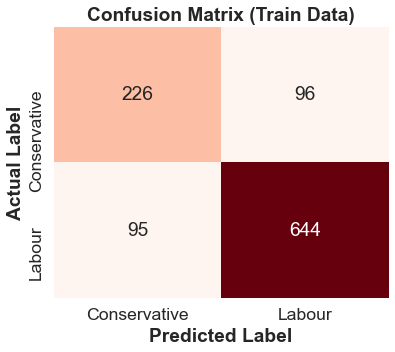

In [86]:
sns.set(font_scale=1.6)
plt.figure(figsize=(6,5))
confusion_matrix(y_train,ytrain_predict,labels=['Conservative','Labour'])
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='Reds',xticklabels=['Conservative','Labour'],yticklabels=['Conservative','Labour'])
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Train Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

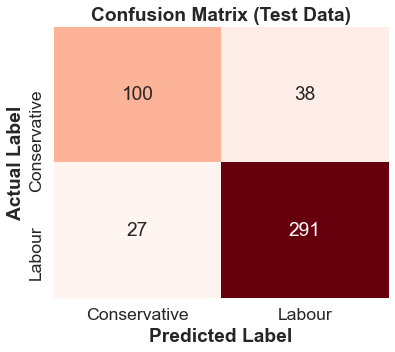

In [87]:
## Confusion matrix on the test data
sns.set(font_scale=1.6)
plt.figure(figsize=(6,5))
confusion_matrix(y_test,ytest_predict)
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True, fmt='d',cbar=False, cmap='Reds',xticklabels=['Conservative','Labour'],yticklabels=['Conservative','Labour'])
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Test Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

In [88]:
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

Conservative       0.70      0.70      0.70       322
      Labour       0.87      0.87      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.79      0.79      1061
weighted avg       0.82      0.82      0.82      1061
 



In [89]:
print(classification_report(y_test, ytest_predict),'\n');

              precision    recall  f1-score   support

Conservative       0.79      0.72      0.75       138
      Labour       0.88      0.92      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.82      0.83       456
weighted avg       0.86      0.86      0.86       456
 



AUC: 0.873


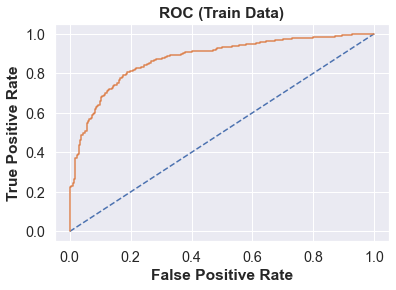

In [90]:
sns.set(font_scale=1.3)
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs,pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC (Train Data)',weight='bold')
sns.set(font_scale=1)

AUC: 0.912


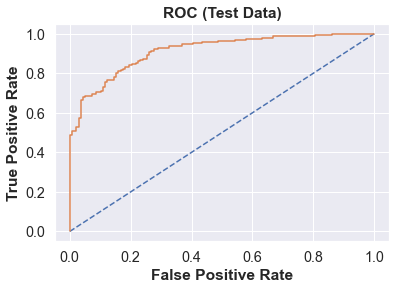

In [91]:
sns.set(font_scale=1.3)
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs,pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC (Test Data)',weight='bold')
sns.set(font_scale=1)

In [29]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
%matplotlib inline

df=pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True,drop=True)
df =pd.get_dummies(df, columns=['gender','vote'],drop_first=True)
df

age  economic.cond.national  economic.cond.household  Blair  Hague  \
0      43                       3                        3      4      1   
1      36                       4                        4      4      4   
2      35                       4                        4      5      2   
3      24                       4                        2      2      1   
4      41                       2                        2      1      1   
...   ...                     ...                      ...    ...    ...   
1512   67                       5                        3      2      4   
1513   73                       2                        2      4      4   
1514   37                       3                        3      5      4   
1515   61                       3                        3      1      4   
1516   74                       2                        3      2      4   

      Europe  political.knowledge  gender_male  vote_Labour  
0          2                    2            0            1  
1          5                    2            1            1  
2          3                    2            1            1  
3          4                    0            0            1  
4          6                    2            1            1  
...      ...                  ...          ...          ...  
1512      11                    3            1            0  
1513       8                    2            1            0  
1514       2                    2            1            1  
1515      11                    2            1            0  
1516      11                    0            0            0  

[1517 rows x 9 columns]

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
df_unscaled = df.copy()
df_unscaled

age  economic.cond.national  economic.cond.household  Blair  Hague  \
0      43                       3                        3      4      1   
1      36                       4                        4      4      4   
2      35                       4                        4      5      2   
3      24                       4                        2      2      1   
4      41                       2                        2      1      1   
...   ...                     ...                      ...    ...    ...   
1512   67                       5                        3      2      4   
1513   73                       2                        2      4      4   
1514   37                       3                        3      5      4   
1515   61                       3                        3      1      4   
1516   74                       2                        3      2      4   

      Europe  political.knowledge  gender_male  vote_Labour  
0          2                    2            0            1  
1          5                    2            1            1  
2          3                    2            1            1  
3          4                    0            0            1  
4          6                    2            1            1  
...      ...                  ...          ...          ...  
1512      11                    3            1            0  
1513       8                    2            1            0  
1514       2                    2            1            1  
1515      11                    2            1            0  
1516      11                    0            0            0  

[1517 rows x 9 columns]

In [32]:
X = df.drop("vote_Labour" , axis=1)
y = df['vote_Labour']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1, stratify=y)

In [34]:
X_train

age  economic.cond.national  economic.cond.household  Blair  Hague  \
532    71                       3                        3      4      2   
706    57                       4                        5      4      1   
1140   24                       3                        4      2      4   
1077   43                       4                        4      2      3   
954    37                       3                        2      4      2   
...   ...                     ...                      ...    ...    ...   
512    80                       2                        2      2      4   
825    27                       3                        3      2      4   
348    56                       4                        2      5      2   
1241   75                       4                        3      4      5   
1137   43                       2                        3      2      3   

      Europe  political.knowledge  gender_male  
532       11                    0            0  
706        3                    2            0  
1140      11                    0            1  
1077       5                    0            1  
954        7                    2            1  
...      ...                  ...          ...  
512        7                    2            1  
825        5                    2            0  
348        1                    2            0  
1241       7                    3            0  
1137      11                    2            0  

[1061 rows x 8 columns]

In [35]:
X_train_scaled = X_train.copy()
col_names = [x for x in X_train.columns]
features = X_train_scaled[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X_train_scaled[col_names] = features
X_train_scaled

age  economic.cond.national  economic.cond.household     Blair  \
532   1.078284               -0.274403                -0.137087  0.557983   
706   0.181786                0.858443                 1.986262  0.557983   
1140 -1.931388               -0.274403                 0.924587 -1.180695   
1077 -0.714712                0.858443                 0.924587 -1.180695   
954  -1.098925               -0.274403                -1.198761  0.557983   
...        ...                     ...                      ...       ...   
512   1.654605               -1.407249                -1.198761 -1.180695   
825  -1.739281               -0.274403                -0.137087 -1.180695   
348   0.117751                0.858443                -1.198761  1.427322   
1241  1.334427                0.858443                -0.137087  0.557983   
1137 -0.714712               -1.407249                -0.137087 -1.180695   

         Hague    Europe  political.knowledge  gender_male  
532  -0.625062  1.316728            -1.417763    -0.917613  
706  -1.441798 -1.148833             0.422294    -0.917613  
1140  1.008412  1.316728            -1.417763     1.089784  
1077  0.191675 -0.532443            -1.417763     1.089784  
954  -0.625062  0.083948             0.422294     1.089784  
...        ...       ...                  ...          ...  
512   1.008412  0.083948             0.422294     1.089784  
825   1.008412 -0.532443             0.422294    -0.917613  
348  -0.625062 -1.765223             0.422294    -0.917613  
1241  1.825149  0.083948             1.342323    -0.917613  
1137  0.191675  1.316728             0.422294    -0.917613  

[1061 rows x 8 columns]

In [36]:
X_test_scaled = X_test.copy()
col_names = [x for x in X_test.columns]
features = X_test_scaled[col_names]
#scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X_test_scaled[col_names] = features
X_test_scaled

age  economic.cond.national  economic.cond.household     Blair  \
273   1.078284               -1.407249                -0.137087  0.557983   
765  -1.483139               -1.407249                -1.198761 -1.180695   
415  -1.226997                0.858443                -0.137087 -1.180695   
1029 -1.291032                0.858443                 0.924587  0.557983   
506  -0.906819               -0.274403                 0.924587  0.557983   
...        ...                     ...                      ...       ...   
653   0.181786                0.858443                 0.924587  0.557983   
504   0.950213               -0.274403                 0.924587 -1.180695   
1423  1.526533               -0.274403                -0.137087  1.427322   
886  -1.226997               -0.274403                 0.924587 -1.180695   
350   1.846711               -1.407249                 0.924587 -1.180695   

         Hague    Europe  political.knowledge  gender_male  
273  -0.625062  1.316728            -1.417763    -0.917613  
765   1.008412 -0.532443             0.422294     1.089784  
415  -1.441798  0.083948             0.422294     1.089784  
1029 -0.625062  0.083948            -1.417763    -0.917613  
506  -0.625062  0.083948             1.342323     1.089784  
...        ...       ...                  ...          ...  
653  -0.625062  1.316728            -1.417763    -0.917613  
504   1.008412  0.700338             0.422294     1.089784  
1423 -0.625062 -1.148833            -1.417763    -0.917613  
886   1.008412  1.316728            -1.417763     1.089784  
350   1.008412  1.008533             0.422294    -0.917613  

[456 rows x 8 columns]

In [37]:
X_train_age_scaled=X_train.copy()
X_train_age_scaled['age'] = X_train_scaled['age']
X_train_age_scaled

age  economic.cond.national  economic.cond.household  Blair  Hague  \
532   1.078284                       3                        3      4      2   
706   0.181786                       4                        5      4      1   
1140 -1.931388                       3                        4      2      4   
1077 -0.714712                       4                        4      2      3   
954  -1.098925                       3                        2      4      2   
...        ...                     ...                      ...    ...    ...   
512   1.654605                       2                        2      2      4   
825  -1.739281                       3                        3      2      4   
348   0.117751                       4                        2      5      2   
1241  1.334427                       4                        3      4      5   
1137 -0.714712                       2                        3      2      3   

      Europe  political.knowledge  gender_male  
532       11                    0            0  
706        3                    2            0  
1140      11                    0            1  
1077       5                    0            1  
954        7                    2            1  
...      ...                  ...          ...  
512        7                    2            1  
825        5                    2            0  
348        1                    2            0  
1241       7                    3            0  
1137      11                    2            0  

[1061 rows x 8 columns]

In [38]:
X_test_age_scaled=X_test.copy()
X_test_age_scaled['age'] = X_test_scaled['age']
X_test_age_scaled

age  economic.cond.national  economic.cond.household  Blair  Hague  \
273   1.078284                       2                        3      4      2   
765  -1.483139                       2                        2      2      4   
415  -1.226997                       4                        3      2      1   
1029 -1.291032                       4                        4      4      2   
506  -0.906819                       3                        4      4      2   
...        ...                     ...                      ...    ...    ...   
653   0.181786                       4                        4      4      2   
504   0.950213                       3                        4      2      4   
1423  1.526533                       3                        3      5      2   
886  -1.226997                       3                        4      2      4   
350   1.846711                       2                        4      2      4   

      Europe  political.knowledge  gender_male  
273       11                    0            0  
765        5                    2            1  
415        7                    2            1  
1029       7                    0            0  
506        7                    3            1  
...      ...                  ...          ...  
653       11                    0            0  
504        9                    2            1  
1423       3                    0            0  
886       11                    0            1  
350       10                    2            0  

[456 rows x 8 columns]

In [39]:
from sklearn.naive_bayes import GaussianNB

In [40]:
clf = GaussianNB()
model = clf.fit(X_train, y_train)

In [41]:
model.score(X_train, y_train)

0.8199811498586239

In [42]:
model.score(X_test, y_test)

0.8574561403508771

In [43]:
pred_train_prob = model.predict_proba(X_train)
pred_test_prob = model.predict_proba(X_test)
pred_train_prob

array([[1.16735307e-01, 8.83264693e-01],
       [8.29335894e-04, 9.99170664e-01],
       [7.16809836e-01, 2.83190164e-01],
       ...,
       [2.05316007e-03, 9.97946840e-01],
       [5.83414021e-01, 4.16585979e-01],
       [9.08632936e-01, 9.13670641e-02]])

In [44]:
pred_train_prob = pred_train_prob[:,1]

In [45]:
from sklearn.metrics import accuracy_score,f1_score,recall_score, precision_score


def GetCustomData(custom_prob):
    custom_cutoff_data=[]

    for i in range(0,len(pred_train_prob)):  #2333
        if pred_train_prob[i] >custom_prob:
            a= 1
        else:
            a=0
        custom_cutoff_data.append(a)
    return custom_cutoff_data

In [46]:
thresh=[]
acc=[]
f1=[]
rec=[]
pre=[]

In [47]:
for j in np.arange(0.1,1,0.1):
    result = GetCustomData(j)
    thresh.append(j)
    acc.append(accuracy_score(y_train,result))
    f1.append(f1_score(y_train,result))
    rec.append(recall_score(y_train,result))
    pre.append(precision_score(y_train,result))


In [48]:
dat = pd.DataFrame({'Threshold': thresh,
             'Accuracy': acc,
             'f1': f1,
             'Recall': rec,
             'Precision':pre})
dat

Threshold  Accuracy        f1    Recall  Precision
0        0.1  0.770971  0.854404  0.964817   0.766667
1        0.2  0.789821  0.861748  0.940460   0.795195
2        0.3  0.800189  0.864277  0.913396   0.820170
3        0.4  0.816211  0.871963  0.898512   0.846939
4        0.5  0.819981  0.870859  0.871448   0.870270
5        0.6  0.816211  0.864865  0.844384   0.886364
6        0.7  0.805844  0.852647  0.806495   0.904401
7        0.8  0.775683  0.822388  0.745602   0.916805
8        0.9  0.721960  0.763432  0.644114   0.937008

In [49]:
dat[dat['f1']==dat['f1'].max()]

Threshold  Accuracy        f1    Recall  Precision
3        0.4  0.816211  0.871963  0.898512   0.846939

In [50]:
dat[dat['Accuracy']==dat['Accuracy'].max()]

Threshold  Accuracy        f1    Recall  Precision
4        0.5  0.819981  0.870859  0.871448    0.87027

In [51]:
custom_prob = 0.4
custom_cutoff_data=[]

for i in range(0,len(pred_train_prob)):  #2333
    if pred_train_prob[i] >custom_prob:
        a= 1
    else:
        a=0
    custom_cutoff_data.append(a)

In [52]:
ytrain_predict = custom_cutoff_data

In [53]:
data_pred_custom_cutoff=[]
for i in range(0,len(pred_test_prob[:,1])):
    if np.array(pred_test_prob[:,1])[i]>custom_prob:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

In [54]:
ytest_predict = data_pred_custom_cutoff

In [55]:
accuracy_score(y_train,ytrain_predict)

0.8162111215834119

In [56]:
accuracy_score(y_test,ytest_predict)

0.8574561403508771

# random forest

In [103]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
%matplotlib inline

df=pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True,drop=True)
df =pd.get_dummies(df, columns=['gender'],drop_first=True)
df

vote  age  economic.cond.national  economic.cond.household  \
0           Labour   43                       3                        3   
1           Labour   36                       4                        4   
2           Labour   35                       4                        4   
3           Labour   24                       4                        2   
4           Labour   41                       2                        2   
...            ...  ...                     ...                      ...   
1512  Conservative   67                       5                        3   
1513  Conservative   73                       2                        2   
1514        Labour   37                       3                        3   
1515  Conservative   61                       3                        3   
1516  Conservative   74                       2                        3   

      Blair  Hague  Europe  political.knowledge  gender_male  
0         4      1       2                    2            0  
1         4      4       5                    2            1  
2         5      2       3                    2            1  
3         2      1       4                    0            0  
4         1      1       6                    2            1  
...     ...    ...     ...                  ...          ...  
1512      2      4      11                    3            1  
1513      4      4       8                    2            1  
1514      5      4       2                    2            1  
1515      1      4      11                    2            1  
1516      2      4      11                    0            0  

[1517 rows x 9 columns]

In [104]:
X = df.drop("vote" , axis=1)
y = df['vote']

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1, stratify=y)

In [106]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)
model=clf.fit(X_train,y_train)

In [107]:
model.score(X_train, y_train)

1.0

In [108]:
model.score(X_test, y_test)

0.8399122807017544

In [109]:
from sklearn.model_selection import GridSearchCV
grid={'n_estimators':[100],   # 50,150,200,300,500
    'criterion':['gini'],   # 'entropy'
    'max_depth':[5],   # 6,7,8,9
    'min_samples_split':[2],  #5,10,20
    'min_samples_leaf':[1],   #3,5,7,10
    'max_features':[2],   # 3,4,5,6
    'bootstrap':[True],  # False
    'oob_score':[False],  # True
    'warm_start':[False],  # True
    'ccp_alpha':[0.0,]   # 0.2,0.4
}
model = RandomForestClassifier(random_state=1)

In [110]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [111]:
grid_search.fit(X_train, y_train)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True], 'ccp_alpha': [0.0],
                         'criterion': ['gini'], 'max_depth': [5],
                         'max_features': [2], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [100],
                         'oob_score': [False], 'warm_start': [False]},
             scoring='f1')

In [112]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 5, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'oob_score': False, 'warm_start': False} 

RandomForestClassifier(max_depth=5, max_features=2, random_state=1)


In [113]:
clf = grid_search.best_estimator_
model=clf.fit(X_train,y_train)

In [114]:
model.score(X_train, y_train)

0.8623939679547596

In [115]:
model.score(X_test, y_test)

0.8662280701754386

In [116]:
from imblearn.over_sampling import SMOTE
print(X_train.shape)
print(X_test.shape)

(1061, 8)
(456, 8)


In [117]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
X_train_res.shape

(1478, 8)

In [118]:
model.fit(X_train_res, y_train_res)
model.score(X_train_res, y_train_res)

0.8572395128552097

In [119]:
model.score(X_test, y_test)

0.8442982456140351

In [120]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3, interaction_only=True)

#poly = PolynomialFeatures()

X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(1061, 93)

In [121]:
model.fit(X_train,y_train)
model.score(X_train, y_train)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.8633364750235627

In [122]:
model.score(X_test, y_test)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.8333333333333334

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1, stratify=y)

In [124]:
clf = grid_search.best_estimator_
model=clf.fit(X_train,y_train)

In [125]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

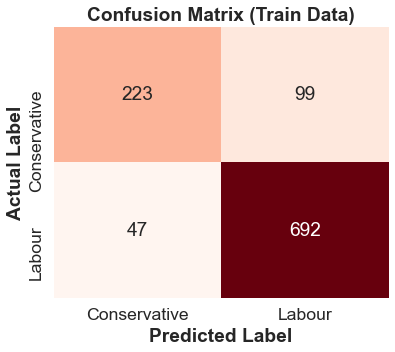

In [126]:
sns.set(font_scale=1.6)
plt.figure(figsize=(6,5))
confusion_matrix(y_train,ytrain_predict,labels=['Conservative','Labour'])
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='Reds',xticklabels=['Conservative','Labour'],yticklabels=['Conservative','Labour'])
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Train Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

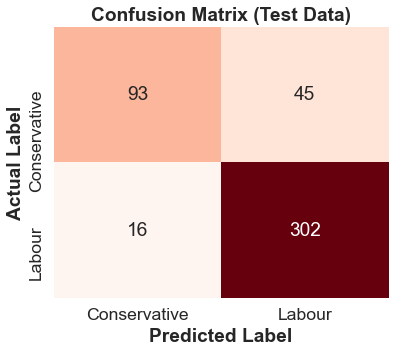

In [127]:
## Confusion matrix on the test data
sns.set(font_scale=1.6)
plt.figure(figsize=(6,5))
confusion_matrix(y_test,ytest_predict)
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True, fmt='d',cbar=False, cmap='Reds',xticklabels=['Conservative','Labour'],yticklabels=['Conservative','Labour'])
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Test Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

In [128]:
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

Conservative       0.83      0.69      0.75       322
      Labour       0.87      0.94      0.90       739

    accuracy                           0.86      1061
   macro avg       0.85      0.81      0.83      1061
weighted avg       0.86      0.86      0.86      1061
 



In [129]:
print(classification_report(y_test, ytest_predict),'\n');

              precision    recall  f1-score   support

Conservative       0.85      0.67      0.75       138
      Labour       0.87      0.95      0.91       318

    accuracy                           0.87       456
   macro avg       0.86      0.81      0.83       456
weighted avg       0.87      0.87      0.86       456
 



AUC: 0.926


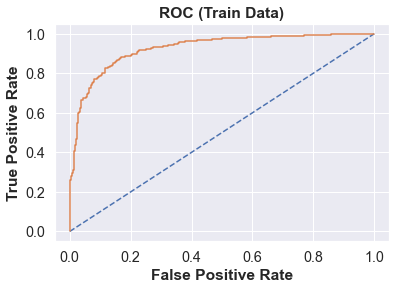

In [130]:
sns.set(font_scale=1.3)
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs,pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC (Train Data)',weight='bold')
sns.set(font_scale=1)

AUC: 0.920


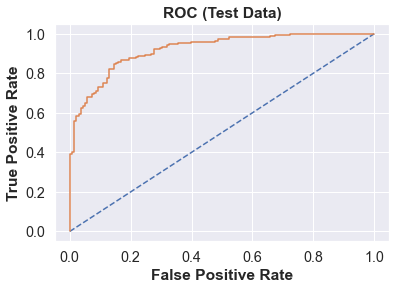

In [131]:
sns.set(font_scale=1.3)
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs,pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC (Test Data)',weight='bold')
sns.set(font_scale=1)

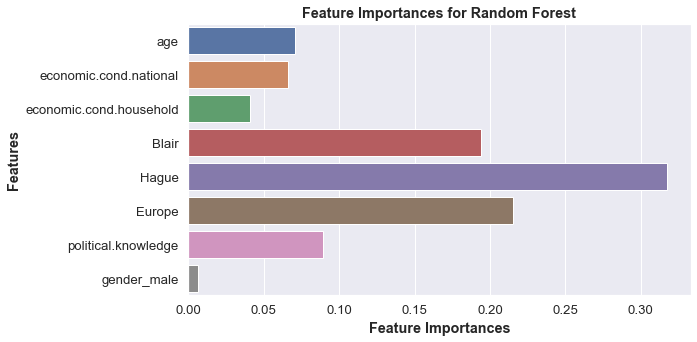

In [132]:
sns.set(font_scale=1.2)
plt.figure(figsize=(9,5))
plt.xlabel('Feature Importances',weight='bold')
plt.ylabel('Features',weight='bold')
plt.title('Feature Importances for Random Forest',weight='bold')
sns.barplot(y=X_train.columns,x=model.feature_importances_,orient='h');
sns.set(font_scale=1)

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
%matplotlib inline

df=pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True,drop=True)
df =pd.get_dummies(df, columns=['gender','vote'],drop_first=True)
df

age  economic.cond.national  economic.cond.household  Blair  Hague  \
0      43                       3                        3      4      1   
1      36                       4                        4      4      4   
2      35                       4                        4      5      2   
3      24                       4                        2      2      1   
4      41                       2                        2      1      1   
...   ...                     ...                      ...    ...    ...   
1512   67                       5                        3      2      4   
1513   73                       2                        2      4      4   
1514   37                       3                        3      5      4   
1515   61                       3                        3      1      4   
1516   74                       2                        3      2      4   

      Europe  political.knowledge  gender_male  vote_Labour  
0          2                    2            0            1  
1          5                    2            1            1  
2          3                    2            1            1  
3          4                    0            0            1  
4          6                    2            1            1  
...      ...                  ...          ...          ...  
1512      11                    3            1            0  
1513       8                    2            1            0  
1514       2                    2            1            1  
1515      11                    2            1            0  
1516      11                    0            0            0  

[1517 rows x 9 columns]

In [2]:
X = df.drop("vote_Labour" , axis=1)
y = df['vote_Labour']

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1, stratify=y)

In [16]:
from sklearn.model_selection import GridSearchCV
grid={'n_estimators':[100],   # 50,150,200,300,500
    'criterion':['gini'],   # 'entropy'
    'max_depth':[5],   # 6,7,8,9
    'min_samples_split':[2],  #5,10,20
    'min_samples_leaf':[1],   #3,5,7,10
    'max_features':[2],   # 3,4,5,6
    'bootstrap':[True],  # False
    'oob_score':[False],  # True
    'warm_start':[False],  # True
    'ccp_alpha':[0.0,]   # 0.2,0.4
}
model = RandomForestClassifier(random_state=1)

In [17]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [18]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True], 'ccp_alpha': [0.0],
                         'criterion': ['gini'], 'max_depth': [5],
                         'max_features': [2], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [100],
                         'oob_score': [False], 'warm_start': [False]},
             scoring='f1')

In [19]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 5, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'oob_score': False, 'warm_start': False} 

RandomForestClassifier(max_depth=5, max_features=2, random_state=1)


In [20]:
clf = grid_search.best_estimator_
model=clf.fit(X_train,y_train)

In [21]:
model.score(X_train, y_train)

0.8623939679547596

In [22]:
model.score(X_test, y_test)

0.8662280701754386

In [23]:
pred_train_prob = model.predict_proba(X_train)
pred_test_prob = model.predict_proba(X_test)
pred_train_prob

array([[0.16655429, 0.83344571],
       [0.03563459, 0.96436541],
       [0.54404966, 0.45595034],
       ...,
       [0.05923191, 0.94076809],
       [0.67162181, 0.32837819],
       [0.59936067, 0.40063933]])

In [24]:
pred_train_prob = pred_train_prob[:,1]

In [25]:
from sklearn.metrics import accuracy_score,f1_score,recall_score, precision_score


def GetCustomData(custom_prob):
    custom_cutoff_data=[]

    for i in range(0,len(pred_train_prob)):  #2333
        if pred_train_prob[i] >custom_prob:
            a= 1
        else:
            a=0
        custom_cutoff_data.append(a)
    return custom_cutoff_data

In [26]:
thresh=[]
acc=[]
f1=[]
rec=[]
pre=[]

In [27]:
for j in np.arange(0.1,1,0.1):
    result = GetCustomData(j)
    thresh.append(j)
    acc.append(accuracy_score(y_train,result))
    f1.append(f1_score(y_train,result))
    rec.append(recall_score(y_train,result))
    pre.append(precision_score(y_train,result))


In [28]:
dat = pd.DataFrame({'Threshold': thresh,
             'Accuracy': acc,
             'f1': f1,
             'Recall': rec,
             'Precision':pre})
dat

Threshold  Accuracy        f1    Recall  Precision
0        0.1  0.696513  0.821111  1.000000   0.696513
1        0.2  0.722903  0.834086  1.000000   0.715392
2        0.3  0.784166  0.864256  0.986468   0.768987
3        0.4  0.819039  0.882784  0.978349   0.804227
4        0.5  0.862394  0.904575  0.936401   0.874842
5        0.6  0.864279  0.900552  0.882273   0.919605
6        0.7  0.835061  0.872912  0.813261   0.942006
7        0.8  0.743638  0.778862  0.648173   0.975560
8        0.9  0.592837  0.591682  0.423545   0.981191

In [29]:
dat[dat['f1']==dat['f1'].max()]

Threshold  Accuracy        f1    Recall  Precision
4        0.5  0.862394  0.904575  0.936401   0.874842

In [30]:
dat[dat['Accuracy']==dat['Accuracy'].max()]

Threshold  Accuracy        f1    Recall  Precision
5        0.6  0.864279  0.900552  0.882273   0.919605

# Ada boost

In [113]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
%matplotlib inline

df=pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True,drop=True)
df =pd.get_dummies(df, columns=['gender'],drop_first=True)
df

vote  age  economic.cond.national  economic.cond.household  \
0           Labour   43                       3                        3   
1           Labour   36                       4                        4   
2           Labour   35                       4                        4   
3           Labour   24                       4                        2   
4           Labour   41                       2                        2   
...            ...  ...                     ...                      ...   
1512  Conservative   67                       5                        3   
1513  Conservative   73                       2                        2   
1514        Labour   37                       3                        3   
1515  Conservative   61                       3                        3   
1516  Conservative   74                       2                        3   

      Blair  Hague  Europe  political.knowledge  gender_male  
0         4      1       2                    2            0  
1         4      4       5                    2            1  
2         5      2       3                    2            1  
3         2      1       4                    0            0  
4         1      1       6                    2            1  
...     ...    ...     ...                  ...          ...  
1512      2      4      11                    3            1  
1513      4      4       8                    2            1  
1514      5      4       2                    2            1  
1515      1      4      11                    2            1  
1516      2      4      11                    0            0  

[1517 rows x 9 columns]

In [114]:
X = df.drop("vote" , axis=1)
y = df['vote']

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1, stratify=y)

In [116]:
from sklearn.ensemble import AdaBoostClassifier
#Build ADA Model
clf = AdaBoostClassifier(random_state=1)
model=clf.fit(X_train,y_train)

In [117]:
model.score(X_train, y_train)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


0.8397737983034873

In [118]:
model.score(X_test, y_test)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


0.8355263157894737

In [119]:
from sklearn.model_selection import GridSearchCV
grid={'n_estimators':[30,40,50,100,150,200],
    'learning_rate':[1.0],     # 0.1,0.01,0.5
    'algorithm':['SAMME.R']}  # 'SAMME'
model = AdaBoostClassifier(random_state=1)

In [120]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [121]:
grid_search.fit(X_train, y_train)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=3, estimator=AdaBoostClassifier(random_state=1), n_jobs=-1,
             param_grid={'algorithm': ['SAMME.R'], 'learning_rate': [1.0],
                         'n_estimators': [30, 40, 50, 100, 150, 200]},
             scoring='f1')

In [122]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 30} 

AdaBoostClassifier(n_estimators=30, random_state=1)


In [123]:
from sklearn.ensemble import AdaBoostClassifier
#Build ADA Model
clf = AdaBoostClassifier(random_state=1,n_estimators=30)
model=clf.fit(X_train,y_train)

In [124]:
model.score(X_train, y_train)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


0.8303487276154571

In [125]:
model.score(X_test, y_test)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


0.8377192982456141

In [126]:
clf = AdaBoostClassifier(random_state=1)
model=clf.fit(X_train,y_train)
from imblearn.over_sampling import SMOTE
print(X_train.shape)
print(X_test.shape)

(1061, 8)
(456, 8)


In [127]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
X_train_res.shape

(1478, 8)

In [128]:
model.fit(X_train_res, y_train_res)
model.score(X_train_res, y_train_res)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


0.8369418132611637

In [129]:
model.score(X_test, y_test)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


0.8399122807017544

In [130]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2, interaction_only=True)

#poly = PolynomialFeatures()

X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(1061, 37)

In [131]:
model.fit(X_train,y_train)
model.score(X_train, y_train)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


0.8548539114043355

In [132]:
model.score(X_test, y_test)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


0.8201754385964912

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1, stratify=y)

In [134]:
clf = AdaBoostClassifier(random_state=1)
model=clf.fit(X_train,y_train)

In [135]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


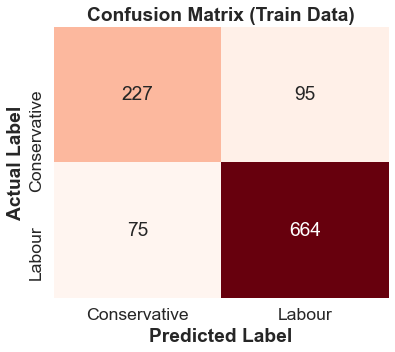

In [136]:
sns.set(font_scale=1.6)
plt.figure(figsize=(6,5))
confusion_matrix(y_train,ytrain_predict,labels=['Conservative','Labour'])
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='Reds',xticklabels=['Conservative','Labour'],yticklabels=['Conservative','Labour'])
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Train Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

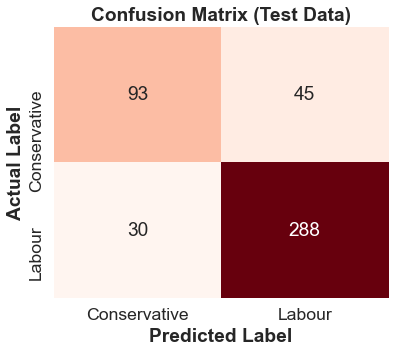

In [137]:
## Confusion matrix on the test data
sns.set(font_scale=1.6)
plt.figure(figsize=(6,5))
confusion_matrix(y_test,ytest_predict)
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True, fmt='d',cbar=False, cmap='Reds',xticklabels=['Conservative','Labour'],yticklabels=['Conservative','Labour'])
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Test Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

In [138]:
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

Conservative       0.75      0.70      0.73       322
      Labour       0.87      0.90      0.89       739

    accuracy                           0.84      1061
   macro avg       0.81      0.80      0.81      1061
weighted avg       0.84      0.84      0.84      1061
 



In [139]:
print(classification_report(y_test, ytest_predict),'\n');

              precision    recall  f1-score   support

Conservative       0.76      0.67      0.71       138
      Labour       0.86      0.91      0.88       318

    accuracy                           0.84       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.83      0.84      0.83       456
 



C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


AUC: 0.900


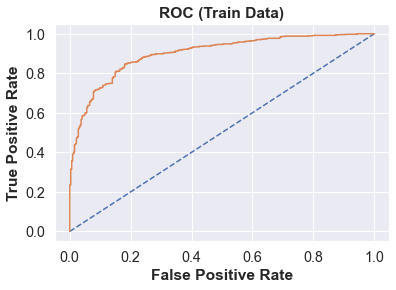

In [140]:
sns.set(font_scale=1.3)
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs,pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC (Train Data)',weight='bold')
sns.set(font_scale=1)

AUC: 0.910


C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


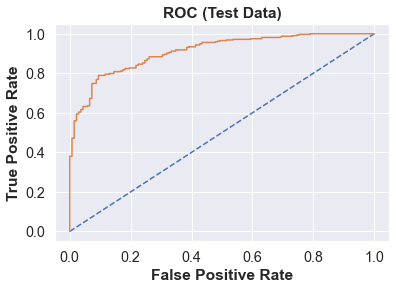

In [141]:
sns.set(font_scale=1.3)
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs,pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC (Test Data)',weight='bold')
sns.set(font_scale=1)

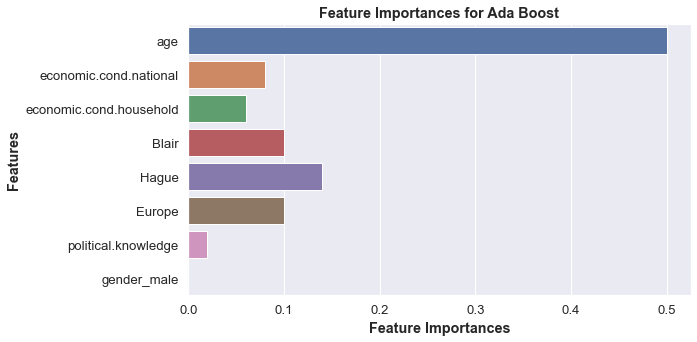

In [142]:
sns.set(font_scale=1.2)
plt.figure(figsize=(9,5))
plt.xlabel('Feature Importances',weight='bold')
plt.ylabel('Features',weight='bold')
plt.title('Feature Importances for Ada Boost',weight='bold')
sns.barplot(y=X_train.columns,x=model.feature_importances_,orient='h');
sns.set(font_scale=1)

In [22]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
%matplotlib inline

df=pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True,drop=True)
df =pd.get_dummies(df, columns=['gender','vote'],drop_first=True)
df

age  economic.cond.national  economic.cond.household  Blair  Hague  \
0      43                       3                        3      4      1   
1      36                       4                        4      4      4   
2      35                       4                        4      5      2   
3      24                       4                        2      2      1   
4      41                       2                        2      1      1   
...   ...                     ...                      ...    ...    ...   
1512   67                       5                        3      2      4   
1513   73                       2                        2      4      4   
1514   37                       3                        3      5      4   
1515   61                       3                        3      1      4   
1516   74                       2                        3      2      4   

      Europe  political.knowledge  gender_male  vote_Labour  
0          2                    2            0            1  
1          5                    2            1            1  
2          3                    2            1            1  
3          4                    0            0            1  
4          6                    2            1            1  
...      ...                  ...          ...          ...  
1512      11                    3            1            0  
1513       8                    2            1            0  
1514       2                    2            1            1  
1515      11                    2            1            0  
1516      11                    0            0            0  

[1517 rows x 9 columns]

In [24]:
X = df.drop("vote_Labour" , axis=1)
y = df['vote_Labour']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1, stratify=y)

In [26]:
X_train

age  economic.cond.national  economic.cond.household  Blair  Hague  \
532    71                       3                        3      4      2   
706    57                       4                        5      4      1   
1140   24                       3                        4      2      4   
1077   43                       4                        4      2      3   
954    37                       3                        2      4      2   
...   ...                     ...                      ...    ...    ...   
512    80                       2                        2      2      4   
825    27                       3                        3      2      4   
348    56                       4                        2      5      2   
1241   75                       4                        3      4      5   
1137   43                       2                        3      2      3   

      Europe  political.knowledge  gender_male  
532       11                    0            0  
706        3                    2            0  
1140      11                    0            1  
1077       5                    0            1  
954        7                    2            1  
...      ...                  ...          ...  
512        7                    2            1  
825        5                    2            0  
348        1                    2            0  
1241       7                    3            0  
1137      11                    2            0  

[1061 rows x 8 columns]

In [27]:
from sklearn.ensemble import AdaBoostClassifier
#Build ADA Model
clf = AdaBoostClassifier(random_state=1)
model=clf.fit(X_train,y_train)

In [28]:
model.score(X_train, y_train)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


0.8397737983034873

In [29]:
model.score(X_test, y_test)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


0.8355263157894737

In [30]:
pred_train_prob = model.predict_proba(X_train)
pred_test_prob = model.predict_proba(X_test)
pred_train_prob

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


array([[0.48997962, 0.51002038],
       [0.4783442 , 0.5216558 ],
       [0.51155709, 0.48844291],
       ...,
       [0.46075784, 0.53924216],
       [0.50627138, 0.49372862],
       [0.50168899, 0.49831101]])

In [31]:
pred_train_prob = pred_train_prob[:,1]

In [32]:
from sklearn.metrics import accuracy_score,f1_score,recall_score, precision_score


def GetCustomData(custom_prob):
    custom_cutoff_data=[]

    for i in range(0,len(pred_train_prob)):  #2333
        if pred_train_prob[i] >custom_prob:
            a= 1
        else:
            a=0
        custom_cutoff_data.append(a)
    return custom_cutoff_data

In [33]:
thresh=[]
acc=[]
f1=[]
rec=[]
pre=[]

In [34]:
for j in np.arange(0.1,1,0.1):
    result = GetCustomData(j)
    thresh.append(j)
    acc.append(accuracy_score(y_train,result))
    f1.append(f1_score(y_train,result))
    rec.append(recall_score(y_train,result))
    pre.append(precision_score(y_train,result))


C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is i

In [35]:
dat = pd.DataFrame({'Threshold': thresh,
             'Accuracy': acc,
             'f1': f1,
             'Recall': rec,
             'Precision':pre})
dat

Threshold  Accuracy        f1    Recall  Precision
0        0.1  0.696513  0.821111  1.000000   0.696513
1        0.2  0.696513  0.821111  1.000000   0.696513
2        0.3  0.696513  0.821111  1.000000   0.696513
3        0.4  0.698398  0.822024  1.000000   0.697828
4        0.5  0.839774  0.886515  0.898512   0.874835
5        0.6  0.303487  0.000000  0.000000   0.000000
6        0.7  0.303487  0.000000  0.000000   0.000000
7        0.8  0.303487  0.000000  0.000000   0.000000
8        0.9  0.303487  0.000000  0.000000   0.000000

In [36]:
dat[dat['f1']==dat['f1'].max()]

Threshold  Accuracy        f1    Recall  Precision
4        0.5  0.839774  0.886515  0.898512   0.874835

In [37]:
dat[dat['Accuracy']==dat['Accuracy'].max()]

Threshold  Accuracy        f1    Recall  Precision
4        0.5  0.839774  0.886515  0.898512   0.874835

# gradient boost

In [88]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
%matplotlib inline

df=pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True,drop=True)
df =pd.get_dummies(df, columns=['gender'],drop_first=True)
df

vote  age  economic.cond.national  economic.cond.household  \
0           Labour   43                       3                        3   
1           Labour   36                       4                        4   
2           Labour   35                       4                        4   
3           Labour   24                       4                        2   
4           Labour   41                       2                        2   
...            ...  ...                     ...                      ...   
1512  Conservative   67                       5                        3   
1513  Conservative   73                       2                        2   
1514        Labour   37                       3                        3   
1515  Conservative   61                       3                        3   
1516  Conservative   74                       2                        3   

      Blair  Hague  Europe  political.knowledge  gender_male  
0         4      1       2                    2            0  
1         4      4       5                    2            1  
2         5      2       3                    2            1  
3         2      1       4                    0            0  
4         1      1       6                    2            1  
...     ...    ...     ...                  ...          ...  
1512      2      4      11                    3            1  
1513      4      4       8                    2            1  
1514      5      4       2                    2            1  
1515      1      4      11                    2            1  
1516      2      4      11                    0            0  

[1517 rows x 9 columns]

In [89]:
X = df.drop("vote" , axis=1)
y = df['vote']

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1, stratify=y)

In [91]:
from sklearn.ensemble import GradientBoostingClassifier
#Build Model
clf = GradientBoostingClassifier(random_state=1)
model=clf.fit(X_train,y_train)

In [92]:
model.score(X_train, y_train)

0.885956644674835

In [93]:
model.score(X_test, y_test)

0.8421052631578947

In [94]:
from sklearn.model_selection import GridSearchCV
grid={'n_estimators':[30],   # 40,50,100,150,200
    'learning_rate':[1.0],     # 0.1,0.01,0.5
    'loss':['deviance'],     # 'exponential'
    'subsample':[1.0],     # 0.1,0.01,0.5
    'criterion':['friedman_mse'],   #  'squared_error', 'mse', 'mae'
    'min_samples_split':[2],     # 4,6,10
    'min_samples_leaf':[1],     # 3,5
    'min_weight_fraction_leaf':[0.0],     # 0.2,0.5
    'max_depth':[3],     # 4,6,10
    'validation_fraction':[0.1],     # 0.2,0.3
    'tol':[0.01],     # 0.001,0.0001
    'ccp_alpha':[0.0]}  # 0.2,0.4
model = GradientBoostingClassifier(random_state=1)

In [95]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [96]:
grid_search.fit(X_train, y_train)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=-1,
             param_grid={'ccp_alpha': [0.0], 'criterion': ['friedman_mse'],
                         'learning_rate': [1.0], 'loss': ['deviance'],
                         'max_depth': [3], 'min_samples_leaf': [1],
                         'min_samples_split': [2],
                         'min_weight_fraction_leaf': [0.0],
                         'n_estimators': [30], 'subsample': [1.0],
                         'tol': [0.01], 'validation_fraction': [0.1]},
             scoring='f1')

In [97]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'learning_rate': 1.0, 'loss': 'deviance', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 30, 'subsample': 1.0, 'tol': 0.01, 'validation_fraction': 0.1} 

GradientBoostingClassifier(learning_rate=1.0, n_estimators=30, random_state=1,
                           tol=0.01)


In [98]:
clf = GradientBoostingClassifier(tol=0.01)
model=clf.fit(X_train,y_train)

In [99]:
model.score(X_train, y_train)

0.885956644674835

In [100]:
model.score(X_test, y_test)

0.8421052631578947

In [101]:
from imblearn.over_sampling import SMOTE
print(X_train.shape)
print(X_test.shape)

(1061, 8)
(456, 8)


In [102]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
X_train_res.shape

(1478, 8)

In [103]:
clf = GradientBoostingClassifier(random_state=1)
model.fit(X_train_res, y_train_res)
model.score(X_train_res, y_train_res)

0.8836265223274695

In [104]:
model.score(X_test, y_test)

0.8179824561403509

In [105]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2, interaction_only=True)

#poly = PolynomialFeatures()

X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(1061, 37)

In [106]:
model.fit(X_train,y_train)
model.score(X_train, y_train)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


0.9189443920829407

In [107]:
model.score(X_test, y_test)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


0.831140350877193

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1, stratify=y)

In [109]:
clf = GradientBoostingClassifier(random_state=1)
model=clf.fit(X_train,y_train)

In [110]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

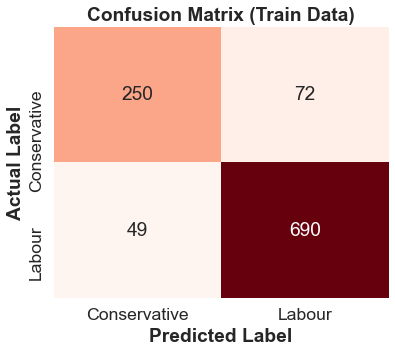

In [111]:
sns.set(font_scale=1.6)
plt.figure(figsize=(6,5))
confusion_matrix(y_train,ytrain_predict,labels=['Conservative','Labour'])
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='Reds',xticklabels=['Conservative','Labour'],yticklabels=['Conservative','Labour'])
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Train Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

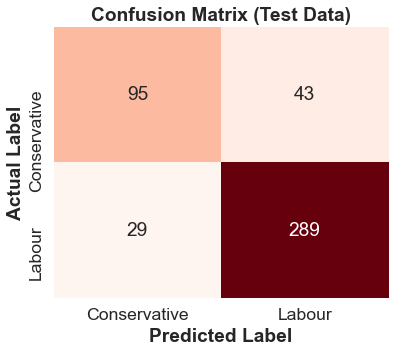

In [112]:
## Confusion matrix on the test data
sns.set(font_scale=1.6)
plt.figure(figsize=(6,5))
confusion_matrix(y_test,ytest_predict)
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True, fmt='d',cbar=False, cmap='Reds',xticklabels=['Conservative','Labour'],yticklabels=['Conservative','Labour'])
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Test Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

In [113]:
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

Conservative       0.84      0.78      0.81       322
      Labour       0.91      0.93      0.92       739

    accuracy                           0.89      1061
   macro avg       0.87      0.86      0.86      1061
weighted avg       0.88      0.89      0.88      1061
 



In [114]:
print(classification_report(y_test, ytest_predict),'\n');

              precision    recall  f1-score   support

Conservative       0.77      0.69      0.73       138
      Labour       0.87      0.91      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.84      0.84      0.84       456
 



AUC: 0.947


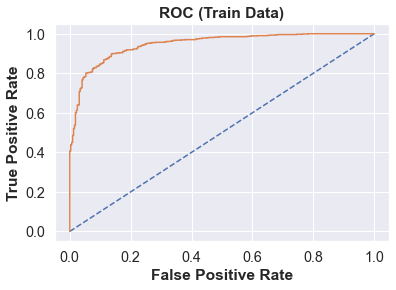

In [115]:
sns.set(font_scale=1.3)
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs,pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC (Train Data)',weight='bold')
sns.set(font_scale=1)

AUC: 0.904


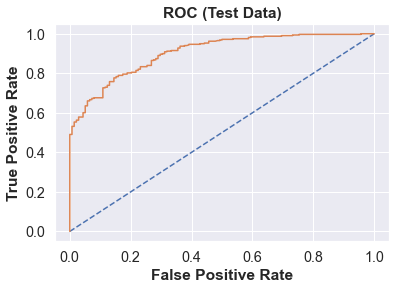

In [116]:
sns.set(font_scale=1.3)
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs,pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC (Test Data)',weight='bold')
sns.set(font_scale=1)

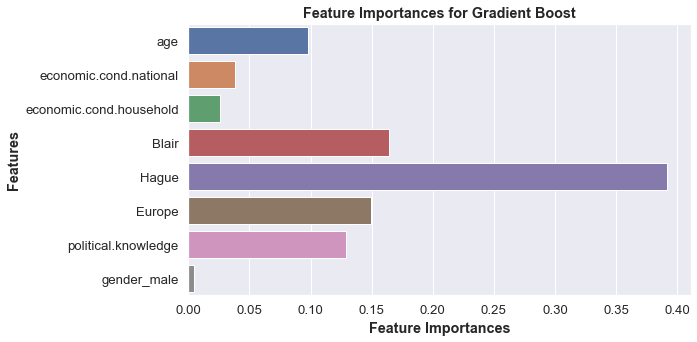

In [117]:
sns.set(font_scale=1.2)
plt.figure(figsize=(9,5))
plt.xlabel('Feature Importances',weight='bold')
plt.ylabel('Features',weight='bold')
plt.title('Feature Importances for Gradient Boost',weight='bold')
sns.barplot(y=X_train.columns,x=model.feature_importances_,orient='h');
sns.set(font_scale=1)

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
%matplotlib inline

df=pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True,drop=True)
df =pd.get_dummies(df, columns=['gender','vote'],drop_first=True)
df

age  economic.cond.national  economic.cond.household  Blair  Hague  \
0      43                       3                        3      4      1   
1      36                       4                        4      4      4   
2      35                       4                        4      5      2   
3      24                       4                        2      2      1   
4      41                       2                        2      1      1   
...   ...                     ...                      ...    ...    ...   
1512   67                       5                        3      2      4   
1513   73                       2                        2      4      4   
1514   37                       3                        3      5      4   
1515   61                       3                        3      1      4   
1516   74                       2                        3      2      4   

      Europe  political.knowledge  gender_male  vote_Labour  
0          2                    2            0            1  
1          5                    2            1            1  
2          3                    2            1            1  
3          4                    0            0            1  
4          6                    2            1            1  
...      ...                  ...          ...          ...  
1512      11                    3            1            0  
1513       8                    2            1            0  
1514       2                    2            1            1  
1515      11                    2            1            0  
1516      11                    0            0            0  

[1517 rows x 9 columns]

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
df_unscaled = df.copy()
df_unscaled

age  economic.cond.national  economic.cond.household  Blair  Hague  \
0      43                       3                        3      4      1   
1      36                       4                        4      4      4   
2      35                       4                        4      5      2   
3      24                       4                        2      2      1   
4      41                       2                        2      1      1   
...   ...                     ...                      ...    ...    ...   
1512   67                       5                        3      2      4   
1513   73                       2                        2      4      4   
1514   37                       3                        3      5      4   
1515   61                       3                        3      1      4   
1516   74                       2                        3      2      4   

      Europe  political.knowledge  gender_male  vote_Labour  
0          2                    2            0            1  
1          5                    2            1            1  
2          3                    2            1            1  
3          4                    0            0            1  
4          6                    2            1            1  
...      ...                  ...          ...          ...  
1512      11                    3            1            0  
1513       8                    2            1            0  
1514       2                    2            1            1  
1515      11                    2            1            0  
1516      11                    0            0            0  

[1517 rows x 9 columns]

In [4]:
X = df.drop("vote_Labour" , axis=1)
y = df['vote_Labour']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1, stratify=y)

In [6]:
X_train

age  economic.cond.national  economic.cond.household  Blair  Hague  \
532    71                       3                        3      4      2   
706    57                       4                        5      4      1   
1140   24                       3                        4      2      4   
1077   43                       4                        4      2      3   
954    37                       3                        2      4      2   
...   ...                     ...                      ...    ...    ...   
512    80                       2                        2      2      4   
825    27                       3                        3      2      4   
348    56                       4                        2      5      2   
1241   75                       4                        3      4      5   
1137   43                       2                        3      2      3   

      Europe  political.knowledge  gender_male  
532       11                    0            0  
706        3                    2            0  
1140      11                    0            1  
1077       5                    0            1  
954        7                    2            1  
...      ...                  ...          ...  
512        7                    2            1  
825        5                    2            0  
348        1                    2            0  
1241       7                    3            0  
1137      11                    2            0  

[1061 rows x 8 columns]

In [7]:
X_train_scaled = X_train.copy()
col_names = [x for x in X_train.columns]
features = X_train_scaled[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X_train_scaled[col_names] = features
X_train_scaled

age  economic.cond.national  economic.cond.household     Blair  \
532   1.078284               -0.274403                -0.137087  0.557983   
706   0.181786                0.858443                 1.986262  0.557983   
1140 -1.931388               -0.274403                 0.924587 -1.180695   
1077 -0.714712                0.858443                 0.924587 -1.180695   
954  -1.098925               -0.274403                -1.198761  0.557983   
...        ...                     ...                      ...       ...   
512   1.654605               -1.407249                -1.198761 -1.180695   
825  -1.739281               -0.274403                -0.137087 -1.180695   
348   0.117751                0.858443                -1.198761  1.427322   
1241  1.334427                0.858443                -0.137087  0.557983   
1137 -0.714712               -1.407249                -0.137087 -1.180695   

         Hague    Europe  political.knowledge  gender_male  
532  -0.625062  1.316728            -1.417763    -0.917613  
706  -1.441798 -1.148833             0.422294    -0.917613  
1140  1.008412  1.316728            -1.417763     1.089784  
1077  0.191675 -0.532443            -1.417763     1.089784  
954  -0.625062  0.083948             0.422294     1.089784  
...        ...       ...                  ...          ...  
512   1.008412  0.083948             0.422294     1.089784  
825   1.008412 -0.532443             0.422294    -0.917613  
348  -0.625062 -1.765223             0.422294    -0.917613  
1241  1.825149  0.083948             1.342323    -0.917613  
1137  0.191675  1.316728             0.422294    -0.917613  

[1061 rows x 8 columns]

In [8]:
X_test_scaled = X_test.copy()
col_names = [x for x in X_test.columns]
features = X_test_scaled[col_names]
#scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X_test_scaled[col_names] = features
X_test_scaled

age  economic.cond.national  economic.cond.household     Blair  \
273   1.078284               -1.407249                -0.137087  0.557983   
765  -1.483139               -1.407249                -1.198761 -1.180695   
415  -1.226997                0.858443                -0.137087 -1.180695   
1029 -1.291032                0.858443                 0.924587  0.557983   
506  -0.906819               -0.274403                 0.924587  0.557983   
...        ...                     ...                      ...       ...   
653   0.181786                0.858443                 0.924587  0.557983   
504   0.950213               -0.274403                 0.924587 -1.180695   
1423  1.526533               -0.274403                -0.137087  1.427322   
886  -1.226997               -0.274403                 0.924587 -1.180695   
350   1.846711               -1.407249                 0.924587 -1.180695   

         Hague    Europe  political.knowledge  gender_male  
273  -0.625062  1.316728            -1.417763    -0.917613  
765   1.008412 -0.532443             0.422294     1.089784  
415  -1.441798  0.083948             0.422294     1.089784  
1029 -0.625062  0.083948            -1.417763    -0.917613  
506  -0.625062  0.083948             1.342323     1.089784  
...        ...       ...                  ...          ...  
653  -0.625062  1.316728            -1.417763    -0.917613  
504   1.008412  0.700338             0.422294     1.089784  
1423 -0.625062 -1.148833            -1.417763    -0.917613  
886   1.008412  1.316728            -1.417763     1.089784  
350   1.008412  1.008533             0.422294    -0.917613  

[456 rows x 8 columns]

In [9]:
X_train_age_scaled=X_train.copy()
X_train_age_scaled['age'] = X_train_scaled['age']
X_train_age_scaled

age  economic.cond.national  economic.cond.household  Blair  Hague  \
532   1.078284                       3                        3      4      2   
706   0.181786                       4                        5      4      1   
1140 -1.931388                       3                        4      2      4   
1077 -0.714712                       4                        4      2      3   
954  -1.098925                       3                        2      4      2   
...        ...                     ...                      ...    ...    ...   
512   1.654605                       2                        2      2      4   
825  -1.739281                       3                        3      2      4   
348   0.117751                       4                        2      5      2   
1241  1.334427                       4                        3      4      5   
1137 -0.714712                       2                        3      2      3   

      Europe  political.knowledge  gender_male  
532       11                    0            0  
706        3                    2            0  
1140      11                    0            1  
1077       5                    0            1  
954        7                    2            1  
...      ...                  ...          ...  
512        7                    2            1  
825        5                    2            0  
348        1                    2            0  
1241       7                    3            0  
1137      11                    2            0  

[1061 rows x 8 columns]

In [10]:
X_test_age_scaled=X_test.copy()
X_test_age_scaled['age'] = X_test_scaled['age']
X_test_age_scaled

age  economic.cond.national  economic.cond.household  Blair  Hague  \
273   1.078284                       2                        3      4      2   
765  -1.483139                       2                        2      2      4   
415  -1.226997                       4                        3      2      1   
1029 -1.291032                       4                        4      4      2   
506  -0.906819                       3                        4      4      2   
...        ...                     ...                      ...    ...    ...   
653   0.181786                       4                        4      4      2   
504   0.950213                       3                        4      2      4   
1423  1.526533                       3                        3      5      2   
886  -1.226997                       3                        4      2      4   
350   1.846711                       2                        4      2      4   

      Europe  political.knowledge  gender_male  
273       11                    0            0  
765        5                    2            1  
415        7                    2            1  
1029       7                    0            0  
506        7                    3            1  
...      ...                  ...          ...  
653       11                    0            0  
504        9                    2            1  
1423       3                    0            0  
886       11                    0            1  
350       10                    2            0  

[456 rows x 8 columns]

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
#Build LDA Model
clf = GradientBoostingClassifier(random_state=1)
model=clf.fit(X_train,y_train)

In [12]:
model.score(X_train, y_train)

0.885956644674835

In [13]:
model.score(X_test, y_test)

0.8421052631578947

In [14]:
pred_train_prob = model.predict_proba(X_train)
pred_test_prob = model.predict_proba(X_test)
pred_train_prob

array([[0.10367437, 0.89632563],
       [0.01234101, 0.98765899],
       [0.89662069, 0.10337931],
       ...,
       [0.00554239, 0.99445761],
       [0.94568048, 0.05431952],
       [0.73258926, 0.26741074]])

In [15]:
pred_train_prob = pred_train_prob[:,1]

In [16]:
from sklearn.metrics import accuracy_score,f1_score,recall_score, precision_score


def GetCustomData(custom_prob):
    custom_cutoff_data=[]

    for i in range(0,len(pred_train_prob)):  #2333
        if pred_train_prob[i] >custom_prob:
            a= 1
        else:
            a=0
        custom_cutoff_data.append(a)
    return custom_cutoff_data

In [17]:
thresh=[]
acc=[]
f1=[]
rec=[]
pre=[]

In [18]:
for j in np.arange(0.1,1,0.1):
    result = GetCustomData(j)
    thresh.append(j)
    acc.append(accuracy_score(y_train,result))
    f1.append(f1_score(y_train,result))
    rec.append(recall_score(y_train,result))
    pre.append(precision_score(y_train,result))


In [19]:
dat = pd.DataFrame({'Threshold': thresh,
             'Accuracy': acc,
             'f1': f1,
             'Recall': rec,
             'Precision':pre})
dat

Threshold  Accuracy        f1    Recall  Precision
0        0.1  0.748351  0.846991  1.000000   0.734592
1        0.2  0.814326  0.880823  0.985115   0.796499
2        0.3  0.852026  0.901936  0.976996   0.837587
3        0.4  0.875589  0.914729  0.958051   0.875155
4        0.5  0.885957  0.919387  0.933694   0.905512
5        0.6  0.887842  0.917874  0.899865   0.936620
6        0.7  0.870877  0.903043  0.863329   0.946588
7        0.8  0.831291  0.865312  0.778078   0.974576
8        0.9  0.721018  0.752508  0.608931   0.984683

In [20]:
dat[dat['f1']==dat['f1'].max()]

Threshold  Accuracy        f1    Recall  Precision
4        0.5  0.885957  0.919387  0.933694   0.905512

In [21]:
dat[dat['Accuracy']==dat['Accuracy'].max()]

Threshold  Accuracy        f1    Recall  Precision
5        0.6  0.887842  0.917874  0.899865    0.93662

# bagging

In [236]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
%matplotlib inline

df=pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True,drop=True)
df =pd.get_dummies(df, columns=['gender'],drop_first=True)
df

vote  age  economic.cond.national  economic.cond.household  \
0           Labour   43                       3                        3   
1           Labour   36                       4                        4   
2           Labour   35                       4                        4   
3           Labour   24                       4                        2   
4           Labour   41                       2                        2   
...            ...  ...                     ...                      ...   
1512  Conservative   67                       5                        3   
1513  Conservative   73                       2                        2   
1514        Labour   37                       3                        3   
1515  Conservative   61                       3                        3   
1516  Conservative   74                       2                        3   

      Blair  Hague  Europe  political.knowledge  gender_male  
0         4      1       2                    2            0  
1         4      4       5                    2            1  
2         5      2       3                    2            1  
3         2      1       4                    0            0  
4         1      1       6                    2            1  
...     ...    ...     ...                  ...          ...  
1512      2      4      11                    3            1  
1513      4      4       8                    2            1  
1514      5      4       2                    2            1  
1515      1      4      11                    2            1  
1516      2      4      11                    0            0  

[1517 rows x 9 columns]

In [237]:
X = df.drop("vote" , axis=1)
y = df['vote']

In [238]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1, stratify=y)

In [239]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=1)
model=clf.fit(X_train,y_train)

In [240]:
model.score(X_train, y_train)

1.0

In [241]:
model.score(X_test, y_test)

0.7785087719298246

In [242]:
from sklearn.model_selection import GridSearchCV
grid={ 'criterion':['gini'],  # 'entropy'
    'splitter':['random'],   # 'best'
    'max_depth':[7],   # 4,5,6,8,9,10
    'min_samples_split':[2],   # 3,4,5,10
    'min_samples_leaf':[7],   # 4,5,6,8,9,10,11,12,13
    'max_features':[6]  # 5,7,8
    }   
model = DecisionTreeClassifier(random_state=1)

In [243]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [244]:
grid_search.fit(X_train, y_train)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [7],
                         'max_features': [6], 'min_samples_leaf': [7],
                         'min_samples_split': [2], 'splitter': ['random']},
             scoring='f1')

In [245]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'criterion': 'gini', 'max_depth': 7, 'max_features': 6, 'min_samples_leaf': 7, 'min_samples_split': 2, 'splitter': 'random'} 

DecisionTreeClassifier(max_depth=7, max_features=6, min_samples_leaf=7,
                       random_state=1, splitter='random')


In [246]:
clf = grid_search.best_estimator_
model=clf.fit(X_train,y_train)

In [247]:
model.score(X_train, y_train)

0.8407163053722903

In [248]:
model.score(X_test, y_test)

0.8377192982456141

In [249]:
cart1 = DecisionTreeClassifier(random_state=1)
cart2 = grid_search.best_estimator_

In [250]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=cart1,random_state=1)
model=clf.fit(X_train,y_train)

In [251]:
model.score(X_train, y_train)

0.9839773798303487

In [252]:
model.score(X_test, y_test)

0.8421052631578947

In [253]:
clf = BaggingClassifier(base_estimator=cart2,random_state=1)
model=clf.fit(X_train,y_train)

In [254]:
model.score(X_train, y_train)

0.8548539114043355

In [255]:
model.score(X_test, y_test)

0.8618421052631579

In [256]:
grid={ 'n_estimators':[200],   # 10,20,50,5,6,7,8,9,30,100,400,500,250,300,350,100,150
    'max_samples':[0.3],    # 1.0,0.7,0.5
    'max_features':[1.0],   # 0.5,0.7,0.3
    'bootstrap':[True],   # False
    'bootstrap_features':[False],   # True
    'oob_score':[False],   # True
    'warm_start':[False],   # True
    'n_jobs':[-1],
    'verbose':[0]}   # 1
model = BaggingClassifier(base_estimator=cart1,random_state=1)

In [257]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='accuracy')

In [258]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                                         random_state=1),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'bootstrap_features': [False],
                         'max_features': [1.0], 'max_samples': [0.3],
                         'n_estimators': [200], 'n_jobs': [-1],
                         'oob_score': [False], 'verbose': [0],
                         'warm_start': [False]},
             scoring='accuracy')

In [259]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 0.3, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': False, 'verbose': 0, 'warm_start': False} 

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                  max_samples=0.3, n_estimators=200, n_jobs=-1, random_state=1)


In [260]:
clf = grid_search.best_estimator_
model=clf.fit(X_train,y_train)

In [261]:
model.score(X_train, y_train)

0.9123468426013195

In [262]:
model.score(X_test, y_test)

0.8486842105263158

In [263]:
grid={ 'n_estimators':[200],   # 10,20,50,5,6,7,8,9,30,100,400,500,250,300,350,100,150
    'max_samples':[0.8],    # 1.0,0.7,0.5
    'max_features':[1.0],   # 0.5,0.7,0.3
    'bootstrap':[True],   # False
    'bootstrap_features':[False],   # True
    'oob_score':[False],   # True
    'warm_start':[False],   # True
    'n_jobs':[-1],
    'verbose':[0]}   # 1
model = BaggingClassifier(base_estimator=cart2,random_state=1)

In [264]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='accuracy')

In [265]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=7,
                                                                               max_features=6,
                                                                               min_samples_leaf=7,
                                                                               random_state=1,
                                                                               splitter='random'),
                                         random_state=1),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'bootstrap_features': [False],
                         'max_features': [1.0], 'max_samples': [0.8],
                         'n_estimators': [200], 'n_jobs': [-1],
                         'oob_score': [False], 'verbose': [0],
                         'warm_start': [False]},
             scoring='accuracy')

In [266]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 0.8, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': False, 'verbose': 0, 'warm_start': False} 

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=7,
                                                        max_features=6,
                                                        min_samples_leaf=7,
                                                        random_state=1,
                                                        splitter='random'),
                  max_samples=0.8, n_estimators=200, n_jobs=-1, random_state=1)


In [267]:
clf = grid_search.best_estimator_
model=clf.fit(X_train,y_train)

In [268]:
model.score(X_train, y_train)

0.8548539114043355

In [269]:
model.score(X_test, y_test)

0.8574561403508771

In [270]:
from imblearn.over_sampling import SMOTE
print(X_train.shape)
print(X_test.shape)

(1061, 8)
(456, 8)


In [271]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
X_train_res.shape

(1478, 8)

In [272]:
model.fit(X_train_res, y_train_res)
model.score(X_train_res, y_train_res)

0.8525033829499323

In [273]:
model.score(X_test, y_test)

0.8399122807017544

In [274]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3, interaction_only=True)

#poly = PolynomialFeatures()

X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(1061, 93)

In [275]:
model.fit(X_train,y_train)
model.score(X_train, y_train)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


0.8482563619227145

In [276]:
model.score(X_test, y_test)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


0.8267543859649122

In [277]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1, stratify=y)

In [278]:
clf = grid_search.best_estimator_
model=clf.fit(X_train,y_train)

In [279]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

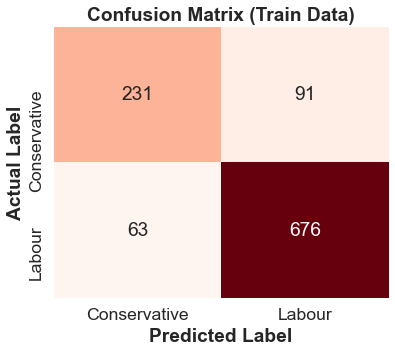

In [280]:
sns.set(font_scale=1.6)
plt.figure(figsize=(6,5))
confusion_matrix(y_train,ytrain_predict,labels=['Conservative','Labour'])
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='Reds',xticklabels=['Conservative','Labour'],yticklabels=['Conservative','Labour'])
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Train Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

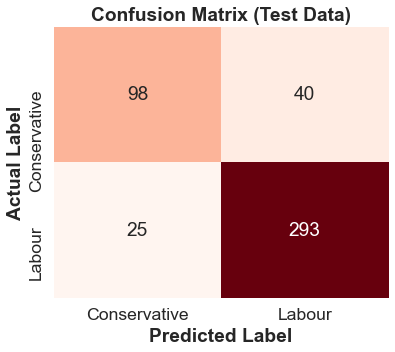

In [281]:
## Confusion matrix on the test data
sns.set(font_scale=1.6)
plt.figure(figsize=(6,5))
confusion_matrix(y_test,ytest_predict)
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True, fmt='d',cbar=False, cmap='Reds',xticklabels=['Conservative','Labour'],yticklabels=['Conservative','Labour'])
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Test Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

In [282]:
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

Conservative       0.79      0.72      0.75       322
      Labour       0.88      0.91      0.90       739

    accuracy                           0.85      1061
   macro avg       0.83      0.82      0.82      1061
weighted avg       0.85      0.85      0.85      1061
 



In [283]:
print(classification_report(y_test, ytest_predict),'\n');

              precision    recall  f1-score   support

Conservative       0.80      0.71      0.75       138
      Labour       0.88      0.92      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.82      0.83       456
weighted avg       0.85      0.86      0.86       456
 



AUC: 0.920


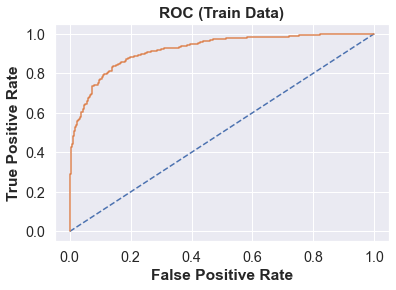

In [284]:
sns.set(font_scale=1.3)
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs,pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC (Train Data)',weight='bold')
sns.set(font_scale=1)

AUC: 0.914


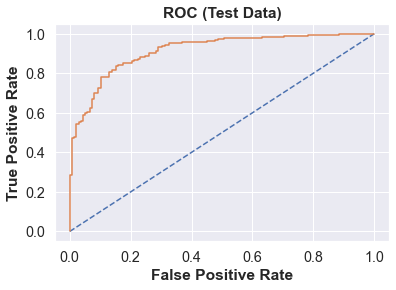

In [287]:
sns.set(font_scale=1.3)
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs,pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC (Test Data)',weight='bold')
sns.set(font_scale=1)

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1, stratify=y)

In [289]:
from sklearn.ensemble import RandomForestClassifier
grid={'n_estimators':[100],   # 50,150,200,300,500
    'criterion':['gini'],   # 'entropy'
    'max_depth':[5],   # 6,7,8,9
    'min_samples_split':[2],  #5,10,20
    'min_samples_leaf':[1],   #3,5,7,10
    'max_features':[2],   # 3,4,5,6
    'bootstrap':[True],  # False
    'oob_score':[False],  # True
    'warm_start':[False],  # True
    'ccp_alpha':[0.0,]   # 0.2,0.4
}
model = RandomForestClassifier(random_state=1)
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

grid_search.fit(X_train, y_train)

clf = grid_search.best_estimator_
rf=clf.fit(X_train,y_train)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


In [290]:
grid={ 'n_estimators':[200],   # 10,20,50,5,6,7,8,9,30,100,400,500,250,300,350,100,150
    'max_samples':[0.4],    # 1.0,0.7,0.5
    'max_features':[1.0],   # 0.5,0.7,0.3
    'bootstrap':[True],   # False
    'bootstrap_features':[False],   # True
    'oob_score':[False],   # True
    'warm_start':[False],   # True
    'n_jobs':[-1],
    'verbose':[0]}   # 1
model = BaggingClassifier(base_estimator=rf,random_state=1)

In [291]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='accuracy')

In [292]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=5,
                                                                               max_features=2,
                                                                               random_state=1),
                                         random_state=1),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'bootstrap_features': [False],
                         'max_features': [1.0], 'max_samples': [0.4],
                         'n_estimators': [200], 'n_jobs': [-1],
                         'oob_score': [False], 'verbose': [0],
                         'warm_start': [False]},
             scoring='accuracy')

In [293]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 0.4, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': False, 'verbose': 0, 'warm_start': False} 

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=5,
                                                        max_features=2,
                                                        random_state=1),
                  max_samples=0.4, n_estimators=200, n_jobs=-1, random_state=1)


In [294]:
clf = grid_search.best_estimator_
model=clf.fit(X_train,y_train)

In [295]:
model.score(X_train, y_train)

0.8520263901979265

In [296]:
model.score(X_test, y_test)

0.8530701754385965

In [297]:
from imblearn.over_sampling import SMOTE
print(X_train.shape)
print(X_test.shape)

(1061, 8)
(456, 8)


In [298]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
X_train_res.shape

(1478, 8)

In [299]:
model.fit(X_train_res, y_train_res)
model.score(X_train_res, y_train_res)

0.8538565629228687

In [300]:
model.score(X_test, y_test)

0.8399122807017544

In [301]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3, interaction_only=True)

#poly = PolynomialFeatures()

X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(1061, 93)

In [302]:
model.fit(X_train,y_train)
model.score(X_train, y_train)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


0.8557964184731386

In [303]:
model.score(X_test, y_test)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


0.8333333333333334

In [304]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1, stratify=y)

In [305]:
clf = grid_search.best_estimator_
model=clf.fit(X_train,y_train)

In [306]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

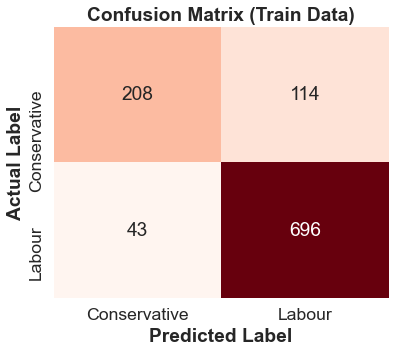

In [307]:
sns.set(font_scale=1.6)
plt.figure(figsize=(6,5))
confusion_matrix(y_train,ytrain_predict,labels=['Conservative','Labour'])
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='Reds',xticklabels=['Conservative','Labour'],yticklabels=['Conservative','Labour'])
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Train Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

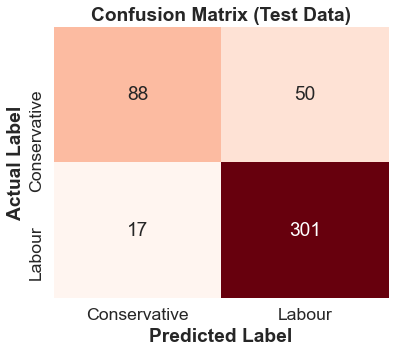

In [308]:
## Confusion matrix on the test data
sns.set(font_scale=1.6)
plt.figure(figsize=(6,5))
confusion_matrix(y_test,ytest_predict)
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True, fmt='d',cbar=False, cmap='Reds',xticklabels=['Conservative','Labour'],yticklabels=['Conservative','Labour'])
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Test Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

In [309]:
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

Conservative       0.83      0.65      0.73       322
      Labour       0.86      0.94      0.90       739

    accuracy                           0.85      1061
   macro avg       0.84      0.79      0.81      1061
weighted avg       0.85      0.85      0.85      1061
 



In [310]:
print(classification_report(y_test, ytest_predict),'\n');

              precision    recall  f1-score   support

Conservative       0.84      0.64      0.72       138
      Labour       0.86      0.95      0.90       318

    accuracy                           0.85       456
   macro avg       0.85      0.79      0.81       456
weighted avg       0.85      0.85      0.85       456
 



AUC: 0.918


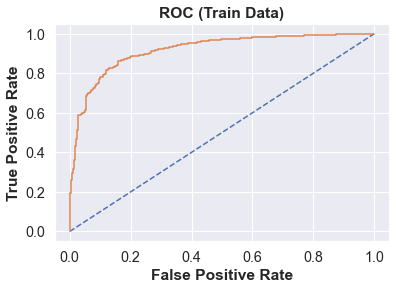

In [311]:
sns.set(font_scale=1.3)
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs,pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC (Train Data)',weight='bold')
sns.set(font_scale=1)

AUC: 0.921


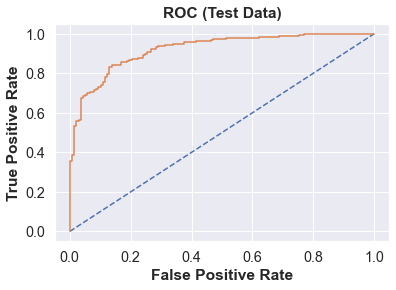

In [312]:
sns.set(font_scale=1.3)
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs,pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC (Test Data)',weight='bold')
sns.set(font_scale=1)

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
%matplotlib inline

df=pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True,drop=True)
df =pd.get_dummies(df, columns=['gender','vote'],drop_first=True)
df

age  economic.cond.national  economic.cond.household  Blair  Hague  \
0      43                       3                        3      4      1   
1      36                       4                        4      4      4   
2      35                       4                        4      5      2   
3      24                       4                        2      2      1   
4      41                       2                        2      1      1   
...   ...                     ...                      ...    ...    ...   
1512   67                       5                        3      2      4   
1513   73                       2                        2      4      4   
1514   37                       3                        3      5      4   
1515   61                       3                        3      1      4   
1516   74                       2                        3      2      4   

      Europe  political.knowledge  gender_male  vote_Labour  
0          2                    2            0            1  
1          5                    2            1            1  
2          3                    2            1            1  
3          4                    0            0            1  
4          6                    2            1            1  
...      ...                  ...          ...          ...  
1512      11                    3            1            0  
1513       8                    2            1            0  
1514       2                    2            1            1  
1515      11                    2            1            0  
1516      11                    0            0            0  

[1517 rows x 9 columns]

In [2]:
X = df.drop("vote_Labour" , axis=1)
y = df['vote_Labour']

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1, stratify=y)

In [4]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
grid={ 'criterion':['gini'],  # 'entropy'
    'splitter':['random'],   # 'best'
    'max_depth':[7],   # 4,5,6,8,9,10
    'min_samples_split':[2],   # 3,4,5,10
    'min_samples_leaf':[7],   # 4,5,6,8,9,10,11,12,13
    'max_features':[6]  # 5,7,8
    }   
model = DecisionTreeClassifier(random_state=1)
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

grid_search.fit(X_train, y_train)

clf = grid_search.best_estimator_
model=clf.fit(X_train,y_train)

cart2 = grid_search.best_estimator_
grid={ 'n_estimators':[200],   # 10,20,50,5,6,7,8,9,30,100,400,500,250,300,350,100,150
    'max_samples':[0.8],    # 1.0,0.7,0.5
    'max_features':[1.0],   # 0.5,0.7,0.3
    'bootstrap':[True],   # False
    'bootstrap_features':[False],   # True
    'oob_score':[False],   # True
    'warm_start':[False],   # True
    'n_jobs':[-1],
    'verbose':[0]}   # 1
model = BaggingClassifier(base_estimator=cart2,random_state=1)
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='accuracy')

grid_search.fit(X_train, y_train)

clf = grid_search.best_estimator_
model=clf.fit(X_train,y_train)

In [5]:
model.score(X_train, y_train)

0.8548539114043355

In [6]:
model.score(X_test, y_test)

0.8574561403508771

In [7]:
pred_train_prob = model.predict_proba(X_train)
pred_test_prob = model.predict_proba(X_test)
pred_train_prob

array([[0.08067069, 0.91932931],
       [0.00717657, 0.99282343],
       [0.53832583, 0.46167417],
       ...,
       [0.02673066, 0.97326934],
       [0.67927228, 0.32072772],
       [0.69281251, 0.30718749]])

In [8]:
pred_train_prob = pred_train_prob[:,1]

In [9]:
from sklearn.metrics import accuracy_score,f1_score,recall_score, precision_score


def GetCustomData(custom_prob):
    custom_cutoff_data=[]

    for i in range(0,len(pred_train_prob)):  #2333
        if pred_train_prob[i] >custom_prob:
            a= 1
        else:
            a=0
        custom_cutoff_data.append(a)
    return custom_cutoff_data

In [10]:
thresh=[]
acc=[]
f1=[]
rec=[]
pre=[]

In [11]:
for j in np.arange(0.1,1,0.1):
    result = GetCustomData(j)
    thresh.append(j)
    acc.append(accuracy_score(y_train,result))
    f1.append(f1_score(y_train,result))
    rec.append(recall_score(y_train,result))
    pre.append(precision_score(y_train,result))


In [12]:
dat = pd.DataFrame({'Threshold': thresh,
             'Accuracy': acc,
             'f1': f1,
             'Recall': rec,
             'Precision':pre})
dat

Threshold  Accuracy        f1    Recall  Precision
0        0.1  0.700283  0.822940  1.000000   0.699149
1        0.2  0.770971  0.857645  0.990528   0.756198
2        0.3  0.793591  0.869097  0.983762   0.778373
3        0.4  0.836946  0.892077  0.967524   0.827546
4        0.5  0.854854  0.897742  0.914750   0.881356
5        0.6  0.852969  0.891817  0.870095   0.914651
6        0.7  0.822809  0.862573  0.798376   0.937997
7        0.8  0.750236  0.788169  0.667118   0.962891
8        0.9  0.659755  0.680248  0.519621   0.984615

In [13]:
dat[dat['f1']==dat['f1'].max()]

Threshold  Accuracy        f1   Recall  Precision
4        0.5  0.854854  0.897742  0.91475   0.881356

In [14]:
dat[dat['Accuracy']==dat['Accuracy'].max()]

Threshold  Accuracy        f1   Recall  Precision
4        0.5  0.854854  0.897742  0.91475   0.881356

In [50]:
from sklearn.ensemble import RandomForestClassifier
grid={'n_estimators':[100],   # 50,150,200,300,500
    'criterion':['gini'],   # 'entropy'
    'max_depth':[5],   # 6,7,8,9
    'min_samples_split':[2],  #5,10,20
    'min_samples_leaf':[1],   #3,5,7,10
    'max_features':[2],   # 3,4,5,6
    'bootstrap':[True],  # False
    'oob_score':[False],  # True
    'warm_start':[False],  # True
    'ccp_alpha':[0.0,]   # 0.2,0.4
}
model = RandomForestClassifier(random_state=1)
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

grid_search.fit(X_train, y_train)

clf = grid_search.best_estimator_
rf=clf.fit(X_train,y_train)

grid={ 'n_estimators':[200],   # 10,20,50,5,6,7,8,9,30,100,400,500,250,300,350,100,150
    'max_samples':[0.4],    # 1.0,0.7,0.5
    'max_features':[1.0],   # 0.5,0.7,0.3
    'bootstrap':[True],   # False
    'bootstrap_features':[False],   # True
    'oob_score':[False],   # True
    'warm_start':[False],   # True
    'n_jobs':[-1],
    'verbose':[0]}   # 1
model = BaggingClassifier(base_estimator=rf,random_state=1)

grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='accuracy')

In [51]:
grid_search.fit(X_train, y_train)

clf = grid_search.best_estimator_
model=clf.fit(X_train,y_train)

In [52]:
model.score(X_train, y_train)

0.8520263901979265

In [53]:
model.score(X_test, y_test)

0.8530701754385965

In [54]:
pred_train_prob = model.predict_proba(X_train)
pred_test_prob = model.predict_proba(X_test)
pred_train_prob

array([[0.16551608, 0.83448392],
       [0.03946336, 0.96053664],
       [0.53142311, 0.46857689],
       ...,
       [0.06114707, 0.93885293],
       [0.58383813, 0.41616187],
       [0.591566  , 0.408434  ]])

In [55]:
pred_train_prob = pred_train_prob[:,1]

In [56]:
from sklearn.metrics import accuracy_score,f1_score,recall_score, precision_score


def GetCustomData(custom_prob):
    custom_cutoff_data=[]

    for i in range(0,len(pred_train_prob)):  #2333
        if pred_train_prob[i] >custom_prob:
            a= 1
        else:
            a=0
        custom_cutoff_data.append(a)
    return custom_cutoff_data

In [57]:
thresh=[]
acc=[]
f1=[]
rec=[]
pre=[]

In [58]:
for j in np.arange(0.1,1,0.1):
    result = GetCustomData(j)
    thresh.append(j)
    acc.append(accuracy_score(y_train,result))
    f1.append(f1_score(y_train,result))
    rec.append(recall_score(y_train,result))
    pre.append(precision_score(y_train,result))


In [59]:
dat = pd.DataFrame({'Threshold': thresh,
             'Accuracy': acc,
             'f1': f1,
             'Recall': rec,
             'Precision':pre})
dat

Threshold  Accuracy        f1    Recall  Precision
0        0.1  0.696513  0.821111  1.000000   0.696513
1        0.2  0.711593  0.828475  1.000000   0.707177
2        0.3  0.770971  0.857478  0.989175   0.756729
3        0.4  0.816211  0.881315  0.979702   0.800885
4        0.5  0.852026  0.898644  0.941813   0.859259
5        0.6  0.855796  0.894264  0.875507   0.913842
6        0.7  0.824694  0.863836  0.798376   0.940989
7        0.8  0.719133  0.754530  0.619756   0.964211
8        0.9  0.561734  0.545455  0.377537   0.982394

In [60]:
dat[dat['f1']==dat['f1'].max()]

Threshold  Accuracy        f1    Recall  Precision
4        0.5  0.852026  0.898644  0.941813   0.859259

In [61]:
dat[dat['Accuracy']==dat['Accuracy'].max()]

Threshold  Accuracy        f1    Recall  Precision
5        0.6  0.855796  0.894264  0.875507   0.913842

# text analytics

In [30]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Jitu\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [31]:
inaugural.raw('1941-Roosevelt.txt')

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [32]:
inaugural.raw('1961-Kennedy.txt')

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [33]:
inaugural.raw('1973-Nixon.txt')

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

# word count

In [34]:
len(inaugural.words())

149797

In [35]:
len(inaugural.words('1941-Roosevelt.txt'))

1536

In [36]:
len(inaugural.words('1961-Kennedy.txt'))

1546

In [37]:
len(inaugural.words('1973-Nixon.txt'))

2028

# sentence count

In [38]:
len(inaugural.sents())

5050

In [39]:
len(inaugural.sents('1941-Roosevelt.txt'))

68

In [40]:
len(inaugural.sents('1961-Kennedy.txt'))

52

In [41]:
len(inaugural.sents('1973-Nixon.txt'))

69

# character count(with spaces)

In [42]:
len(inaugural.raw('1941-Roosevelt.txt'))

7571

In [43]:
len(inaugural.raw('1961-Kennedy.txt'))

7618

In [44]:
len(inaugural.raw('1973-Nixon.txt'))

9991

# character count(without spaces)

In [45]:
len(''.join(inaugural.raw('1941-Roosevelt.txt').split()))

6174

In [46]:
len(''.join(inaugural.raw('1961-Kennedy.txt').split()))

6202

In [47]:
len(''.join(inaugural.raw('1973-Nixon.txt').split()))

8122

In [48]:
import numpy as np
import pandas as pd
import random
import string

In [49]:
# Defining a variable 'stopwords' which contains the list of punctuations from the string library and the english stopwords
# from nltk
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)

from nltk.stem import PorterStemmer
st = PorterStemmer()

# Roosevelt speech

In [50]:
# Converting all the words to lower case
all_words = (w.lower() for w in inaugural.words('1941-Roosevelt.txt')) 
print('intial number of words: ', len(inaugural.words('1941-Roosevelt.txt')))

# Only keeping the words which are not the 'stopwords'
all_words_clean = [word for word in all_words if word not in stopwords]
print('\nnumber of words after stopwords and punctuations removal: ', len(all_words_clean))

#printing a sample after stopwords and punctuations removal
print('\n',' '.join(all_words_clean[0:50]))

# stemming
map_object = map(st.stem, all_words_clean)
all_words_clean = list(map_object)
print('\nnumber of words after stemming: ', len(all_words_clean))

#printing a sample after stemming
print('\n',' '.join(all_words_clean[0:50]))

# Creating a frequency distribution of the lower case words which does not contain any stopwords
all_words_freq = nltk.FreqDist(all_words_clean)
all_words_freq

intial number of words:  1536

number of words after stopwords and punctuations removal:  657

 national day inauguration since 1789 people renewed sense dedication united states washington day task people create weld together nation lincoln day task people preserve nation disruption within day task people save nation institutions disruption without us come time midst swift happenings pause moment take stock -- recall place history rediscover

number of words after stemming:  657

 nation day inaugur sinc 1789 peopl renew sens dedic unit state washington day task peopl creat weld togeth nation lincoln day task peopl preserv nation disrupt within day task peopl save nation institut disrupt without us come time midst swift happen paus moment take stock -- recal place histori rediscov


FreqDist({'--': 25, 'nation': 17, 'know': 10, 'peopl': 9, 'spirit': 9, 'life': 9, 'democraci': 9, 'us': 8, 'america': 8, 'live': 7, ...})

**after removing '--'**

In [51]:
# Converting all the words to lower case
all_words = (w.lower() for w in inaugural.words('1941-Roosevelt.txt')) 
print('intial number of words: ', len(inaugural.words('1941-Roosevelt.txt')))

# Only keeping the words which are not the 'stopwords'
all_words_clean = [word for word in all_words if word not in stopwords]

# removing '--'
count=0
for count in range(0,25):
    all_words_clean.remove('--')
    count+=1
print('\nnumber of words after stopwords and punctuations removal: ', len(all_words_clean))

#printing a sample after stopwords and punctuations removal
print('\n',' '.join(all_words_clean[0:50]))

# stemming
map_object = map(st.stem, all_words_clean)
all_words_clean = list(map_object)
print('\nnumber of words after stemming: ', len(all_words_clean))

#printing a sample after stemming
print('\n',' '.join(all_words_clean[0:50]))

# Creating a frequency distribution of the lower case words which does not contain any stopwords
all_words_freq = nltk.FreqDist(all_words_clean)
all_words_freq

intial number of words:  1536

number of words after stopwords and punctuations removal:  632

 national day inauguration since 1789 people renewed sense dedication united states washington day task people create weld together nation lincoln day task people preserve nation disruption within day task people save nation institutions disruption without us come time midst swift happenings pause moment take stock recall place history rediscover may

number of words after stemming:  632

 nation day inaugur sinc 1789 peopl renew sens dedic unit state washington day task peopl creat weld togeth nation lincoln day task peopl preserv nation disrupt within day task peopl save nation institut disrupt without us come time midst swift happen paus moment take stock recal place histori rediscov may


FreqDist({'nation': 17, 'know': 10, 'peopl': 9, 'spirit': 9, 'life': 9, 'democraci': 9, 'us': 8, 'america': 8, 'live': 7, 'year': 7, ...})

# Kennedy speech

In [52]:
# Converting all the words to lower case
all_words = (w.lower() for w in inaugural.words('1961-Kennedy.txt')) 
print('intial number of words: ', len(inaugural.words('1961-Kennedy.txt')))

# Only keeping the words which are not the 'stopwords'
all_words_clean = [word for word in all_words if word not in stopwords]
print('\nnumber of words after stopwords and punctuations removal: ', len(all_words_clean))

#printing a sample after stopwords and punctuations removal
print('\n',' '.join(all_words_clean[0:50]))

# stemming
map_object = map(st.stem, all_words_clean)
all_words_clean = list(map_object)
print('\nnumber of words after stemming: ', len(all_words_clean))

#printing a sample after stemming
print('\n',' '.join(all_words_clean[0:50]))

# Creating a frequency distribution of the lower case words which does not contain any stopwords
all_words_freq = nltk.FreqDist(all_words_clean)
all_words_freq

intial number of words:  1546

number of words after stopwords and punctuations removal:  722

 vice president johnson mr speaker mr chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens observe today victory party celebration freedom -- symbolizing end well beginning -- signifying renewal well change sworn almighty god solemn oath forebears l prescribed nearly century three quarters ago world different

number of words after stemming:  722

 vice presid johnson mr speaker mr chief justic presid eisenhow vice presid nixon presid truman reverend clergi fellow citizen observ today victori parti celebr freedom -- symbol end well begin -- signifi renew well chang sworn almighti god solemn oath forebear l prescrib nearli centuri three quarter ago world differ


FreqDist({'--': 25, 'let': 16, 'us': 12, 'power': 9, 'world': 8, 'nation': 8, 'side': 8, 'new': 7, 'pledg': 7, 'ask': 6, ...})

**after removing '--'**

In [53]:
# Converting all the words to lower case
all_words = (w.lower() for w in inaugural.words('1961-Kennedy.txt')) 
print('intial number of words: ', len(inaugural.words('1961-Kennedy.txt')))

# Only keeping the words which are not the 'stopwords'
all_words_clean = [word for word in all_words if word not in stopwords]

# removing '--'
count=0
for count in range(0,25):
    all_words_clean.remove('--')
    count+=1
print('\nnumber of words after stopwords and punctuations removal: ', len(all_words_clean))

#printing a sample after stopwords and punctuations removal
print('\n',' '.join(all_words_clean[0:50]))

# stemming
map_object = map(st.stem, all_words_clean)
all_words_clean = list(map_object)
print('\nnumber of words after stemming: ', len(all_words_clean))

#printing a sample after stemming
print('\n',' '.join(all_words_clean[0:50]))

# Creating a frequency distribution of the lower case words which does not contain any stopwords
all_words_freq = nltk.FreqDist(all_words_clean)
all_words_freq

intial number of words:  1546

number of words after stopwords and punctuations removal:  697

 vice president johnson mr speaker mr chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens observe today victory party celebration freedom symbolizing end well beginning signifying renewal well change sworn almighty god solemn oath forebears l prescribed nearly century three quarters ago world different man holds

number of words after stemming:  697

 vice presid johnson mr speaker mr chief justic presid eisenhow vice presid nixon presid truman reverend clergi fellow citizen observ today victori parti celebr freedom symbol end well begin signifi renew well chang sworn almighti god solemn oath forebear l prescrib nearli centuri three quarter ago world differ man hold


FreqDist({'let': 16, 'us': 12, 'power': 9, 'world': 8, 'nation': 8, 'side': 8, 'new': 7, 'pledg': 7, 'ask': 6, 'citizen': 5, ...})

# Nixon speech

In [54]:
# Converting all the words to lower case
all_words = (w.lower() for w in inaugural.words('1973-Nixon.txt')) 
print('intial number of words: ', len(inaugural.words('1973-Nixon.txt')))

# Only keeping the words which are not the 'stopwords'
all_words_clean = [word for word in all_words if word not in stopwords]
print('\nnumber of words after stopwords and punctuations removal: ', len(all_words_clean))

#printing a sample after stopwords and punctuations removal
print('\n',' '.join(all_words_clean[0:50]))

# stemming
map_object = map(st.stem, all_words_clean)
all_words_clean = list(map_object)
print('\nnumber of words after stemming: ', len(all_words_clean))

#printing a sample after stemming
print('\n',' '.join(all_words_clean[0:50]))

# Creating a frequency distribution of the lower case words which does not contain any stopwords
all_words_freq = nltk.FreqDist(all_words_clean)
all_words_freq

intial number of words:  2028

number of words after stopwords and punctuations removal:  853

 mr vice president mr speaker mr chief justice senator cook mrs eisenhower fellow citizens great good country share together met four years ago america bleak spirit depressed prospect seemingly endless war abroad destructive conflict home meet today stand threshold new era peace world central question us shall use peace let

number of words after stemming:  853

 mr vice presid mr speaker mr chief justic senat cook mr eisenhow fellow citizen great good countri share togeth met four year ago america bleak spirit depress prospect seemingli endless war abroad destruct conflict home meet today stand threshold new era peac world central question us shall use peac let


FreqDist({'us': 26, 'let': 22, 'america': 21, 'peac': 19, 'world': 18, 'respons': 17, '--': 17, 'new': 15, 'nation': 15, 'govern': 10, ...})

In [55]:
stop_words = nltk.corpus.stopwords.words('english')+list(string.punctuation)
import matplotlib.pyplot as plt

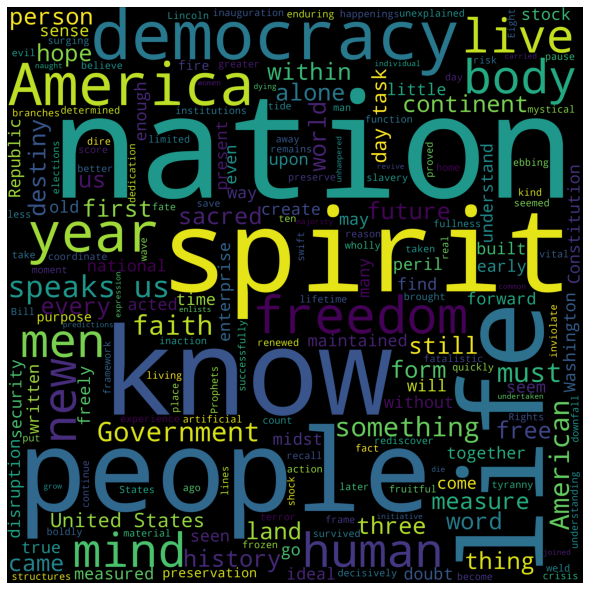

In [56]:
x = inaugural.raw('1941-Roosevelt.txt')
corpus = ' '.join([z for z in x.split() if z not in stop_words])

# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(corpus)

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 


plt.show()

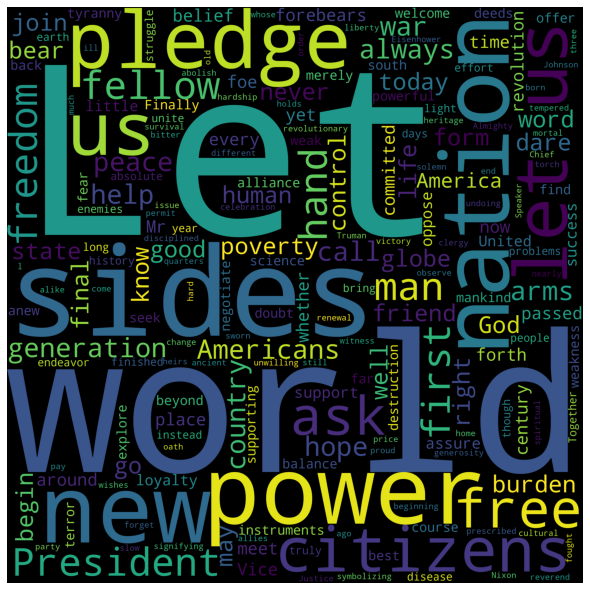

In [57]:
x = inaugural.raw('1961-Kennedy.txt')
corpus = ' '.join([z for z in x.split() if z not in stop_words])

# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(corpus)

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

plt.show()

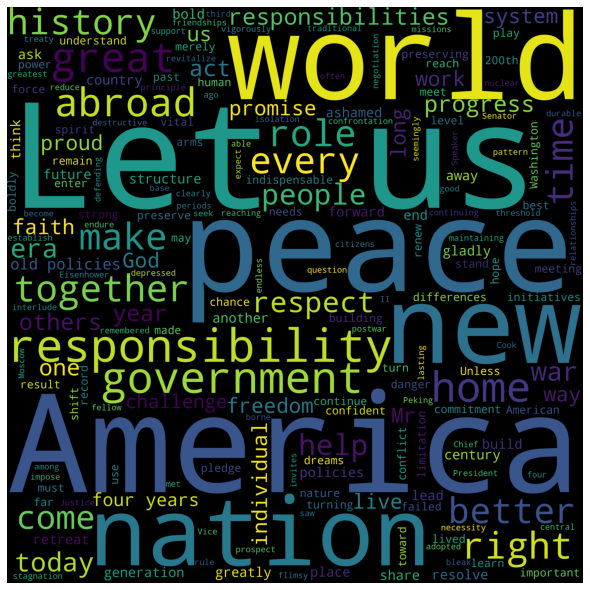

In [58]:
x = inaugural.raw('1973-Nixon.txt')
corpus = ' '.join([z for z in x.split() if z not in stop_words])

# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(corpus)

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 


plt.show()